In [11]:
import torch
import torchvision
import gym

import random
import torch.nn as nn
import torch
from torch.autograd import Variable
import torch.autograd as autograd
import torch.nn.functional as F
import gym
import random
import heapq

from gym.envs.registration import register
# register(
#    id='FrozenLakeNotSlippery-v0',
#    entry_point='gym.envs.toy_text:FrozenLakeEnv',
#    kwargs={'map_name' : '4x4', 'is_slippery': False},
#    max_episode_steps=100,
#    reward_threshold=0.78, # optimum = .8196
# )

#env = gym.make('FrozenLake8x8-v0')
env = gym.make('FrozenLake-v0')
#env = gym.make('FrozenLakeNotSlippery-v0')
env.render()


use_cuda = torch.cuda.is_available()
FloatTensor = torch.cuda.FloatTensor if use_cuda else torch.FloatTensor
LongTensor = torch.cuda.LongTensor if use_cuda else torch.LongTensor
ByteTensor = torch.cuda.ByteTensor if use_cuda else torch.ByteTensor
Tensor = FloatTensor

class value_net(nn.Module):
    def __init__(self):
        super(value_net, self).__init__()
        self.linear1 = nn.Linear(1, 40)
        #self.batch1 = nn.BatchNorm1d(40)
        self.linear2 = nn.Linear(40, 40, bias=True)
        #self.batch2 = nn.BatchNorm1d(40)
        self.linear3 = nn.Linear(40, 40, bias=True)
        #self.batch2 = nn.BatchNorm1d(40)
        self.linear4 = nn.Linear(40, 40, bias=True)
        #self.batch2 = nn.BatchNorm1d(40)
        self.linear5 = nn.Linear(40, 1, bias=False)
        #self.dropout = nn.Dropout(p=0.5)
        
        
        

    def forward(self, x):
#         print("Q_Net: Input " + "-" *5)
#         print(x.shape)
#         print(x)
#         print("Q_Net: Input " + "-" *5)
        x = x.view(-1,1)
        x = F.sigmoid(self.linear1(x))
        #x = F.softmax(self.linear2(x), dim=0)
        #x = self.batch1(x)        
        #x = self.dropout(x)
        x = F.sigmoid(self.linear2(x))
        x = F.sigmoid(self.linear3(x))
        x = F.sigmoid(self.linear4(x))
        #x = self.batch2(x)        
        x = self.linear5(x)
        x = x.view(-1,1)
        #print(x.shape)
        #print(x)
        return x


class policy_net(nn.Module):
    def __init__(self):
        super(policy_net, self).__init__()
        #self.batch1 = nn.BatchNorm1d(1)
        self.linear1 = nn.Linear(1, 64)
        #self.batch2 = nn.BatchNorm1d(64)
        self.linear2 = nn.Linear(64, 64)
        self.linear3 = nn.Linear(64, 64)
        self.linear4 = nn.Linear(64, 64)
        self.linear5 = nn.Linear(64, 4, bias=False)
        #self.dropout = nn.Dropout(p=0.5)
        

    def forward(self, x):
        #print(x.shape)
        #print(x
        x = x.view(-1,1)
        #x = self.batch1(x)
        x = F.tanh(self.linear1(x))
        #x = self.batch2(x)
        #x = self.dropout()
        x = F.sigmoid(self.linear2(x))        
#         x = F.tanh(self.linear3(x))        
#         x = F.tanh(self.linear4(x))        
        x = self.linear5(x)
        x = x.view(-1,4)
        #print(x.shape)
        #print(x)
        return x

    

from collections import namedtuple
Transition = namedtuple('Transition',
                        ('state', 'action', 'log_prob','action_prob','log_action_prob', 'next_state', 'reward','entropy_impact' ,'done'))


class ReplayMemory(object):

    def __init__(self, capacity):
        self.capacity = capacity
        self.memory = []
        self.position = 0

    def push(self, *args):
        """Saves a transition."""
        if len(self.memory) < self.capacity:
            self.memory.append(None)
        self.memory[self.position] = Transition(*args)
        self.position = (self.position + 1) % self.capacity

    def sample(self, batch_size):
        return random.sample(self.memory, batch_size)

    def __len__(self):
        return len(self.memory)
    
    
    
class ReplayMemoryNoReplacement(object):
    
    def __init__(self, capacity):
        self.h = []
        
    def push(self, *args):
        random_index = random.random()
        heapq.heappush(self.h, (random_index, Transition(*args)))
    
    def sample(self, batch_size):
    
        result = []
        for i in range(batch_size):            
            result.append(heapq.heappop(self.h)[1])
        
        return result
    
    def __len__(self):
        return len(self.h)

class ReplayMemoryNew(object):
    def __init__(self, capacity):
        self.h = []
        self.capacity = capacity

    def push(self, *args):
        tran = Transition(*args)
        self.push_transition(tran)

    def push_transition(self, tran):
        if self.capacity <= len(self.h):
            heapq.heappop(self.h)
        random_index = random.random()
        heapq.heappush(self.h, (random_index, tran))


    def sample(self, batch_size):
        result = []
        for i in range(batch_size):
            el = heapq.heappop(self.h)[1]
            result.append(el)            
            heapq.heappush(self.h, (random.random(), el))
        return result

    def __len__(self):
        return len(self.h)


SFFF
FHFH
FFFH
HFFG


In [12]:
def print_v_table():
    for i in range(16):
        st = np.array(get_state_repr(i))
        st = np.expand_dims(st, axis=0)
        v_net.eval()
        action_probs = v_net(FloatTensor(st))
        #action_probs = F.softmax(action_probs, dim=1)
        outp = " state (" +str(i) + ") "
        n = 0
        for tensr in action_probs:
            for cell in tensr:
                outp = outp + " A[" + str(n) + "]:(" + str(cell.item()) + ")"
                n += 1
        print(outp)

def print_pi_table():
    for i in range(16):
        st = np.array(get_state_repr(i))
        st = np.expand_dims(st, axis=0)
        pi_net.eval()
        action_probs = pi_net(FloatTensor(st))
        action_probs = F.softmax(action_probs, dim=1)
        outp = " state (" +str(i) + ") "
        n = 0
        for tensr in action_probs:
            for cell in tensr:
                outp = outp + " A[" + str(n) + "]:(" + str(cell.item()) + ")"
                n += 1
        print(outp)
        
def get_state_repr(state_idx):
    return state_idx * 13

In [13]:
import gym
import numpy as np
import torch.optim as optim
from torch.distributions import Categorical
import random
random.seed(1999)
import math
import torch
from torch.optim.lr_scheduler import StepLR


# custom weights initialization 
def weights_init(m):
    classname = m.__class__.__name__
    #print classname
    #print q_net
    if classname.find('Linear') != -1:
        m.weight.data.normal_(0.01, 0.02)
        #if not m.bias is None:
        #    m.bias.data.normal_(0.1, 0.02)
        #m.weight.data.uniform_(0.0, 0.02)        
        #m.weight.data.fill_(0.01)
        if not m.bias is None:
            m.bias.data.fill_(0.0)
        print m
        


# if gpu is to be used
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

BATCH_SIZE = 300
GAMMA = 0.99
TARGET_UPDATE = 1000
PRINT_OUT_TIMES = 1000
ENTROPY_REDUCTION_STEPS = 100000.0
NUM_EPISODES =           1000000
#NUM_STEPS_VALUE_FUNCTION_LEARNS = NUM_EPISODES
NUM_STEPS_VALUE_FUNCTION_LEARNS = (ENTROPY_REDUCTION_STEPS * 1)

v_net = value_net()
v_net.apply(weights_init)
v_net.to(device)
target_v_net = value_net()
target_v_net.load_state_dict(v_net.state_dict())
target_v_net.to(device)
pi_net = policy_net()
pi_net.apply(weights_init).to(device)

# prepare for optimizer, merge both networks parameters

# parameters = set()
# for net_ in [v_net, pi_net]:
#     parameters |= set(net_.parameters())

#optimizer = optim.RMSprop(online_net.parameters(), lr=0.001)

#optimizer = optim.Adam(parameters, lr=0.0001)


v_optimizer = optim.Adam(v_net.parameters(), lr=0.0001)
pi_optimizer =  optim.Adam(pi_net.parameters(), lr=0.0001)


#scheduler = StepLR(v_optimizer, step_size=10000, gamma=0.5)


MEMORY_SIZE = 2000
#memory = ReplayMemoryNoReplacement(MEMORY_SIZE)
memory = ReplayMemoryNew(MEMORY_SIZE)
#memory = ReplayMemory(MEMORY_SIZE)

value_loss_cum = []

def get_expected_value_fixed(s):
    r = 0
    if s == 0:
        r = 0.050
    elif s == 1:
        r = 0.092
    elif s == 2:
        r = 0.083
    elif s == 3:
        r = 0.1258
    elif s == 4:
        r = 0.1235
    elif s == 5:
        r = 0.0
    elif s == 6:
        r = 0.1421
    elif s == 7:
        r = 0.0
    elif s == 8:
        r = 0.203364819288
    elif s == 9:
        r = 0.349448651075
    elif s == 10:
        r = 0.393933832645
    elif s == 11:
        r = 0.0
    elif s == 12:
        r = 0.0
    elif s == 13:
        r = 0.565665841103
    elif s == 14:
        r = 0.99
    elif s == 15:
        r = 0.0
    return r

def optimize(k):
    if len(memory) < BATCH_SIZE:
        return
        
    transitions = memory.sample(BATCH_SIZE)
    # Transpose the batch (see http://stackoverflow.com/a/19343/3343043 for
    # detailed explanation).
    batch = Transition(*zip(*transitions))

    # Compute a mask of non-final states and concatenate the batch elements
    final_mask = torch.tensor(tuple(map(lambda d: d is True,
                                         batch.done)), device=device, dtype=torch.uint8).unsqueeze(1)
    final_mask_list = [d for d in batch.done if d is True ]
    # Compute states that are final.
#     next_state_final_mask = torch.tensor(tuple(map(lambda d: (d) in [5,7,11,12,15],
#                                           batch.next_state)), device=device, dtype=torch.uint8).unsqueeze(1) 
#     next_state_finak_list = [d for d in batch.next_state if d in [5,7,11,12,15] ]
    
    
    # Unpack the parameters from the memory
        
    state_batch = FloatTensor(batch.state)
    state_batch = state_batch.view(BATCH_SIZE, 1)
    next_state_batch = FloatTensor(batch.next_state)
    next_state_batch = next_state_batch.view(BATCH_SIZE, 1)    
    action_batch = LongTensor(batch.action).view(BATCH_SIZE,1)    
    reward_batch = Tensor(batch.reward).view(BATCH_SIZE,1)            
    entropy_impact_batch = FloatTensor(batch.entropy_impact).view(BATCH_SIZE,1)
    #log_prob_batch = torch.cat(batch.log_prob).view(BATCH_SIZE, 1)
    #action_probs_batch = torch.cat(batch.action_prob).view(BATCH_SIZE,4)
    #log_action_probs_batch = torch.cat(batch.log_action_prob).view(BATCH_SIZE,4)
    
    
    #FIRST , calculate V(next_state)and backpropagate MSE on V
    
        
    target_v_net.eval()
    v_next = target_v_net(next_state_batch).detach()
    #v_next[next_state_final_mask] = torch.zeros(len(next_state_finak_list), device=device).view(len(next_state_finak_list))
    v_next[final_mask] = torch.zeros(len(final_mask_list), device=device).view(len(final_mask_list))
    
    
    ##HACK FIXING expected value
#     v_current_fixed = [get_expected_value_fixed(_st) for _st in batch.state]
#     v_current_fixed = FloatTensor(v_current_fixed).view(BATCH_SIZE,1)    
    ##HACK FIXING expected value
    
    ##HACK FIXING current value
#     v_next_fixed = [get_expected_value_fixed(_st) for _st in batch.next_state]
#     v_next_fixed = FloatTensor(v_next_fixed).view(BATCH_SIZE,1)    
    #v_next = v_next_fixed
    ##HACK FIXING current value
    
    
    expected_value = reward_batch + v_next * GAMMA
    
    
    ##HACK FIXING expected value
    #expected_value = expected_value_fixed
    ##HACK FIXING expected value
    
    
    # calculate V(current_state)
    if k <= NUM_STEPS_VALUE_FUNCTION_LEARNS:
        v_net.train()
    else:
        v_net.eval()
        
    v_current = v_net(state_batch)
    
    # backpropagate:
    value_loss = torch.sum((expected_value - v_current)** 2)
    
    if k <= NUM_STEPS_VALUE_FUNCTION_LEARNS:
        v_optimizer.zero_grad()
        #value_loss.backward(retain_graph=True) # keep graph for policy net optimizer
        value_loss.backward() # keep graph for policy net optimizer
        v_optimizer.step()
        #scheduler.step()
    
    value_loss_cum.append(value_loss.item())
    
    v_current = v_current.detach()
    
    
    ##HACK FIXING expected value
    #v_current = v_current_fixed
    ##HACK FIXING expected value
    
    
    # SECOND, calculate gradient loss:
    # H(X) = P(X) log ( P(X) )

    # calculate the action probability
    actions_distr = pi_net(state_batch)
    actions_prob_batch = F.softmax(actions_distr, dim=1)
    log_actions_prob_batch = F.log_softmax(actions_distr, dim=1)
    
    action_batch = action_batch
    action_mask = FloatTensor(BATCH_SIZE, 4).zero_()    
    action_mask.scatter_(1,action_batch,1) # This will have shape (BATCH_SIZE, 4), and its contents will be 
                                            # like : [[0,0,1,0],[1,0,0,0],...]
    #log_prob_batch = log_actions_prob_batch.gather(1,action_batch)
    log_prob_batch = torch.sum(log_actions_prob_batch * action_mask, dim=1).view(BATCH_SIZE,1) # sum up across rows (ending tensor is shape (BATCH_SIZE, 1))
    
    entropy = entropy_impact_batch * torch.sum(actions_prob_batch * log_actions_prob_batch)
    
    
    
    policy_loss = torch.sum( -log_prob_batch * (expected_value - v_current) + entropy) 
    
    pi_optimizer.zero_grad()
    policy_loss.backward()
    pi_optimizer.step()
    
    return policy_loss.item(), value_loss.item()
    

    

Linear(in_features=1, out_features=40, bias=True)
Linear(in_features=40, out_features=40, bias=True)
Linear(in_features=40, out_features=40, bias=True)
Linear(in_features=40, out_features=40, bias=True)
Linear(in_features=40, out_features=1, bias=False)
Linear(in_features=1, out_features=64, bias=True)
Linear(in_features=64, out_features=64, bias=True)
Linear(in_features=64, out_features=64, bias=True)
Linear(in_features=64, out_features=64, bias=True)
Linear(in_features=64, out_features=4, bias=False)


In [14]:
score = []
times_trained = 0
times_reach_goal = 0
steps_done = 0

policy_loss_avg = [1.0]
v_loss_avg = [1.0]


TARGET_UPDATE = 1000



for k in range(NUM_EPISODES):
    done = False
    observation = env.reset()
    #observation, reward, done, info = env.step(env.action_space.sample()) # take a random action
    reward = 0
    episode_step = 0
    #print("b")
    I = 1.0
    #entropy_impact = (ENTROPY_REDUCTION_STEPS - k) / ENTROPY_REDUCTION_STEPS
    if k == 0:
        entropy_impact = 1.0
    else:
        entropy_impact = min(1, (1 / (k * 0.005)))
        
    if k > ENTROPY_REDUCTION_STEPS:
        entropy_impact = 0.0
        
    # test entropy always 0
    # entropy_impact = 0.0
        
    #entropy_impact = 0.0
    #if entropy_impact < 0.0:
    #    entropy_impact = 0
    while not done:
        #print("c")
        steps_done += 1
        
        # Get action from pi
        np_observation = np.array(get_state_repr(observation))
        np_observation = np.expand_dims(np_observation, axis=0)
        #print(np_observation)
        observation_tensor = FloatTensor(np_observation)

        # action distribution
        pi_net.eval()
        action_distr = pi_net(observation_tensor)
        action_probs = F.softmax(action_distr, dim=1)
        log_action_probs = 0
        #log_action_probs = F.log_softmax(action_distr, dim=1)
        # Decide on an action based on the distribution
        m = Categorical(action_probs)
        action = m.sample()
        
        log_prob = m.log_prob(action).unsqueeze(1)
            
        #break
        # Execute action in environment.
        old_state = observation                    
            
        
        observation, reward, done, info = env.step(action.item()) 
        new_state = observation
        
        if k%5000 == 0:
            #print("old_state != new_state")
            #print(old_state != new_state)
            #print("oldstate " + str(old_state) + " newstate " + str(new_state))
            print("action_dist ")
            print(action_probs)
            print("On state="+ str(old_state) + ", selected action=" + str(action.item()) )
            print("new state="+ str(new_state) + ", done="+str(done) + \
             ". Reward: " + str(reward))

        # Perform one step of the optimization        
#         policy_loss, value_loss = optimize_model(I, \
#                                                  old_state, \
#                                                  log_prob, \
#                                                  log_actions_probs, \
#                                                  action_probs, \
#                                                  reward, \
#                                                  new_state, \
#                                                  entropy_impact, \
#                                                  done)
        
#         I = I * GAMMA
        #if (not done) or (done and new_state in [5,7,11,12,15]):
        memory.push(get_state_repr(old_state), action.item(), log_prob, action_probs, log_action_probs, get_state_repr(new_state), reward, entropy_impact, done)
        

            
        if len(memory) >= MEMORY_SIZE:
            policy_loss, value_loss = optimize(k)
            if len(policy_loss_avg) < PRINT_OUT_TIMES :
                policy_loss_avg.append(policy_loss)
                v_loss_avg.append(value_loss)
            else:
                policy_loss_avg[episode_step % PRINT_OUT_TIMES] = policy_loss
                v_loss_avg[episode_step % PRINT_OUT_TIMES] = value_loss
        
        times_trained = times_trained + 1

        episode_step += 1
        #env.render()
        
    
    if k % PRINT_OUT_TIMES ==0:
        print_pi_table()
        print_v_table()
   
    if len(score) < 100:
        score.append(reward)
    else:
        score[k % 100] = reward
    
    if k % TARGET_UPDATE == 0:
        target_v_net.load_state_dict(v_net.state_dict())
    

    if k%PRINT_OUT_TIMES == 0:
        print("Episode {} finished after {} . Running score: {}. Policy_loss: {}, Value_loss: {}. Times trained: \
              {}. Times reached goal: {}. \
              Steps done: {}.".format(k, episode_step, np.mean(score), np.mean(policy_loss_avg),\
                                      np.mean(v_loss_avg) , times_trained, \
                                                                       times_reach_goal, steps_done))
        #print("policy_loss_avg")
        #print(policy_loss_avg)
        #print("value_loss_avg")
        #print(v_loss_avg)
#         print("times_reach_goal")
#         print(times_reach_goal)
        times_trained = 0
        times_reach_goal = 0
        #print("Game finished. " + "-" * 5)
        #print(len(episode_series))
#         for param in net.parameters():
#             print(param.data)
        

    
    
    
    if reward > 0.0:
        times_reach_goal = times_reach_goal + 1
        
    
    

action_dist 
tensor([[ 0.2592,  0.2636,  0.2332,  0.2440]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 0.2598,  0.2658,  0.2316,  0.2428]])
On state=4, selected action=3
new state=5, done=True. Reward: 0.0
 state (0)  A[0]:(0.259172201157) A[1]:(0.263595551252) A[2]:(0.233213186264) A[3]:(0.244019031525)
 state (1)  A[0]:(0.259381532669) A[1]:(0.264406919479) A[2]:(0.23262527585) A[3]:(0.243586286902)
 state (2)  A[0]:(0.259546518326) A[1]:(0.265036821365) A[2]:(0.232174575329) A[3]:(0.243242040277)
 state (3)  A[0]:(0.259664624929) A[1]:(0.265478551388) A[2]:(0.231860592961) A[3]:(0.242996245623)
 state (4)  A[0]:(0.259751915932) A[1]:(0.265794813633) A[2]:(0.231637343764) A[3]:(0.242815881968)
 state (5)  A[0]:(0.259819746017) A[1]:(0.266033053398) A[2]:(0.231472760439) A[3]:(0.242674484849)
 state (6)  A[0]:(0.259872943163) A[1]:(0.266219079494) A[2]:(0.23134881258) A[3]:(0.242559149861)
 state (7)  A[0]:(0.259913891554) A[1]:(0.2663671

 state (0)  A[0]:(0.250259190798) A[1]:(0.249478399754) A[2]:(0.250165313482) A[3]:(0.250097066164)
 state (1)  A[0]:(0.250386476517) A[1]:(0.24946436286) A[2]:(0.250065892935) A[3]:(0.250083267689)
 state (2)  A[0]:(0.250506669283) A[1]:(0.249422028661) A[2]:(0.250045269728) A[3]:(0.250025987625)
 state (3)  A[0]:(0.250571191311) A[1]:(0.249385923147) A[2]:(0.250055789948) A[3]:(0.249987065792)
 state (4)  A[0]:(0.250577270985) A[1]:(0.249366939068) A[2]:(0.250070154667) A[3]:(0.249985620379)
 state (5)  A[0]:(0.250543177128) A[1]:(0.249361112714) A[2]:(0.250082135201) A[3]:(0.250013530254)
 state (6)  A[0]:(0.250485748053) A[1]:(0.249363139272) A[2]:(0.25009137392) A[3]:(0.250059694052)
 state (7)  A[0]:(0.250416129827) A[1]:(0.249369427562) A[2]:(0.250098526478) A[3]:(0.250115871429)
 state (8)  A[0]:(0.250340938568) A[1]:(0.249377816916) A[2]:(0.250104278326) A[3]:(0.25017696619)
 state (9)  A[0]:(0.250263929367) A[1]:(0.24938711524) A[2]:(0.250109106302) A[3]:(0.250239908695)
 sta

 state (0)  A[0]:(0.250934064388) A[1]:(0.249246135354) A[2]:(0.250331312418) A[3]:(0.24948848784)
 state (1)  A[0]:(0.25082975626) A[1]:(0.249211832881) A[2]:(0.250146478415) A[3]:(0.249811977148)
 state (2)  A[0]:(0.250874042511) A[1]:(0.24917639792) A[2]:(0.250079900026) A[3]:(0.249869689345)
 state (3)  A[0]:(0.250786632299) A[1]:(0.249189332128) A[2]:(0.250025063753) A[3]:(0.249998942018)
 state (4)  A[0]:(0.250628888607) A[1]:(0.249228030443) A[2]:(0.249975755811) A[3]:(0.25016734004)
 state (5)  A[0]:(0.25044515729) A[1]:(0.249276444316) A[2]:(0.249930068851) A[3]:(0.250348299742)
 state (6)  A[0]:(0.25025755167) A[1]:(0.249326631427) A[2]:(0.249887287617) A[3]:(0.250528514385)
 state (7)  A[0]:(0.250075787306) A[1]:(0.249375030398) A[2]:(0.249847114086) A[3]:(0.250702023506)
 state (8)  A[0]:(0.249903991818) A[1]:(0.249420195818) A[2]:(0.249809443951) A[3]:(0.250866413116)
 state (9)  A[0]:(0.249743595719) A[1]:(0.24946154654) A[2]:(0.249774098396) A[3]:(0.251020729542)
 state 

 state (0)  A[0]:(0.249867156148) A[1]:(0.250306338072) A[2]:(0.249898865819) A[3]:(0.24992762506)
 state (1)  A[0]:(0.24988090992) A[1]:(0.250226944685) A[2]:(0.249745115638) A[3]:(0.250147044659)
 state (2)  A[0]:(0.249957293272) A[1]:(0.250244557858) A[2]:(0.249736219645) A[3]:(0.250061929226)
 state (3)  A[0]:(0.24986115098) A[1]:(0.250331073999) A[2]:(0.249725759029) A[3]:(0.250081956387)
 state (4)  A[0]:(0.249700456858) A[1]:(0.25044220686) A[2]:(0.249712392688) A[3]:(0.250144988298)
 state (5)  A[0]:(0.249523773789) A[1]:(0.250558227301) A[2]:(0.249697461724) A[3]:(0.250220477581)
 state (6)  A[0]:(0.249348968267) A[1]:(0.250671893358) A[2]:(0.249682247639) A[3]:(0.250296860933)
 state (7)  A[0]:(0.249181896448) A[1]:(0.250780642033) A[2]:(0.249667301774) A[3]:(0.250370115042)
 state (8)  A[0]:(0.249024271965) A[1]:(0.250883698463) A[2]:(0.249652981758) A[3]:(0.250438988209)
 state (9)  A[0]:(0.248876422644) A[1]:(0.250980943441) A[2]:(0.249639421701) A[3]:(0.250503242016)
 sta

action_dist 
tensor([[ 0.2502,  0.2499,  0.2497,  0.2502]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 0.2501,  0.2503,  0.2497,  0.2499]])
On state=4, selected action=2
new state=8, done=False. Reward: 0.0
action_dist 
tensor([[ 0.2497,  0.2506,  0.2497,  0.2500]])
On state=8, selected action=2
new state=9, done=False. Reward: 0.0
action_dist 
tensor([[ 0.2497,  0.2506,  0.2497,  0.2500]])
On state=9, selected action=1
new state=10, done=False. Reward: 0.0
action_dist 
tensor([[ 0.2496,  0.2506,  0.2498,  0.2500]])
On state=10, selected action=3
new state=6, done=False. Reward: 0.0
action_dist 
tensor([[ 0.2499,  0.2504,  0.2498,  0.2499]])
On state=6, selected action=1
new state=7, done=True. Reward: 0.0
 state (0)  A[0]:(0.250223785639) A[1]:(0.24973398447) A[2]:(0.249911785126) A[3]:(0.25013038516)
 state (1)  A[0]:(0.250104308128) A[1]:(0.249998196959) A[2]:(0.249840974808) A[3]:(0.250056564808)
 state (2)  A[0]:(0.250187247992) A[1]:

 state (0)  A[0]:(0.249297052622) A[1]:(0.251458078623) A[2]:(0.248692244291) A[3]:(0.250552594662)
 state (1)  A[0]:(0.249341309071) A[1]:(0.25128158927) A[2]:(0.249016672373) A[3]:(0.250360399485)
 state (2)  A[0]:(0.249261513352) A[1]:(0.251327961683) A[2]:(0.249083325267) A[3]:(0.250327199697)
 state (3)  A[0]:(0.249140307307) A[1]:(0.251400142908) A[2]:(0.249123349786) A[3]:(0.250336259604)
 state (4)  A[0]:(0.249018743634) A[1]:(0.25147369504) A[2]:(0.249153003097) A[3]:(0.250354558229)
 state (5)  A[0]:(0.248908475041) A[1]:(0.251541376114) A[2]:(0.249176606536) A[3]:(0.250373601913)
 state (6)  A[0]:(0.248811915517) A[1]:(0.251601338387) A[2]:(0.249195620418) A[3]:(0.250391095877)
 state (7)  A[0]:(0.248728826642) A[1]:(0.251653581858) A[2]:(0.249211058021) A[3]:(0.250406563282)
 state (8)  A[0]:(0.248658061028) A[1]:(0.25169852376) A[2]:(0.249223440886) A[3]:(0.250419974327)
 state (9)  A[0]:(0.248598262668) A[1]:(0.251736879349) A[2]:(0.249233350158) A[3]:(0.250431507826)
 st

 state (0)  A[0]:(0.249841094017) A[1]:(0.250043451786) A[2]:(0.250212937593) A[3]:(0.249902531505)
 state (1)  A[0]:(0.249800160527) A[1]:(0.250109314919) A[2]:(0.250224590302) A[3]:(0.249865993857)
 state (2)  A[0]:(0.249713078141) A[1]:(0.250171095133) A[2]:(0.250265806913) A[3]:(0.249850049615)
 state (3)  A[0]:(0.249600455165) A[1]:(0.250239670277) A[2]:(0.250306487083) A[3]:(0.249853357673)
 state (4)  A[0]:(0.249482005835) A[1]:(0.250308960676) A[2]:(0.250345677137) A[3]:(0.249863386154)
 state (5)  A[0]:(0.249366268516) A[1]:(0.250375628471) A[2]:(0.250382661819) A[3]:(0.249875470996)
 state (6)  A[0]:(0.249256938696) A[1]:(0.250438123941) A[2]:(0.250417083502) A[3]:(0.24988783896)
 state (7)  A[0]:(0.249155715108) A[1]:(0.250495731831) A[2]:(0.250448733568) A[3]:(0.249899759889)
 state (8)  A[0]:(0.249063357711) A[1]:(0.250548124313) A[2]:(0.250477552414) A[3]:(0.24991093576)
 state (9)  A[0]:(0.248980119824) A[1]:(0.250595152378) A[2]:(0.250503480434) A[3]:(0.249921232462)
 s

 state (0)  A[0]:(0.250174969435) A[1]:(0.249848052859) A[2]:(0.249751999974) A[3]:(0.250225007534)
 state (1)  A[0]:(0.25018543005) A[1]:(0.249903902411) A[2]:(0.249783858657) A[3]:(0.250126779079)
 state (2)  A[0]:(0.250135242939) A[1]:(0.249982565641) A[2]:(0.249818816781) A[3]:(0.250063359737)
 state (3)  A[0]:(0.250050544739) A[1]:(0.250076502562) A[2]:(0.249855488539) A[3]:(0.250017434359)
 state (4)  A[0]:(0.249947249889) A[1]:(0.250179320574) A[2]:(0.249893501401) A[3]:(0.249979883432)
 state (5)  A[0]:(0.249834522605) A[1]:(0.250286728144) A[2]:(0.249932184815) A[3]:(0.249946564436)
 state (6)  A[0]:(0.249717220664) A[1]:(0.250396102667) A[2]:(0.249971017241) A[3]:(0.249915704131)
 state (7)  A[0]:(0.249598130584) A[1]:(0.250505656004) A[2]:(0.250009596348) A[3]:(0.249886587262)
 state (8)  A[0]:(0.249479323626) A[1]:(0.250613987446) A[2]:(0.250047594309) A[3]:(0.249859079719)
 state (9)  A[0]:(0.249362573028) A[1]:(0.250719726086) A[2]:(0.250084549189) A[3]:(0.249833092093)
 

action_dist 
tensor([[ 0.2503,  0.2500,  0.2499,  0.2498]])
On state=0, selected action=1
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.2503,  0.2500,  0.2499,  0.2498]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.2503,  0.2500,  0.2499,  0.2498]])
On state=0, selected action=2
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 0.2499,  0.2503,  0.2502,  0.2496]])
On state=4, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.2503,  0.2500,  0.2499,  0.2498]])
On state=0, selected action=1
new state=1, done=False. Reward: 0.0
action_dist 
tensor([[ 0.2503,  0.2500,  0.2500,  0.2497]])
On state=1, selected action=3
new state=2, done=False. Reward: 0.0
action_dist 
tensor([[ 0.2502,  0.2501,  0.2500,  0.2497]])
On state=2, selected action=3
new state=1, done=False. Reward: 0.0
action_dist 
tensor([[ 0.2503,  0.2500,  0.2500,  0.2497]])
On state=1, selected action=2
new state=2, done=Fal

 state (0)  A[0]:(0.250729203224) A[1]:(0.249881282449) A[2]:(0.249825596809) A[3]:(0.249563917518)
 state (1)  A[0]:(0.250721782446) A[1]:(0.250109940767) A[2]:(0.249864861369) A[3]:(0.249303370714)
 state (2)  A[0]:(0.25058221817) A[1]:(0.250444322824) A[2]:(0.249936625361) A[3]:(0.249036863446)
 state (3)  A[0]:(0.250363707542) A[1]:(0.250849038363) A[2]:(0.250027090311) A[3]:(0.248760208488)
 state (4)  A[0]:(0.250097751617) A[1]:(0.251308053732) A[2]:(0.250129789114) A[3]:(0.248464375734)
 state (5)  A[0]:(0.249796956778) A[1]:(0.251813590527) A[2]:(0.250241816044) A[3]:(0.248147577047)
 state (6)  A[0]:(0.249467402697) A[1]:(0.252358466387) A[2]:(0.250361174345) A[3]:(0.247812896967)
 state (7)  A[0]:(0.249116510153) A[1]:(0.252930253744) A[2]:(0.250485092402) A[3]:(0.247468158603)
 state (8)  A[0]:(0.248755931854) A[1]:(0.253509521484) A[2]:(0.250609487295) A[3]:(0.247125074267)
 state (9)  A[0]:(0.248400896788) A[1]:(0.254072397947) A[2]:(0.250729441643) A[3]:(0.24679723382)
 s

 state (0)  A[0]:(0.250446170568) A[1]:(0.250061273575) A[2]:(0.249757915735) A[3]:(0.249734655023)
 state (1)  A[0]:(0.25048160553) A[1]:(0.250103056431) A[2]:(0.249801889062) A[3]:(0.249613404274)
 state (2)  A[0]:(0.250339031219) A[1]:(0.25029155612) A[2]:(0.249893546104) A[3]:(0.249475896358)
 state (3)  A[0]:(0.250081539154) A[1]:(0.250569194555) A[2]:(0.2500179708) A[3]:(0.249331340194)
 state (4)  A[0]:(0.249744907022) A[1]:(0.250913798809) A[2]:(0.250167220831) A[3]:(0.249174013734)
 state (5)  A[0]:(0.249344915152) A[1]:(0.251315891743) A[2]:(0.250337511301) A[3]:(0.249001681805)
 state (6)  A[0]:(0.248886466026) A[1]:(0.251772046089) A[2]:(0.250527352095) A[3]:(0.248814105988)
 state (7)  A[0]:(0.24837449193) A[1]:(0.25227740407) A[2]:(0.250734716654) A[3]:(0.248613402247)
 state (8)  A[0]:(0.247819721699) A[1]:(0.252820909023) A[2]:(0.250955253839) A[3]:(0.248404115438)
 state (9)  A[0]:(0.247240751982) A[1]:(0.253384411335) A[2]:(0.251181811094) A[3]:(0.248193055391)
 state

action_dist 
tensor([[ 0.2504,  0.2500,  0.2498,  0.2498]])
On state=0, selected action=3
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.2504,  0.2500,  0.2498,  0.2498]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.2504,  0.2500,  0.2498,  0.2498]])
On state=0, selected action=1
new state=1, done=False. Reward: 0.0
action_dist 
tensor([[ 0.2507,  0.2501,  0.2498,  0.2494]])
On state=1, selected action=2
new state=1, done=False. Reward: 0.0
action_dist 
tensor([[ 0.2507,  0.2501,  0.2498,  0.2494]])
On state=1, selected action=3
new state=1, done=False. Reward: 0.0
action_dist 
tensor([[ 0.2507,  0.2500,  0.2498,  0.2494]])
On state=1, selected action=3
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.2505,  0.2499,  0.2498,  0.2498]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.2505,  0.2499,  0.2498,  0.2498]])
On state=0, selected action=2
new state=0, done=Fal

 state (0)  A[0]:(0.249892756343) A[1]:(0.249729409814) A[2]:(0.250022232533) A[3]:(0.250355660915)
 state (1)  A[0]:(0.250193685293) A[1]:(0.249684870243) A[2]:(0.249991178513) A[3]:(0.250130295753)
 state (2)  A[0]:(0.250370323658) A[1]:(0.249737247825) A[2]:(0.250011473894) A[3]:(0.249880895019)
 state (3)  A[0]:(0.250429272652) A[1]:(0.249849170446) A[2]:(0.250063061714) A[3]:(0.249658465385)
 state (4)  A[0]:(0.250366181135) A[1]:(0.25002977252) A[2]:(0.250150263309) A[3]:(0.249453693628)
 state (5)  A[0]:(0.250189632177) A[1]:(0.250280439854) A[2]:(0.250273942947) A[3]:(0.249255985022)
 state (6)  A[0]:(0.249909073114) A[1]:(0.250600397587) A[2]:(0.250434011221) A[3]:(0.249056488276)
 state (7)  A[0]:(0.249529525638) A[1]:(0.250990122557) A[2]:(0.250631004572) A[3]:(0.248849287629)
 state (8)  A[0]:(0.249052613974) A[1]:(0.251450538635) A[2]:(0.250865727663) A[3]:(0.248631104827)
 state (9)  A[0]:(0.248480379581) A[1]:(0.25198084116) A[2]:(0.251137822866) A[3]:(0.24840092659)
 st

 state (0)  A[0]:(0.249895885587) A[1]:(0.250016659498) A[2]:(0.250053912401) A[3]:(0.25003349781)
 state (1)  A[0]:(0.250183552504) A[1]:(0.249940693378) A[2]:(0.249965399504) A[3]:(0.249910309911)
 state (2)  A[0]:(0.250461637974) A[1]:(0.24995996058) A[2]:(0.249882146716) A[3]:(0.249696269631)
 state (3)  A[0]:(0.250665962696) A[1]:(0.250016331673) A[2]:(0.249820485711) A[3]:(0.249497205019)
 state (4)  A[0]:(0.250781148672) A[1]:(0.250121176243) A[2]:(0.249784827232) A[3]:(0.249312832952)
 state (5)  A[0]:(0.250798344612) A[1]:(0.250283569098) A[2]:(0.249777600169) A[3]:(0.249140560627)
 state (6)  A[0]:(0.250714719296) A[1]:(0.250509858131) A[2]:(0.249799311161) A[3]:(0.248976096511)
 state (7)  A[0]:(0.250530511141) A[1]:(0.25080499053) A[2]:(0.249849662185) A[3]:(0.248814821243)
 state (8)  A[0]:(0.250246018171) A[1]:(0.251173228025) A[2]:(0.249928250909) A[3]:(0.248652517796)
 state (9)  A[0]:(0.249860525131) A[1]:(0.251618683338) A[2]:(0.25003489852) A[3]:(0.248485907912)
 sta

action_dist 
tensor([[ 0.2501,  0.2506,  0.2499,  0.2495]])
On state=0, selected action=1
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.2501,  0.2506,  0.2499,  0.2495]])
On state=0, selected action=1
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.2501,  0.2506,  0.2499,  0.2495]])
On state=0, selected action=2
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 0.2507,  0.2511,  0.2499,  0.2483]])
On state=4, selected action=1
new state=5, done=True. Reward: 0.0
 state (0)  A[0]:(0.250101178885) A[1]:(0.250572025776) A[2]:(0.249850407243) A[3]:(0.249476328492)
 state (1)  A[0]:(0.25032132864) A[1]:(0.250562638044) A[2]:(0.249830618501) A[3]:(0.249285385013)
 state (2)  A[0]:(0.250618487597) A[1]:(0.250629723072) A[2]:(0.249824151397) A[3]:(0.24892757833)
 state (3)  A[0]:(0.250750660896) A[1]:(0.250783860683) A[2]:(0.249855920672) A[3]:(0.248609617352)
 state (4)  A[0]:(0.250683575869) A[1]:(0.251048833132) A[2]:(0.249937981367) A[3]:(0.248329609

 state (0)  A[0]:(0.249986112118) A[1]:(0.249844059348) A[2]:(0.250237643719) A[3]:(0.249932199717)
 state (1)  A[0]:(0.250006496906) A[1]:(0.249826610088) A[2]:(0.250234514475) A[3]:(0.249932423234)
 state (2)  A[0]:(0.250296354294) A[1]:(0.249935701489) A[2]:(0.250200897455) A[3]:(0.249567002058)
 state (3)  A[0]:(0.250316023827) A[1]:(0.250161796808) A[2]:(0.250242203474) A[3]:(0.24927996099)
 state (4)  A[0]:(0.250027120113) A[1]:(0.250543475151) A[2]:(0.250371754169) A[3]:(0.249057650566)
 state (5)  A[0]:(0.249417424202) A[1]:(0.25110784173) A[2]:(0.25059774518) A[3]:(0.248876988888)
 state (6)  A[0]:(0.248465076089) A[1]:(0.251883924007) A[2]:(0.250931143761) A[3]:(0.24871981144)
 state (7)  A[0]:(0.247139364481) A[1]:(0.252900987864) A[2]:(0.251384079456) A[3]:(0.248575508595)
 state (8)  A[0]:(0.245428174734) A[1]:(0.254172116518) A[2]:(0.251961022615) A[3]:(0.248438745737)
 state (9)  A[0]:(0.243370249867) A[1]:(0.255674064159) A[2]:(0.252648711205) A[3]:(0.24830698967)
 stat

 state (0)  A[0]:(0.250003546476) A[1]:(0.249742761254) A[2]:(0.249832376838) A[3]:(0.250421345234)
 state (1)  A[0]:(0.249652922153) A[1]:(0.249735578895) A[2]:(0.249841243029) A[3]:(0.250770270824)
 state (2)  A[0]:(0.250408768654) A[1]:(0.249700546265) A[2]:(0.249823600054) A[3]:(0.250067055225)
 state (3)  A[0]:(0.250805079937) A[1]:(0.24979019165) A[2]:(0.249880537391) A[3]:(0.249524176121)
 state (4)  A[0]:(0.250780105591) A[1]:(0.250046819448) A[2]:(0.250040024519) A[3]:(0.249133020639)
 state (5)  A[0]:(0.250317692757) A[1]:(0.250497430563) A[2]:(0.25032222271) A[3]:(0.248862653971)
 state (6)  A[0]:(0.2494020015) A[1]:(0.251167118549) A[2]:(0.250746995211) A[3]:(0.248683929443)
 state (7)  A[0]:(0.248001039028) A[1]:(0.252084493637) A[2]:(0.251336067915) A[3]:(0.248578444123)
 state (8)  A[0]:(0.246089622378) A[1]:(0.253270179033) A[2]:(0.252104878426) A[3]:(0.24853529036)
 state (9)  A[0]:(0.243689760566) A[1]:(0.254716515541) A[2]:(0.253048866987) A[3]:(0.248544886708)
 stat

 state (0)  A[0]:(0.250341504812) A[1]:(0.249820202589) A[2]:(0.249678313732) A[3]:(0.250159978867)
 state (1)  A[0]:(0.249678626657) A[1]:(0.24987564981) A[2]:(0.249641418457) A[3]:(0.250804305077)
 state (2)  A[0]:(0.250633776188) A[1]:(0.249740883708) A[2]:(0.249655023217) A[3]:(0.24997036159)
 state (3)  A[0]:(0.251338392496) A[1]:(0.249702975154) A[2]:(0.24971832335) A[3]:(0.249240309)
 state (4)  A[0]:(0.251739531755) A[1]:(0.249792262912) A[2]:(0.24985486269) A[3]:(0.248613357544)
 state (5)  A[0]:(0.251797914505) A[1]:(0.250037252903) A[2]:(0.250089943409) A[3]:(0.248074874282)
 state (6)  A[0]:(0.251486450434) A[1]:(0.25046351552) A[2]:(0.250449329615) A[3]:(0.247600719333)
 state (7)  A[0]:(0.250777125359) A[1]:(0.251097053289) A[2]:(0.250959783792) A[3]:(0.247166052461)
 state (8)  A[0]:(0.249639466405) A[1]:(0.251962900162) A[2]:(0.251646757126) A[3]:(0.246750816703)
 state (9)  A[0]:(0.248056605458) A[1]:(0.253075629473) A[2]:(0.252526253462) A[3]:(0.246341511607)
 state (

action_dist 
tensor([[ 0.2505,  0.2492,  0.2504,  0.2499]])
On state=0, selected action=2
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.2504,  0.2492,  0.2504,  0.2499]])
On state=0, selected action=2
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 0.2518,  0.2493,  0.2499,  0.2490]])
On state=4, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.2504,  0.2492,  0.2504,  0.2500]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 0.2518,  0.2493,  0.2499,  0.2490]])
On state=4, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.2504,  0.2492,  0.2504,  0.2500]])
On state=0, selected action=3
new state=1, done=False. Reward: 0.0
action_dist 
tensor([[ 0.2498,  0.2490,  0.2507,  0.2506]])
On state=1, selected action=3
new state=1, done=False. Reward: 0.0
action_dist 
tensor([[ 0.2498,  0.2490,  0.2507,  0.2506]])
On state=1, selected action=3
new state=0, done=Fal

 state (0)  A[0]:(0.250150114298) A[1]:(0.25018119812) A[2]:(0.249751836061) A[3]:(0.249916881323)
 state (1)  A[0]:(0.249577924609) A[1]:(0.250046133995) A[2]:(0.249705478549) A[3]:(0.250670522451)
 state (2)  A[0]:(0.250772327185) A[1]:(0.250082403421) A[2]:(0.249649271369) A[3]:(0.249495998025)
 state (3)  A[0]:(0.251642465591) A[1]:(0.250213265419) A[2]:(0.249638810754) A[3]:(0.248505502939)
 state (4)  A[0]:(0.252141624689) A[1]:(0.250478208065) A[2]:(0.249696955085) A[3]:(0.247683182359)
 state (5)  A[0]:(0.252321749926) A[1]:(0.250895559788) A[2]:(0.249831914902) A[3]:(0.24695083499)
 state (6)  A[0]:(0.252220124006) A[1]:(0.251487642527) A[2]:(0.250053554773) A[3]:(0.246238708496)
 state (7)  A[0]:(0.251827329397) A[1]:(0.252291142941) A[2]:(0.250380456448) A[3]:(0.245501071215)
 state (8)  A[0]:(0.251104414463) A[1]:(0.253350049257) A[2]:(0.250836104155) A[3]:(0.244709417224)
 state (9)  A[0]:(0.250011116266) A[1]:(0.254700124264) A[2]:(0.251440316439) A[3]:(0.243848443031)
 s

 state (0)  A[0]:(0.250037372112) A[1]:(0.249899163842) A[2]:(0.250325262547) A[3]:(0.249738186598)
 state (1)  A[0]:(0.249645531178) A[1]:(0.249776408076) A[2]:(0.250376939774) A[3]:(0.250201165676)
 state (2)  A[0]:(0.250437736511) A[1]:(0.249931454659) A[2]:(0.250366449356) A[3]:(0.249264359474)
 state (3)  A[0]:(0.250779896975) A[1]:(0.25023072958) A[2]:(0.250437885523) A[3]:(0.24855145812)
 state (4)  A[0]:(0.250610262156) A[1]:(0.250749409199) A[2]:(0.250615984201) A[3]:(0.248024329543)
 state (5)  A[0]:(0.249942421913) A[1]:(0.251540511847) A[2]:(0.250921726227) A[3]:(0.247595325112)
 state (6)  A[0]:(0.248739808798) A[1]:(0.252675145864) A[2]:(0.251387655735) A[3]:(0.247197344899)
 state (7)  A[0]:(0.246904820204) A[1]:(0.254249483347) A[2]:(0.252057462931) A[3]:(0.246788278222)
 state (8)  A[0]:(0.244328439236) A[1]:(0.256359428167) A[2]:(0.252972304821) A[3]:(0.246339783072)
 state (9)  A[0]:(0.240962207317) A[1]:(0.259055435658) A[2]:(0.254149109125) A[3]:(0.245833232999)
 s

action_dist 
tensor([[ 0.2507,  0.2499,  0.2501,  0.2494]])
On state=0, selected action=3
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.2507,  0.2499,  0.2500,  0.2494]])
On state=0, selected action=1
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.2507,  0.2499,  0.2500,  0.2494]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.2507,  0.2499,  0.2500,  0.2494]])
On state=0, selected action=2
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 0.2518,  0.2507,  0.2505,  0.2471]])
On state=4, selected action=1
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 0.2518,  0.2507,  0.2505,  0.2471]])
On state=4, selected action=2
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.2507,  0.2499,  0.2500,  0.2494]])
On state=0, selected action=2
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 0.2518,  0.2507,  0.2505,  0.2471]])
On state=4, selected action=2
new state=5, done=Tru

 state (0)  A[0]:(0.250280439854) A[1]:(0.249489471316) A[2]:(0.250020772219) A[3]:(0.250209331512)
 state (1)  A[0]:(0.249737456441) A[1]:(0.249180331826) A[2]:(0.249932125211) A[3]:(0.251150131226)
 state (2)  A[0]:(0.250534027815) A[1]:(0.249179914594) A[2]:(0.249941959977) A[3]:(0.250344127417)
 state (3)  A[0]:(0.251082748175) A[1]:(0.249273046851) A[2]:(0.250009119511) A[3]:(0.249635085464)
 state (4)  A[0]:(0.251289099455) A[1]:(0.249519512057) A[2]:(0.250164568424) A[3]:(0.249026805162)
 state (5)  A[0]:(0.25109398365) A[1]:(0.249974563718) A[2]:(0.250441342592) A[3]:(0.248490154743)
 state (6)  A[0]:(0.250457197428) A[1]:(0.250690937042) A[2]:(0.250875383615) A[3]:(0.247976481915)
 state (7)  A[0]:(0.249304875731) A[1]:(0.251741081476) A[2]:(0.251515895128) A[3]:(0.247438088059)
 state (8)  A[0]:(0.247518286109) A[1]:(0.253223091364) A[2]:(0.252426981926) A[3]:(0.246831670403)
 state (9)  A[0]:(0.24495857954) A[1]:(0.255246698856) A[2]:(0.253677517176) A[3]:(0.24611723423)
 st

 state (0)  A[0]:(0.250697374344) A[1]:(0.249927714467) A[2]:(0.249973237514) A[3]:(0.249401658773)
 state (1)  A[0]:(0.250244617462) A[1]:(0.249712616205) A[2]:(0.249973848462) A[3]:(0.250068932772)
 state (2)  A[0]:(0.251464664936) A[1]:(0.249822318554) A[2]:(0.249879688025) A[3]:(0.248833313584)
 state (3)  A[0]:(0.252358496189) A[1]:(0.250065505505) A[2]:(0.24987450242) A[3]:(0.24770142138)
 state (4)  A[0]:(0.252759605646) A[1]:(0.250549048185) A[2]:(0.250018596649) A[3]:(0.246672794223)
 state (5)  A[0]:(0.252537310123) A[1]:(0.25139605999) A[2]:(0.250378668308) A[3]:(0.245687961578)
 state (6)  A[0]:(0.251550346613) A[1]:(0.252756595612) A[2]:(0.251036733389) A[3]:(0.244656398892)
 state (7)  A[0]:(0.249601468444) A[1]:(0.254816919565) A[2]:(0.252095639706) A[3]:(0.243485942483)
 state (8)  A[0]:(0.246484994888) A[1]:(0.257761269808) A[2]:(0.253654539585) A[3]:(0.242099225521)
 state (9)  A[0]:(0.242118537426) A[1]:(0.261676698923) A[2]:(0.255750834942) A[3]:(0.240453973413)
 st

 state (0)  A[0]:(0.250060766935) A[1]:(0.250026196241) A[2]:(0.249639585614) A[3]:(0.250273406506)
 state (1)  A[0]:(0.249242961407) A[1]:(0.249727249146) A[2]:(0.249571099877) A[3]:(0.251458734274)
 state (2)  A[0]:(0.250602334738) A[1]:(0.249962851405) A[2]:(0.249506354332) A[3]:(0.249928429723)
 state (3)  A[0]:(0.251526534557) A[1]:(0.250283569098) A[2]:(0.249494686723) A[3]:(0.248695194721)
 state (4)  A[0]:(0.25188139081) A[1]:(0.250784814358) A[2]:(0.249589279294) A[3]:(0.247744575143)
 state (5)  A[0]:(0.251640021801) A[1]:(0.25156506896) A[2]:(0.249830380082) A[3]:(0.24696457386)
 state (6)  A[0]:(0.250735163689) A[1]:(0.252747297287) A[2]:(0.250267475843) A[3]:(0.246250033379)
 state (7)  A[0]:(0.249008327723) A[1]:(0.25449231267) A[2]:(0.250970572233) A[3]:(0.245528832078)
 state (8)  A[0]:(0.246269091964) A[1]:(0.256966710091) A[2]:(0.252012342215) A[3]:(0.244751915336)
 state (9)  A[0]:(0.242420077324) A[1]:(0.260263860226) A[2]:(0.253427296877) A[3]:(0.243888825178)
 sta

 state (0)  A[0]:(0.249915525317) A[1]:(0.249893262982) A[2]:(0.250169754028) A[3]:(0.250021457672)
 state (1)  A[0]:(0.248505309224) A[1]:(0.249560296535) A[2]:(0.250268816948) A[3]:(0.251665532589)
 state (2)  A[0]:(0.249367177486) A[1]:(0.24978120625) A[2]:(0.250209540129) A[3]:(0.250642031431)
 state (3)  A[0]:(0.250039845705) A[1]:(0.250055760145) A[2]:(0.250184953213) A[3]:(0.249719440937)
 state (4)  A[0]:(0.250502645969) A[1]:(0.250411659479) A[2]:(0.250204086304) A[3]:(0.248881533742)
 state (5)  A[0]:(0.250707656145) A[1]:(0.250892698765) A[2]:(0.250283330679) A[3]:(0.24811629951)
 state (6)  A[0]:(0.250582188368) A[1]:(0.251561611891) A[2]:(0.250446587801) A[3]:(0.247409567237)
 state (7)  A[0]:(0.25002348423) A[1]:(0.252503156662) A[2]:(0.250726759434) A[3]:(0.246746554971)
 state (8)  A[0]:(0.248900681734) A[1]:(0.253821372986) A[2]:(0.25116443634) A[3]:(0.246113449335)
 state (9)  A[0]:(0.247075080872) A[1]:(0.255625486374) A[2]:(0.251801252365) A[3]:(0.245498165488)
 sta

action_dist 
tensor([[ 0.2495,  0.2504,  0.2499,  0.2501]])
On state=0, selected action=1
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.2495,  0.2504,  0.2499,  0.2501]])
On state=0, selected action=1
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 0.2514,  0.2502,  0.2507,  0.2478]])
On state=4, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.2496,  0.2504,  0.2499,  0.2501]])
On state=0, selected action=3
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.2496,  0.2504,  0.2499,  0.2501]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.2496,  0.2504,  0.2499,  0.2501]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.2496,  0.2504,  0.2499,  0.2501]])
On state=0, selected action=2
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 0.2514,  0.2501,  0.2507,  0.2478]])
On state=4, selected action=2
new state=5, done=Tru

 state (0)  A[0]:(0.250460356474) A[1]:(0.24977350235) A[2]:(0.249977692962) A[3]:(0.249788478017)
 state (1)  A[0]:(0.249196752906) A[1]:(0.249406248331) A[2]:(0.249990925193) A[3]:(0.25140607357)
 state (2)  A[0]:(0.250200510025) A[1]:(0.249468758702) A[2]:(0.249905690551) A[3]:(0.250425070524)
 state (3)  A[0]:(0.251131922007) A[1]:(0.249529674649) A[2]:(0.249828338623) A[3]:(0.249510020018)
 state (4)  A[0]:(0.251954376698) A[1]:(0.249597415328) A[2]:(0.249764412642) A[3]:(0.248683795333)
 state (5)  A[0]:(0.252615183592) A[1]:(0.249687492847) A[2]:(0.249723285437) A[3]:(0.247974008322)
 state (6)  A[0]:(0.253078013659) A[1]:(0.249818459153) A[2]:(0.249714121222) A[3]:(0.247389361262)
 state (7)  A[0]:(0.253325074911) A[1]:(0.250008761883) A[2]:(0.24974501133) A[3]:(0.246921107173)
 state (8)  A[0]:(0.253343403339) A[1]:(0.250277727842) A[2]:(0.249824658036) A[3]:(0.246554210782)
 state (9)  A[0]:(0.253110557795) A[1]:(0.25064817071) A[2]:(0.249964386225) A[3]:(0.246276900172)
 sta

 state (0)  A[0]:(0.239238187671) A[1]:(0.24876844883) A[2]:(0.247011318803) A[3]:(0.264982074499)
 state (1)  A[0]:(0.235978215933) A[1]:(0.248376309872) A[2]:(0.246176615357) A[3]:(0.269468843937)
 state (2)  A[0]:(0.236708685756) A[1]:(0.251143991947) A[2]:(0.249036565423) A[3]:(0.263110756874)
 state (3)  A[0]:(0.233813479543) A[1]:(0.254841148853) A[2]:(0.252350628376) A[3]:(0.258994728327)
 state (4)  A[0]:(0.22455099225) A[1]:(0.260611742735) A[2]:(0.256872624159) A[3]:(0.257964670658)
 state (5)  A[0]:(0.205926939845) A[1]:(0.270308494568) A[2]:(0.263895481825) A[3]:(0.259869098663)
 state (6)  A[0]:(0.176604434848) A[1]:(0.285272806883) A[2]:(0.274065554142) A[3]:(0.264057189226)
 state (7)  A[0]:(0.141428261995) A[1]:(0.304099500179) A[2]:(0.28586062789) A[3]:(0.268611580133)
 state (8)  A[0]:(0.109633766115) A[1]:(0.322644561529) A[2]:(0.296302825212) A[3]:(0.271418839693)
 state (9)  A[0]:(0.0863928571343) A[1]:(0.33765861392) A[2]:(0.303808987141) A[3]:(0.272139549255)
 st

 state (0)  A[0]:(0.269585669041) A[1]:(0.244805917144) A[2]:(0.22768907249) A[3]:(0.257919341326)
 state (1)  A[0]:(0.274643540382) A[1]:(0.245560482144) A[2]:(0.22494186461) A[3]:(0.254854112864)
 state (2)  A[0]:(0.278736531734) A[1]:(0.257365733385) A[2]:(0.229437544942) A[3]:(0.234460219741)
 state (3)  A[0]:(0.27352720499) A[1]:(0.277565032244) A[2]:(0.236894249916) A[3]:(0.212013572454)
 state (4)  A[0]:(0.247118204832) A[1]:(0.312550485134) A[2]:(0.247437730432) A[3]:(0.192893564701)
 state (5)  A[0]:(0.189601406455) A[1]:(0.376784026623) A[2]:(0.260303944349) A[3]:(0.173310667276)
 state (6)  A[0]:(0.109747126698) A[1]:(0.481909245253) A[2]:(0.265205383301) A[3]:(0.143138229847)
 state (7)  A[0]:(0.0468468740582) A[1]:(0.604933202267) A[2]:(0.245850533247) A[3]:(0.102369427681)
 state (8)  A[0]:(0.018846925348) A[1]:(0.700533986092) A[2]:(0.211847439408) A[3]:(0.0687716156244)
 state (9)  A[0]:(0.00928891357034) A[1]:(0.757517158985) A[2]:(0.183711454272) A[3]:(0.0494824387133

action_dist 
tensor([[ 0.2461,  0.2300,  0.2177,  0.3062]])
On state=0, selected action=1
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.2461,  0.2300,  0.2177,  0.3061]])
On state=0, selected action=1
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 0.3016,  0.3022,  0.2087,  0.1875]])
On state=4, selected action=3
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.2462,  0.2301,  0.2177,  0.3060]])
On state=0, selected action=1
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 0.3017,  0.3024,  0.2087,  0.1872]])
On state=4, selected action=3
new state=5, done=True. Reward: 0.0
 state (0)  A[0]:(0.24625711143) A[1]:(0.230159625411) A[2]:(0.217745766044) A[3]:(0.305837482214)
 state (1)  A[0]:(0.256010502577) A[1]:(0.22994504869) A[2]:(0.213112801313) A[3]:(0.300931662321)
 state (2)  A[0]:(0.274651318789) A[1]:(0.24289983511) A[2]:(0.211837381124) A[3]:(0.270611435175)
 state (3)  A[0]:(0.295365810394) A[1]:(0.265567004681) A[2]:(0.21039

 state (0)  A[0]:(0.252057671547) A[1]:(0.196123108268) A[2]:(0.196626245975) A[3]:(0.355193018913)
 state (1)  A[0]:(0.288381308317) A[1]:(0.197562798858) A[2]:(0.189204603434) A[3]:(0.324851244688)
 state (2)  A[0]:(0.383178710938) A[1]:(0.205342844129) A[2]:(0.173859119415) A[3]:(0.237619310617)
 state (3)  A[0]:(0.497810423374) A[1]:(0.212223038077) A[2]:(0.149773389101) A[3]:(0.140193134546)
 state (4)  A[0]:(0.551332950592) A[1]:(0.228514626622) A[2]:(0.132804557681) A[3]:(0.0873478874564)
 state (5)  A[0]:(0.545459508896) A[1]:(0.270626872778) A[2]:(0.122584685683) A[3]:(0.0613289922476)
 state (6)  A[0]:(0.453221589327) A[1]:(0.394979000092) A[2]:(0.111219316721) A[3]:(0.0405800715089)
 state (7)  A[0]:(0.194804787636) A[1]:(0.719795048237) A[2]:(0.070612102747) A[3]:(0.0147880287841)
 state (8)  A[0]:(0.0255159847438) A[1]:(0.954245090485) A[2]:(0.0184797011316) A[3]:(0.00175920478068)
 state (9)  A[0]:(0.00336338579655) A[1]:(0.991880118847) A[2]:(0.00453787622973) A[3]:(0.00

 state (0)  A[0]:(0.220885962248) A[1]:(0.186400324106) A[2]:(0.194981530309) A[3]:(0.397732198238)
 state (1)  A[0]:(0.23313331604) A[1]:(0.186173841357) A[2]:(0.191868454218) A[3]:(0.388824343681)
 state (2)  A[0]:(0.288325250149) A[1]:(0.193302854896) A[2]:(0.186571449041) A[3]:(0.331800460815)
 state (3)  A[0]:(0.43108895421) A[1]:(0.193165570498) A[2]:(0.162962034345) A[3]:(0.212783426046)
 state (4)  A[0]:(0.589436948299) A[1]:(0.178497523069) A[2]:(0.125005841255) A[3]:(0.107059665024)
 state (5)  A[0]:(0.668850243092) A[1]:(0.175790458918) A[2]:(0.0982662215829) A[3]:(0.0570931248367)
 state (6)  A[0]:(0.669182837009) A[1]:(0.215163618326) A[2]:(0.0825892835855) A[3]:(0.0330642834306)
 state (7)  A[0]:(0.490277588367) A[1]:(0.427066445351) A[2]:(0.0669929459691) A[3]:(0.0156630109996)
 state (8)  A[0]:(0.11291217804) A[1]:(0.859166324139) A[2]:(0.0253198295832) A[3]:(0.00260164029896)
 state (9)  A[0]:(0.0125009482726) A[1]:(0.982139885426) A[2]:(0.00512406090274) A[3]:(0.00023

 state (0)  A[0]:(0.212673306465) A[1]:(0.180106684566) A[2]:(0.188386455178) A[3]:(0.418833553791)
 state (1)  A[0]:(0.231580585241) A[1]:(0.180048674345) A[2]:(0.184763908386) A[3]:(0.403606832027)
 state (2)  A[0]:(0.354471623898) A[1]:(0.183323547244) A[2]:(0.171143010259) A[3]:(0.2910618186)
 state (3)  A[0]:(0.660218596458) A[1]:(0.136668562889) A[2]:(0.105257183313) A[3]:(0.0978556424379)
 state (4)  A[0]:(0.795759141445) A[1]:(0.105817720294) A[2]:(0.064510948956) A[3]:(0.0339121967554)
 state (5)  A[0]:(0.806876420975) A[1]:(0.120107829571) A[2]:(0.0539060346782) A[3]:(0.0191097259521)
 state (6)  A[0]:(0.689018785954) A[1]:(0.244823411107) A[2]:(0.0543280728161) A[3]:(0.0118297617882)
 state (7)  A[0]:(0.141937747598) A[1]:(0.830062150955) A[2]:(0.0260665323585) A[3]:(0.00193359167315)
 state (8)  A[0]:(0.00283154263161) A[1]:(0.995265483856) A[2]:(0.00187137210742) A[3]:(3.15992438118e-05)
 state (9)  A[0]:(0.000179156224476) A[1]:(0.999540627003) A[2]:(0.000278463179711) A[

action_dist 
tensor([[ 0.2287,  0.2018,  0.1976,  0.3719]])
On state=0, selected action=2
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 0.8511,  0.0881,  0.0476,  0.0132]])
On state=4, selected action=0
new state=8, done=False. Reward: 0.0
action_dist 
tensor([[ 1.9982e-05,  9.9987e-01,  1.0981e-04,  7.2364e-08]])
On state=8, selected action=1
new state=9, done=False. Reward: 0.0
action_dist 
tensor([[ 7.4712e-06,  9.9993e-01,  5.7699e-05,  2.4345e-08]])
On state=9, selected action=1
new state=10, done=False. Reward: 0.0
action_dist 
tensor([[ 5.0634e-06,  9.9995e-01,  4.4710e-05,  1.5785e-08]])
On state=10, selected action=1
new state=14, done=False. Reward: 0.0
action_dist 
tensor([[ 3.5948e-06,  9.9996e-01,  3.5716e-05,  1.0768e-08]])
On state=14, selected action=1
new state=15, done=True. Reward: 1.0
 state (0)  A[0]:(0.228718653321) A[1]:(0.201763600111) A[2]:(0.197643429041) A[3]:(0.371874302626)
 state (1)  A[0]:(0.245112448931) A[1]:(0.190546005964) A[2]:(0.187547

 state (0)  A[0]:(0.218411952257) A[1]:(0.196280837059) A[2]:(0.194878682494) A[3]:(0.390428543091)
 state (1)  A[0]:(0.215817883611) A[1]:(0.17604957521) A[2]:(0.179257124662) A[3]:(0.428875386715)
 state (2)  A[0]:(0.316905260086) A[1]:(0.178802669048) A[2]:(0.175001472235) A[3]:(0.329290628433)
 state (3)  A[0]:(0.629410684109) A[1]:(0.129266709089) A[2]:(0.117238543928) A[3]:(0.124084040523)
 state (4)  A[0]:(0.824122726917) A[1]:(0.0786279514432) A[2]:(0.0616315342486) A[3]:(0.0356178060174)
 state (5)  A[0]:(0.863654911518) A[1]:(0.0743922591209) A[2]:(0.0454251021147) A[3]:(0.0165277030319)
 state (6)  A[0]:(0.811579167843) A[1]:(0.132169052958) A[2]:(0.0464618951082) A[3]:(0.00978988595307)
 state (7)  A[0]:(0.372952014208) A[1]:(0.576937735081) A[2]:(0.0468795597553) A[3]:(0.00323069025762)
 state (8)  A[0]:(0.00782230123878) A[1]:(0.986993432045) A[2]:(0.00513469660655) A[3]:(4.95973908983e-05)
 state (9)  A[0]:(0.000229098412092) A[1]:(0.999196588993) A[2]:(0.000573132652789

 state (0)  A[0]:(0.212503999472) A[1]:(0.200068131089) A[2]:(0.198859244585) A[3]:(0.388568609953)
 state (1)  A[0]:(0.198507130146) A[1]:(0.173060759902) A[2]:(0.177076280117) A[3]:(0.451355844736)
 state (2)  A[0]:(0.287155002356) A[1]:(0.187495902181) A[2]:(0.182482376695) A[3]:(0.342866688967)
 state (3)  A[0]:(0.635779798031) A[1]:(0.140356302261) A[2]:(0.122598417103) A[3]:(0.101265437901)
 state (4)  A[0]:(0.830038189888) A[1]:(0.0955500379205) A[2]:(0.0574535541236) A[3]:(0.016958206892)
 state (5)  A[0]:(0.448740959167) A[1]:(0.483758956194) A[2]:(0.0634439736605) A[3]:(0.00405610585585)
 state (6)  A[0]:(0.00083953991998) A[1]:(0.996853888035) A[2]:(0.0023014487233) A[3]:(5.12205679115e-06)
 state (7)  A[0]:(7.67229994381e-06) A[1]:(0.999841630459) A[2]:(0.000150661173393) A[3]:(3.58043301674e-08)
 state (8)  A[0]:(1.84793987046e-06) A[1]:(0.999933004379) A[2]:(6.5137835918e-05) A[3]:(7.69639019182e-09)
 state (9)  A[0]:(1.10228870653e-06) A[1]:(0.999951004982) A[2]:(4.79062

 state (0)  A[0]:(0.200765654445) A[1]:(0.191313013434) A[2]:(0.190203234553) A[3]:(0.417718112469)
 state (1)  A[0]:(0.17396953702) A[1]:(0.155049920082) A[2]:(0.161425068974) A[3]:(0.509555459023)
 state (2)  A[0]:(0.228546395898) A[1]:(0.161388248205) A[2]:(0.166766643524) A[3]:(0.443298697472)
 state (3)  A[0]:(0.504152595997) A[1]:(0.132066518068) A[2]:(0.139772072434) A[3]:(0.224008753896)
 state (4)  A[0]:(0.844739675522) A[1]:(0.0525885671377) A[2]:(0.057652708143) A[3]:(0.0450190752745)
 state (5)  A[0]:(0.92088675499) A[1]:(0.030836019665) A[2]:(0.032468225807) A[3]:(0.015808975324)
 state (6)  A[0]:(0.934688210487) A[1]:(0.0287582743913) A[2]:(0.0270357504487) A[3]:(0.00951777491719)
 state (7)  A[0]:(0.915455758572) A[1]:(0.0467611178756) A[2]:(0.0308777429163) A[3]:(0.00690536992624)
 state (8)  A[0]:(0.7390396595) A[1]:(0.203784614801) A[2]:(0.0526406690478) A[3]:(0.00453507667407)
 state (9)  A[0]:(0.180064335465) A[1]:(0.771815121174) A[2]:(0.0471327342093) A[3]:(0.0009

 state (0)  A[0]:(0.208276450634) A[1]:(0.199047729373) A[2]:(0.187701612711) A[3]:(0.404974222183)
 state (1)  A[0]:(0.180900424719) A[1]:(0.150018289685) A[2]:(0.149371922016) A[3]:(0.519709408283)
 state (2)  A[0]:(0.404826968908) A[1]:(0.140104264021) A[2]:(0.137283578515) A[3]:(0.317785203457)
 state (3)  A[0]:(0.896304905415) A[1]:(0.0365978814662) A[2]:(0.0355700328946) A[3]:(0.0315271764994)
 state (4)  A[0]:(0.947888076305) A[1]:(0.02463497594) A[2]:(0.0193352457136) A[3]:(0.00814167689532)
 state (5)  A[0]:(0.902311980724) A[1]:(0.0658922791481) A[2]:(0.026713071391) A[3]:(0.0050826468505)
 state (6)  A[0]:(0.148217588663) A[1]:(0.818595349789) A[2]:(0.032406527549) A[3]:(0.000780536036473)
 state (7)  A[0]:(7.78664543759e-05) A[1]:(0.999269485474) A[2]:(0.000652168993838) A[3]:(4.7322618002e-07)
 state (8)  A[0]:(2.06235722544e-06) A[1]:(0.999903261662) A[2]:(9.46683794609e-05) A[3]:(1.30662662912e-08)
 state (9)  A[0]:(6.79568813666e-07) A[1]:(0.999947249889) A[2]:(5.205617

action_dist 
tensor([[ 0.1902,  0.1809,  0.1749,  0.4539]])
On state=0, selected action=1
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.1902,  0.1809,  0.1749,  0.4540]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.1901,  0.1808,  0.1749,  0.4542]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9301,  0.0220,  0.0232,  0.0247]])
On state=4, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.1900,  0.1807,  0.1748,  0.4544]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9299,  0.0220,  0.0232,  0.0248]])
On state=4, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9298,  0.0221,  0.0232,  0.0249]])
On state=4, selected action=0
new state=8, done=False. Reward: 0.0
action_dist 
tensor([[ 0.0011,  0.9957,  0.0031,  0.0000]])
On state=8, selected action=1
new state=8, done=Fal

 state (0)  A[0]:(0.206883847713) A[1]:(0.19209189713) A[2]:(0.180360764265) A[3]:(0.42066347599)
 state (1)  A[0]:(0.119563251734) A[1]:(0.110081315041) A[2]:(0.112670101225) A[3]:(0.657685339451)
 state (2)  A[0]:(0.140123724937) A[1]:(0.11587048322) A[2]:(0.117608584464) A[3]:(0.626397192478)
 state (3)  A[0]:(0.286112457514) A[1]:(0.119561687112) A[2]:(0.121517464519) A[3]:(0.472808390856)
 state (4)  A[0]:(0.830623626709) A[1]:(0.0416547991335) A[2]:(0.0454828068614) A[3]:(0.0822387561202)
 state (5)  A[0]:(0.961723268032) A[1]:(0.012359527871) A[2]:(0.0135737219825) A[3]:(0.0123434597626)
 state (6)  A[0]:(0.974578261375) A[1]:(0.0095873111859) A[2]:(0.0098634371534) A[3]:(0.00597099447623)
 state (7)  A[0]:(0.97559183836) A[1]:(0.0103137455881) A[2]:(0.00964966788888) A[3]:(0.00444472208619)
 state (8)  A[0]:(0.972209751606) A[1]:(0.0132067836821) A[2]:(0.0106976525858) A[3]:(0.00388579326682)
 state (9)  A[0]:(0.959478616714) A[1]:(0.0228887349367) A[2]:(0.013952717185) A[3]:(0

 state (0)  A[0]:(0.222396239638) A[1]:(0.195541769266) A[2]:(0.17999714613) A[3]:(0.402064859867)
 state (1)  A[0]:(0.109591342509) A[1]:(0.100735940039) A[2]:(0.103336580098) A[3]:(0.686336159706)
 state (2)  A[0]:(0.125466242433) A[1]:(0.107533022761) A[2]:(0.107812456787) A[3]:(0.659188270569)
 state (3)  A[0]:(0.312859147787) A[1]:(0.115042604506) A[2]:(0.108697794378) A[3]:(0.463400423527)
 state (4)  A[0]:(0.921313643456) A[1]:(0.0258052889258) A[2]:(0.0206422712654) A[3]:(0.0322387851775)
 state (5)  A[0]:(0.938144862652) A[1]:(0.0420394614339) A[2]:(0.0135102132335) A[3]:(0.00630548596382)
 state (6)  A[0]:(0.0498039349914) A[1]:(0.940229296684) A[2]:(0.00961764529347) A[3]:(0.000349133362761)
 state (7)  A[0]:(1.06024908746e-05) A[1]:(0.999900221825) A[2]:(8.90420924406e-05) A[3]:(1.5294078537e-07)
 state (8)  A[0]:(5.17913463227e-07) A[1]:(0.999983429909) A[2]:(1.60712716024e-05) A[3]:(9.67879376645e-09)
 state (9)  A[0]:(2.41249637156e-07) A[1]:(0.999989449978) A[2]:(1.0315

action_dist 
tensor([[ 0.2772,  0.2159,  0.1973,  0.3096]])
On state=0, selected action=1
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.2772,  0.2159,  0.1973,  0.3096]])
On state=0, selected action=1
new state=1, done=False. Reward: 0.0
action_dist 
tensor([[ 0.0894,  0.0847,  0.0892,  0.7368]])
On state=1, selected action=3
new state=2, done=False. Reward: 0.0
action_dist 
tensor([[ 0.0994,  0.0923,  0.0953,  0.7130]])
On state=2, selected action=2
new state=3, done=False. Reward: 0.0
action_dist 
tensor([[ 0.2436,  0.1108,  0.1073,  0.5383]])
On state=3, selected action=3
new state=2, done=False. Reward: 0.0
action_dist 
tensor([[ 0.0994,  0.0923,  0.0953,  0.7130]])
On state=2, selected action=3
new state=2, done=False. Reward: 0.0
action_dist 
tensor([[ 0.0994,  0.0923,  0.0953,  0.7130]])
On state=2, selected action=0
new state=2, done=False. Reward: 0.0
action_dist 
tensor([[ 0.0994,  0.0923,  0.0953,  0.7130]])
On state=2, selected action=0
new state=2, done=Fal

 state (0)  A[0]:(0.279197782278) A[1]:(0.170817479491) A[2]:(0.155418202281) A[3]:(0.39456653595)
 state (1)  A[0]:(0.0667619258165) A[1]:(0.0626779198647) A[2]:(0.0649937912822) A[3]:(0.805566370487)
 state (2)  A[0]:(0.0708796456456) A[1]:(0.0652103424072) A[2]:(0.0666612833738) A[3]:(0.797248721123)
 state (3)  A[0]:(0.208629280329) A[1]:(0.0727121680975) A[2]:(0.0718129426241) A[3]:(0.646845579147)
 state (4)  A[0]:(0.963987231255) A[1]:(0.00710903294384) A[2]:(0.00680412258953) A[3]:(0.0220996346325)
 state (5)  A[0]:(0.985254585743) A[1]:(0.00473851477727) A[2]:(0.00351788778789) A[3]:(0.00648902915418)
 state (6)  A[0]:(0.968262076378) A[1]:(0.0181644335389) A[2]:(0.00678349751979) A[3]:(0.00678999535739)
 state (7)  A[0]:(0.375279784203) A[1]:(0.589690089226) A[2]:(0.0268788654357) A[3]:(0.00815124157816)
 state (8)  A[0]:(0.00126739917323) A[1]:(0.996325016022) A[2]:(0.00223040254787) A[3]:(0.000177191992407)
 state (9)  A[0]:(3.42624662153e-05) A[1]:(0.999581158161) A[2]:(0.

 state (0)  A[0]:(0.387752383947) A[1]:(0.180763587356) A[2]:(0.162577688694) A[3]:(0.268906325102)
 state (1)  A[0]:(0.0561742670834) A[1]:(0.0524470172822) A[2]:(0.0552964434028) A[3]:(0.836082279682)
 state (2)  A[0]:(0.0567432120442) A[1]:(0.0538838990033) A[2]:(0.0560470037162) A[3]:(0.833325862885)
 state (3)  A[0]:(0.0851876661181) A[1]:(0.0603637360036) A[2]:(0.0598789192736) A[3]:(0.794569671154)
 state (4)  A[0]:(0.904323816299) A[1]:(0.0143251437694) A[2]:(0.0125925317407) A[3]:(0.068758495152)
 state (5)  A[0]:(0.987831115723) A[1]:(0.00343687622808) A[2]:(0.0021874580998) A[3]:(0.00654452526942)
 state (6)  A[0]:(0.973990559578) A[1]:(0.013376631774) A[2]:(0.00400196900591) A[3]:(0.00863084662706)
 state (7)  A[0]:(0.54150146246) A[1]:(0.415914148092) A[2]:(0.0176989529282) A[3]:(0.0248854290694)
 state (8)  A[0]:(0.00659514497966) A[1]:(0.987190425396) A[2]:(0.00312921963632) A[3]:(0.0030851920601)
 state (9)  A[0]:(0.000207007222343) A[1]:(0.998766481876) A[2]:(0.0005504

action_dist 
tensor([[ 0.4436,  0.2166,  0.1348,  0.2050]])
On state=0, selected action=1
new state=1, done=False. Reward: 0.0
action_dist 
tensor([[ 0.0260,  0.0333,  0.0247,  0.9160]])
On state=1, selected action=3
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.4437,  0.2166,  0.1348,  0.2050]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.4437,  0.2165,  0.1348,  0.2050]])
On state=0, selected action=2
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9840,  0.0045,  0.0010,  0.0105]])
On state=4, selected action=0
new state=8, done=False. Reward: 0.0
action_dist 
tensor([[ 2.2469e-06,  9.9999e-01,  1.4571e-06,  7.0359e-06]])
On state=8, selected action=1
new state=12, done=True. Reward: 0.0
 state (0)  A[0]:(0.443692028522) A[1]:(0.216531202197) A[2]:(0.134808406234) A[3]:(0.204968392849)
 state (1)  A[0]:(0.0260405968875) A[1]:(0.0332759842277) A[2]:(0.0246558003128) A[3]:(0.916027605534)
 state (2)  A[0]:(0

 state (0)  A[0]:(0.467097729445) A[1]:(0.186178088188) A[2]:(0.0917736440897) A[3]:(0.254950523376)
 state (1)  A[0]:(0.00852480437607) A[1]:(0.0137621760368) A[2]:(0.0077315592207) A[3]:(0.969981431961)
 state (2)  A[0]:(0.00791263580322) A[1]:(0.0135129913688) A[2]:(0.00732246320695) A[3]:(0.971251904964)
 state (3)  A[0]:(0.00970256142318) A[1]:(0.0146050797775) A[2]:(0.00715058483183) A[3]:(0.968541800976)
 state (4)  A[0]:(0.984345853329) A[1]:(0.00212150486186) A[2]:(0.000437347451225) A[3]:(0.0130952978507)
 state (5)  A[0]:(0.968005776405) A[1]:(0.0269610993564) A[2]:(0.000273051438853) A[3]:(0.00476005161181)
 state (6)  A[0]:(0.00225260388106) A[1]:(0.997617125511) A[2]:(1.0809874766e-05) A[3]:(0.000119461990835)
 state (7)  A[0]:(5.8313489717e-05) A[1]:(0.999931871891) A[2]:(8.14907195945e-07) A[3]:(8.97840800462e-06)
 state (8)  A[0]:(1.8476981495e-05) A[1]:(0.999977111816) A[2]:(3.58364616204e-07) A[3]:(4.04289539802e-06)
 state (9)  A[0]:(1.14853019113e-05) A[1]:(0.99998

 state (0)  A[0]:(0.639933288097) A[1]:(0.125302836299) A[2]:(0.072751455009) A[3]:(0.162012457848)
 state (1)  A[0]:(0.00644391681999) A[1]:(0.00869925040752) A[2]:(0.00489519070834) A[3]:(0.979961633682)
 state (2)  A[0]:(0.00539958896115) A[1]:(0.00803706236184) A[2]:(0.00430481648073) A[3]:(0.982258558273)
 state (3)  A[0]:(0.00865842308849) A[1]:(0.00913558993489) A[2]:(0.0042849611491) A[3]:(0.977921009064)
 state (4)  A[0]:(0.998733341694) A[1]:(0.000351978465915) A[2]:(3.45673761331e-05) A[3]:(0.00088008842431)
 state (5)  A[0]:(0.996084809303) A[1]:(0.00327596673742) A[2]:(3.99623604608e-05) A[3]:(0.000599275750574)
 state (6)  A[0]:(0.898728072643) A[1]:(0.100430414081) A[2]:(9.15413402254e-05) A[3]:(0.00074995670002)
 state (7)  A[0]:(0.120376728475) A[1]:(0.879411697388) A[2]:(3.77479955205e-05) A[3]:(0.00017383066006)
 state (8)  A[0]:(0.00129718112294) A[1]:(0.998697400093) A[2]:(1.37976837777e-06) A[3]:(4.06409117204e-06)
 state (9)  A[0]:(9.41998878261e-05) A[1]:(0.9999

action_dist 
tensor([[ 0.5693,  0.1365,  0.0773,  0.2170]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.5693,  0.1365,  0.0773,  0.2170]])
On state=0, selected action=1
new state=1, done=False. Reward: 0.0
action_dist 
tensor([[ 0.0030,  0.0058,  0.0030,  0.9882]])
On state=1, selected action=3
new state=1, done=False. Reward: 0.0
action_dist 
tensor([[ 0.0030,  0.0058,  0.0030,  0.9882]])
On state=1, selected action=3
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.5693,  0.1364,  0.0773,  0.2170]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.5693,  0.1364,  0.0773,  0.2171]])
On state=0, selected action=3
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.5693,  0.1364,  0.0773,  0.2170]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9964,  0.0009,  0.0001,  0.0027]])
On state=4, selected action=0
new state=0, done=Fal

 state (0)  A[0]:(0.760892927647) A[1]:(0.0924325063825) A[2]:(0.0672007724643) A[3]:(0.0794738307595)
 state (1)  A[0]:(0.00251030060463) A[1]:(0.00496002053842) A[2]:(0.00238599558361) A[3]:(0.990143656731)
 state (2)  A[0]:(0.00146390974987) A[1]:(0.00379990576766) A[2]:(0.001489911112) A[3]:(0.993246257305)
 state (3)  A[0]:(0.00250352593139) A[1]:(0.00461724959314) A[2]:(0.00127865758259) A[3]:(0.991600573063)
 state (4)  A[0]:(0.998541176319) A[1]:(0.000904040585738) A[2]:(1.92481802515e-05) A[3]:(0.000535508850589)
 state (5)  A[0]:(0.873955667019) A[1]:(0.125756382942) A[2]:(4.66924684588e-05) A[3]:(0.00024128385121)
 state (6)  A[0]:(0.0489399954677) A[1]:(0.951036155224) A[2]:(9.63868933468e-06) A[3]:(1.42356338984e-05)
 state (7)  A[0]:(0.00492836954072) A[1]:(0.995068252087) A[2]:(1.80892391199e-06) A[3]:(1.5891091607e-06)
 state (8)  A[0]:(0.000708297244273) A[1]:(0.99929100275) A[2]:(4.31078177598e-07) A[3]:(2.63933060296e-07)
 state (9)  A[0]:(5.8480676671e-05) A[1]:(0.9

 state (0)  A[0]:(0.82965362072) A[1]:(0.0669932290912) A[2]:(0.0514150746167) A[3]:(0.0519380904734)
 state (1)  A[0]:(0.00197948911227) A[1]:(0.00439644511789) A[2]:(0.0018105879426) A[3]:(0.991813480854)
 state (2)  A[0]:(0.000891206669621) A[1]:(0.00298584764823) A[2]:(0.000892495270818) A[3]:(0.995230436325)
 state (3)  A[0]:(0.000915804179385) A[1]:(0.00322065479122) A[2]:(0.000665658037178) A[3]:(0.995197892189)
 state (4)  A[0]:(0.998347640038) A[1]:(0.00138952326961) A[2]:(1.58491766342e-05) A[3]:(0.000247000076342)
 state (5)  A[0]:(0.803539276123) A[1]:(0.19636169076) A[2]:(4.05606915592e-05) A[3]:(5.84563786106e-05)
 state (6)  A[0]:(0.039915330708) A[1]:(0.960074722767) A[2]:(7.66655739426e-06) A[3]:(2.27999521485e-06)
 state (7)  A[0]:(0.00283700739965) A[1]:(0.997161626816) A[2]:(1.18403761462e-06) A[3]:(1.60921558745e-07)
 state (8)  A[0]:(0.000154536406626) A[1]:(0.999845325947) A[2]:(1.46516455857e-07) A[3]:(9.87311032929e-09)
 state (9)  A[0]:(1.12040897875e-05) A[1]

action_dist 
tensor([[ 0.8423,  0.0625,  0.0498,  0.0454]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.8423,  0.0625,  0.0498,  0.0454]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9992,  0.0006,  0.0000,  0.0003]])
On state=4, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9992,  0.0006,  0.0000,  0.0003]])
On state=4, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.8423,  0.0625,  0.0498,  0.0454]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.8423,  0.0625,  0.0498,  0.0455]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9992,  0.0006,  0.0000,  0.0003]])
On state=4, selected action=0
new state=8, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0494e-04,  9.9989e-01,  1.1086e-07,  4.9837e-09]])
On state=8, selected action=1
new s

 state (0)  A[0]:(0.855770111084) A[1]:(0.0572237074375) A[2]:(0.0435481481254) A[3]:(0.0434580147266)
 state (1)  A[0]:(0.0018775932258) A[1]:(0.00515265809372) A[2]:(0.0018887341721) A[3]:(0.991080999374)
 state (2)  A[0]:(0.000736614165362) A[1]:(0.00344590190798) A[2]:(0.000890754628927) A[3]:(0.99492675066)
 state (3)  A[0]:(0.00111442571506) A[1]:(0.00423537474126) A[2]:(0.00067588564707) A[3]:(0.993974328041)
 state (4)  A[0]:(0.998258590698) A[1]:(0.0014168851776) A[2]:(1.19420592455e-05) A[3]:(0.000312554184347)
 state (5)  A[0]:(0.966013789177) A[1]:(0.0338690467179) A[2]:(1.81926061487e-05) A[3]:(9.89565451164e-05)
 state (6)  A[0]:(0.130468919873) A[1]:(0.869510829449) A[2]:(1.16822429845e-05) A[3]:(8.5740484792e-06)
 state (7)  A[0]:(0.00271269585937) A[1]:(0.997286319733) A[2]:(8.47915146096e-07) A[3]:(1.51706501583e-07)
 state (8)  A[0]:(7.89063196862e-05) A[1]:(0.999921023846) A[2]:(7.4690504448e-08) A[3]:(4.29875202101e-09)
 state (9)  A[0]:(3.95102688344e-06) A[1]:(0.

 state (0)  A[0]:(0.882326185703) A[1]:(0.0462324805558) A[2]:(0.0390475615859) A[3]:(0.0323937609792)
 state (1)  A[0]:(0.00140065269079) A[1]:(0.00461954111233) A[2]:(0.00155835482292) A[3]:(0.992421448231)
 state (2)  A[0]:(0.000454183667898) A[1]:(0.00289043132216) A[2]:(0.000619373808149) A[3]:(0.996035993099)
 state (3)  A[0]:(0.00136263249442) A[1]:(0.00467710383236) A[2]:(0.000548492360394) A[3]:(0.993411779404)
 state (4)  A[0]:(0.998173773289) A[1]:(0.0015404560836) A[2]:(8.38754749566e-06) A[3]:(0.000277385261143)
 state (5)  A[0]:(0.982455849648) A[1]:(0.0174614414573) A[2]:(9.9017206594e-06) A[3]:(7.28329905542e-05)
 state (6)  A[0]:(0.426828593016) A[1]:(0.573142945766) A[2]:(1.2589137441e-05) A[3]:(1.58908351295e-05)
 state (7)  A[0]:(0.0210917592049) A[1]:(0.978906035423) A[2]:(1.63201320902e-06) A[3]:(5.72802548504e-07)
 state (8)  A[0]:(0.00101705314592) A[1]:(0.998982727528) A[2]:(1.84496997235e-07) A[3]:(2.26737562059e-08)
 state (9)  A[0]:(4.19455682277e-05) A[1]:(

action_dist 
tensor([[ 0.9177,  0.0315,  0.0329,  0.0179]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9177,  0.0315,  0.0329,  0.0179]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9177,  0.0315,  0.0329,  0.0179]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9981,  0.0015,  0.0000,  0.0003]])
On state=4, selected action=0
new state=8, done=False. Reward: 0.0
action_dist 
tensor([[ 1.2037e-03,  9.9880e-01,  4.0829e-07,  1.3211e-08]])
On state=8, selected action=1
new state=9, done=False. Reward: 0.0
action_dist 
tensor([[ 6.1629e-05,  9.9994e-01,  5.7206e-08,  4.9446e-10]])
On state=9, selected action=1
new state=8, done=False. Reward: 0.0
action_dist 
tensor([[ 1.2041e-03,  9.9880e-01,  4.0830e-07,  1.3216e-08]])
On state=8, selected action=1
new state=12, done=True. Reward: 0.0
 state (0)  A[0]:(0.917661428452) A[1]:(0.0315309725702) A[2]:(

 state (0)  A[0]:(0.906052172184) A[1]:(0.0364883430302) A[2]:(0.0327135920525) A[3]:(0.0247458610684)
 state (1)  A[0]:(0.00107933895197) A[1]:(0.00440260441974) A[2]:(0.00158019701485) A[3]:(0.992937862873)
 state (2)  A[0]:(0.000287214672426) A[1]:(0.00251026195474) A[2]:(0.000532536767423) A[3]:(0.996670007706)
 state (3)  A[0]:(0.00445880601183) A[1]:(0.00784190651029) A[2]:(0.000622681749519) A[3]:(0.987076580524)
 state (4)  A[0]:(0.997218489647) A[1]:(0.00217908620834) A[2]:(9.16833323572e-06) A[3]:(0.000593238393776)
 state (5)  A[0]:(0.954921603203) A[1]:(0.0449194684625) A[2]:(1.26648919831e-05) A[3]:(0.000146258622408)
 state (6)  A[0]:(0.107595980167) A[1]:(0.892393410206) A[2]:(6.50948186376e-06) A[3]:(4.1242478801e-06)
 state (7)  A[0]:(0.00102175248321) A[1]:(0.998977899551) A[2]:(3.14955343583e-07) A[3]:(2.09278212537e-08)
 state (8)  A[0]:(1.31637389131e-05) A[1]:(0.999986827374) A[2]:(1.8641239663e-08) A[3]:(1.81800019483e-10)
 state (9)  A[0]:(1.39978180869e-06) A[1

 state (0)  A[0]:(0.926398813725) A[1]:(0.0287580303848) A[2]:(0.0277228988707) A[3]:(0.0171202458441)
 state (1)  A[0]:(0.00168601307087) A[1]:(0.00500029139221) A[2]:(0.0019884465728) A[3]:(0.991325259209)
 state (2)  A[0]:(0.000342545972671) A[1]:(0.00260833324865) A[2]:(0.000581578060519) A[3]:(0.996467530727)
 state (3)  A[0]:(0.000316782679874) A[1]:(0.00271120783873) A[2]:(0.000326883338857) A[3]:(0.996645152569)
 state (4)  A[0]:(0.997744441032) A[1]:(0.00185300654266) A[2]:(4.55055942439e-06) A[3]:(0.000397991709178)
 state (5)  A[0]:(0.990728139877) A[1]:(0.00916904769838) A[2]:(3.32010722559e-06) A[3]:(9.9515877082e-05)
 state (6)  A[0]:(0.631523132324) A[1]:(0.368459522724) A[2]:(4.89555623062e-06) A[3]:(1.24220086946e-05)
 state (7)  A[0]:(0.0178051609546) A[1]:(0.982194185257) A[2]:(5.11923190061e-07) A[3]:(1.34789644335e-07)
 state (8)  A[0]:(0.000183890078915) A[1]:(0.999816060066) A[2]:(2.21610765294e-08) A[3]:(6.76963207713e-10)
 state (9)  A[0]:(5.67522147321e-06) A[

action_dist 
tensor([[ 0.9641,  0.0138,  0.0140,  0.0081]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9641,  0.0138,  0.0140,  0.0081]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 9.9587e-01,  4.0148e-03,  1.6511e-06,  1.1414e-04]])
On state=4, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9641,  0.0138,  0.0140,  0.0081]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9641,  0.0138,  0.0140,  0.0081]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9641,  0.0138,  0.0140,  0.0081]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9641,  0.0138,  0.0140,  0.0081]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9641,  0.0138,  0.0140,  0.0081]])
On state=0, selected action=0
new s

 state (0)  A[0]:(0.961214661598) A[1]:(0.015525508672) A[2]:(0.014192215167) A[3]:(0.00906764250249)
 state (1)  A[0]:(0.00939297955483) A[1]:(0.00825935229659) A[2]:(0.00451015029103) A[3]:(0.977837502956)
 state (2)  A[0]:(0.00117327959742) A[1]:(0.00431453250349) A[2]:(0.00132751476485) A[3]:(0.993184685707)
 state (3)  A[0]:(0.0135352537036) A[1]:(0.0154783520848) A[2]:(0.00113397347741) A[3]:(0.96985244751)
 state (4)  A[0]:(0.998608112335) A[1]:(0.00129989825655) A[2]:(1.50028506596e-06) A[3]:(9.04827902559e-05)
 state (5)  A[0]:(0.992859244347) A[1]:(0.00709747895598) A[2]:(9.98123255158e-07) A[3]:(4.23027595389e-05)
 state (6)  A[0]:(0.800475120544) A[1]:(0.199519723654) A[2]:(1.11246595225e-06) A[3]:(4.06421304433e-06)
 state (7)  A[0]:(0.0632422715425) A[1]:(0.936757445335) A[2]:(2.31422518482e-07) A[3]:(5.48034151393e-08)
 state (8)  A[0]:(0.00041600028635) A[1]:(0.999584019184) A[2]:(6.44720321574e-09) A[3]:(8.61975282818e-11)
 state (9)  A[0]:(7.9807050497e-06) A[1]:(0.99

 state (0)  A[0]:(0.968573689461) A[1]:(0.0124628823251) A[2]:(0.0113722458482) A[3]:(0.00759118515998)
 state (1)  A[0]:(0.00800977647305) A[1]:(0.00802620872855) A[2]:(0.00419413531199) A[3]:(0.97976988554)
 state (2)  A[0]:(0.00108772655949) A[1]:(0.00445194076747) A[2]:(0.00131494365633) A[3]:(0.993145406246)
 state (3)  A[0]:(0.74099624157) A[1]:(0.0583060905337) A[2]:(0.000918541161809) A[3]:(0.199779123068)
 state (4)  A[0]:(0.997839570045) A[1]:(0.00211753230542) A[2]:(9.62434683061e-07) A[3]:(4.19639000029e-05)
 state (5)  A[0]:(0.94483935833) A[1]:(0.0551553964615) A[2]:(5.41322663139e-07) A[3]:(4.72513784189e-06)
 state (6)  A[0]:(0.240263432264) A[1]:(0.759736299515) A[2]:(1.66465241591e-07) A[3]:(7.01504490053e-08)
 state (7)  A[0]:(0.0117600783706) A[1]:(0.988239884377) A[2]:(1.50884122974e-08) A[3]:(9.95735494058e-10)
 state (8)  A[0]:(0.000242484253249) A[1]:(0.999757528305) A[2]:(7.25259852175e-10) A[3]:(6.32932248279e-12)
 state (9)  A[0]:(6.5185558924e-06) A[1]:(0.99

 state (0)  A[0]:(0.967438399792) A[1]:(0.0135244056582) A[2]:(0.0102443648502) A[3]:(0.00879281386733)
 state (1)  A[0]:(0.00300221866928) A[1]:(0.00527991028503) A[2]:(0.00187524175271) A[3]:(0.989842653275)
 state (2)  A[0]:(0.000577225466259) A[1]:(0.00340863317251) A[2]:(0.000778983579949) A[3]:(0.995235145092)
 state (3)  A[0]:(0.00116513925605) A[1]:(0.00584143213928) A[2]:(0.000640100042801) A[3]:(0.992353320122)
 state (4)  A[0]:(0.997722923756) A[1]:(0.00218984368257) A[2]:(1.8165299025e-06) A[3]:(8.54327445268e-05)
 state (5)  A[0]:(0.98980909586) A[1]:(0.0101367505267) A[2]:(1.01452019408e-06) A[3]:(5.31455261807e-05)
 state (6)  A[0]:(0.585521459579) A[1]:(0.414477080107) A[2]:(4.30359676784e-07) A[3]:(1.01999648905e-06)
 state (7)  A[0]:(0.0220958162099) A[1]:(0.977904140949) A[2]:(2.61687169711e-08) A[3]:(3.69181507587e-09)
 state (8)  A[0]:(0.000145968326251) A[1]:(0.999854028225) A[2]:(4.78773187762e-10) A[3]:(6.14507793609e-12)
 state (9)  A[0]:(4.65351240564e-06) A[1

action_dist 
tensor([[ 0.9710,  0.0123,  0.0092,  0.0075]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9710,  0.0123,  0.0092,  0.0075]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9710,  0.0123,  0.0092,  0.0075]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 9.9716e-01,  2.7729e-03,  1.2790e-06,  6.3281e-05]])
On state=4, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9710,  0.0123,  0.0092,  0.0075]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9710,  0.0123,  0.0092,  0.0075]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9710,  0.0123,  0.0092,  0.0075]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9710,  0.0123,  0.0092,  0.0075]])
On state=0, selected action=0
new s

 state (0)  A[0]:(0.97478979826) A[1]:(0.010756932199) A[2]:(0.00804700609297) A[3]:(0.00640624808148)
 state (1)  A[0]:(0.0259136948735) A[1]:(0.0120328795165) A[2]:(0.00691160140559) A[3]:(0.955141842365)
 state (2)  A[0]:(0.00359336985275) A[1]:(0.00693560903892) A[2]:(0.00236090738326) A[3]:(0.987110137939)
 state (3)  A[0]:(0.00106282683555) A[1]:(0.00578621262684) A[2]:(0.00084069580771) A[3]:(0.992310285568)
 state (4)  A[0]:(0.99752497673) A[1]:(0.00240901741199) A[2]:(1.08999631721e-06) A[3]:(6.49011417408e-05)
 state (5)  A[0]:(0.981590032578) A[1]:(0.0183628406376) A[2]:(7.05060642758e-07) A[3]:(4.63972792204e-05)
 state (6)  A[0]:(0.449090391397) A[1]:(0.550908863544) A[2]:(2.35691885564e-07) A[3]:(4.91500998123e-07)
 state (7)  A[0]:(0.0341193377972) A[1]:(0.965880632401) A[2]:(2.54381440357e-08) A[3]:(6.49426867838e-09)
 state (8)  A[0]:(0.000520528177731) A[1]:(0.999479472637) A[2]:(8.29422308612e-10) A[3]:(3.69533743882e-11)
 state (9)  A[0]:(1.07864389065e-05) A[1]:(0.

 state (0)  A[0]:(0.978278279305) A[1]:(0.00907225813717) A[2]:(0.0070585613139) A[3]:(0.00559091661125)
 state (1)  A[0]:(0.0264111757278) A[1]:(0.00983367394656) A[2]:(0.0059536844492) A[3]:(0.95780146122)
 state (2)  A[0]:(0.00522661814466) A[1]:(0.00590892648324) A[2]:(0.00222854921594) A[3]:(0.986635923386)
 state (3)  A[0]:(0.00558405416086) A[1]:(0.010348437354) A[2]:(0.00129408948123) A[3]:(0.982773423195)
 state (4)  A[0]:(0.998682975769) A[1]:(0.00129390496295) A[2]:(4.34779877878e-07) A[3]:(2.27063210332e-05)
 state (5)  A[0]:(0.991510570049) A[1]:(0.0084700640291) A[2]:(3.74770820599e-07) A[3]:(1.90207938431e-05)
 state (6)  A[0]:(0.643016278744) A[1]:(0.356983035803) A[2]:(1.76900641691e-07) A[3]:(4.94233574955e-07)
 state (7)  A[0]:(0.0984126254916) A[1]:(0.901587307453) A[2]:(3.38547039291e-08) A[3]:(1.55079451503e-08)
 state (8)  A[0]:(0.00746398838237) A[1]:(0.992536008358) A[2]:(3.8138585623e-09) A[3]:(6.35421271156e-10)
 state (9)  A[0]:(0.000383626669645) A[1]:(0.99

action_dist 
tensor([[ 0.9824,  0.0072,  0.0061,  0.0043]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9824,  0.0072,  0.0061,  0.0043]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 9.9765e-01,  2.3390e-03,  3.9638e-07,  1.3253e-05]])
On state=4, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9824,  0.0072,  0.0061,  0.0043]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 9.9765e-01,  2.3375e-03,  3.9634e-07,  1.3248e-05]])
On state=4, selected action=0
new state=8, done=False. Reward: 0.0
action_dist 
tensor([[ 2.4572e-05,  9.9998e-01,  4.6178e-11,  1.6365e-13]])
On state=8, selected action=1
new state=8, done=False. Reward: 0.0
action_dist 
tensor([[ 2.4587e-05,  9.9998e-01,  4.6201e-11,  1.6376e-13]])
On state=8, selected action=1
new state=12, done=True. Reward: 0.0
 state (0)  A[0]:(0.982362985611) A[1]:(0.00718

 state (0)  A[0]:(0.983109593391) A[1]:(0.00677252188325) A[2]:(0.0057707009837) A[3]:(0.00434720981866)
 state (1)  A[0]:(0.0328298993409) A[1]:(0.010382104665) A[2]:(0.00689669139683) A[3]:(0.949891328812)
 state (2)  A[0]:(0.00854657962918) A[1]:(0.00657510291785) A[2]:(0.00271546537988) A[3]:(0.982162833214)
 state (3)  A[0]:(0.023005021736) A[1]:(0.0186696648598) A[2]:(0.0018143003108) A[3]:(0.95651102066)
 state (4)  A[0]:(0.998112976551) A[1]:(0.00187093089335) A[2]:(4.54231582125e-07) A[3]:(1.56321657414e-05)
 state (5)  A[0]:(0.962305128574) A[1]:(0.0376878418028) A[2]:(4.99258192121e-07) A[3]:(6.50811807645e-06)
 state (6)  A[0]:(0.284078329802) A[1]:(0.715921521187) A[2]:(1.16755984436e-07) A[3]:(3.07366043728e-08)
 state (7)  A[0]:(0.0206664465368) A[1]:(0.979333519936) A[2]:(1.27974217889e-08) A[3]:(6.4803939992e-10)
 state (8)  A[0]:(0.000112130335765) A[1]:(0.999887883663) A[2]:(2.00882296908e-10) A[3]:(9.87714575927e-13)
 state (9)  A[0]:(1.87416139852e-06) A[1]:(0.9999

 state (0)  A[0]:(0.983711600304) A[1]:(0.00618910370395) A[2]:(0.00565715273842) A[3]:(0.00444215675816)
 state (1)  A[0]:(0.0191078446805) A[1]:(0.00774240680039) A[2]:(0.00457361759618) A[3]:(0.968576133251)
 state (2)  A[0]:(0.00674968352541) A[1]:(0.00539467390627) A[2]:(0.00217753648758) A[3]:(0.985678136349)
 state (3)  A[0]:(0.0381605215371) A[1]:(0.0198025256395) A[2]:(0.00202047894709) A[3]:(0.940016448498)
 state (4)  A[0]:(0.998170137405) A[1]:(0.00181355525274) A[2]:(4.50953848485e-07) A[3]:(1.58363272931e-05)
 state (5)  A[0]:(0.917636930943) A[1]:(0.0823540836573) A[2]:(5.86883800224e-07) A[3]:(8.39024323795e-06)
 state (6)  A[0]:(0.105914905667) A[1]:(0.894085049629) A[2]:(6.72044464523e-08) A[3]:(9.02695340699e-09)
 state (7)  A[0]:(0.00440748268738) A[1]:(0.995592534542) A[2]:(5.15095699427e-09) A[3]:(1.22790527746e-10)
 state (8)  A[0]:(2.08241381188e-05) A[1]:(0.999979197979) A[2]:(7.89291826342e-11) A[3]:(1.69365200033e-13)
 state (9)  A[0]:(7.09680591626e-07) A[1]

action_dist 
tensor([[ 0.9807,  0.0077,  0.0058,  0.0058]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 9.9848e-01,  1.3809e-03,  4.3490e-06,  1.3248e-04]])
On state=4, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 9.9848e-01,  1.3811e-03,  4.3509e-06,  1.3254e-04]])
On state=4, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 9.9848e-01,  1.3812e-03,  4.3526e-06,  1.3259e-04]])
On state=4, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9807,  0.0077,  0.0058,  0.0058]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9807,  0.0077,  0.0058,  0.0058]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9807,  0.0077,  0.0058,  0.0058]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9807,  0.0077,  0.0058,  0.0058]])
On 

 state (0)  A[0]:(0.982499837875) A[1]:(0.00655089179054) A[2]:(0.00553840119392) A[3]:(0.00541088869795)
 state (1)  A[0]:(0.0202971901745) A[1]:(0.00740310596302) A[2]:(0.00472194002941) A[3]:(0.967577755451)
 state (2)  A[0]:(0.0104599492624) A[1]:(0.00571626517922) A[2]:(0.00281471363269) A[3]:(0.981009066105)
 state (3)  A[0]:(0.028904736042) A[1]:(0.0102292550728) A[2]:(0.00247441278771) A[3]:(0.958391606808)
 state (4)  A[0]:(0.999700307846) A[1]:(0.000295948964776) A[2]:(2.14556905576e-07) A[3]:(3.54214625986e-06)
 state (5)  A[0]:(0.99543774128) A[1]:(0.00455171009526) A[2]:(2.92994059237e-07) A[3]:(1.02840485852e-05)
 state (6)  A[0]:(0.515311062336) A[1]:(0.484688401222) A[2]:(2.82571562593e-07) A[3]:(2.16966526523e-07)
 state (7)  A[0]:(0.0285087097436) A[1]:(0.971491277218) A[2]:(3.23272146829e-08) A[3]:(1.42325495833e-09)
 state (8)  A[0]:(0.000377120421035) A[1]:(0.999622881413) A[2]:(1.24254873057e-09) A[3]:(1.005581729e-11)
 state (9)  A[0]:(1.18753487186e-05) A[1]:(0.

 state (0)  A[0]:(0.986406505108) A[1]:(0.00504759093747) A[2]:(0.00479833316058) A[3]:(0.00374757382087)
 state (1)  A[0]:(0.0260864123702) A[1]:(0.0079768197611) A[2]:(0.00555872917175) A[3]:(0.960378050804)
 state (2)  A[0]:(0.0113968411461) A[1]:(0.005662036594) A[2]:(0.00289190607145) A[3]:(0.980049192905)
 state (3)  A[0]:(0.998692035675) A[1]:(0.00110585079528) A[2]:(7.31884256311e-06) A[3]:(0.000194784326595)
 state (4)  A[0]:(0.99959141016) A[1]:(0.000405937666073) A[2]:(1.67003207707e-07) A[3]:(2.4934324756e-06)
 state (5)  A[0]:(0.94889074564) A[1]:(0.0511077456176) A[2]:(3.59719876997e-07) A[3]:(1.15183274829e-06)
 state (6)  A[0]:(0.0876344516873) A[1]:(0.912365496159) A[2]:(6.286266796e-08) A[3]:(3.12870973573e-09)
 state (7)  A[0]:(0.00170330051333) A[1]:(0.998296678066) A[2]:(3.01410096881e-09) A[3]:(3.44542658293e-11)
 state (8)  A[0]:(1.49057514136e-05) A[1]:(0.999985098839) A[2]:(7.67958197034e-11) A[3]:(1.45142334566e-13)
 state (9)  A[0]:(1.68708413639e-06) A[1]:(0

action_dist 
tensor([[ 0.9858,  0.0050,  0.0049,  0.0042]])
On state=0, selected action=3
new state=1, done=False. Reward: 0.0
action_dist 
tensor([[ 0.0139,  0.0060,  0.0036,  0.9765]])
On state=1, selected action=3
new state=2, done=False. Reward: 0.0
action_dist 
tensor([[ 0.0066,  0.0045,  0.0020,  0.9869]])
On state=2, selected action=3
new state=3, done=False. Reward: 0.0
action_dist 
tensor([[ 0.0778,  0.0161,  0.0025,  0.9035]])
On state=3, selected action=1
new state=3, done=False. Reward: 0.0
action_dist 
tensor([[ 0.0711,  0.0155,  0.0025,  0.9109]])
On state=3, selected action=3
new state=3, done=False. Reward: 0.0
action_dist 
tensor([[ 0.0668,  0.0150,  0.0025,  0.9158]])
On state=3, selected action=3
new state=2, done=False. Reward: 0.0
action_dist 
tensor([[ 0.0067,  0.0045,  0.0020,  0.9868]])
On state=2, selected action=3
new state=3, done=False. Reward: 0.0
action_dist 
tensor([[ 0.0637,  0.0147,  0.0025,  0.9192]])
On state=3, selected action=3
new state=3, done=Fal

 state (0)  A[0]:(0.987714767456) A[1]:(0.0043897908181) A[2]:(0.00444138562307) A[3]:(0.00345403817482)
 state (1)  A[0]:(0.0205404255539) A[1]:(0.00710711209103) A[2]:(0.00470796879381) A[3]:(0.967644512653)
 state (2)  A[0]:(0.00829353369772) A[1]:(0.00489422352985) A[2]:(0.00237915152684) A[3]:(0.984433114529)
 state (3)  A[0]:(0.046503406018) A[1]:(0.0128747858107) A[2]:(0.00234343204647) A[3]:(0.938278377056)
 state (4)  A[0]:(0.999694943428) A[1]:(0.000301481486531) A[2]:(1.96168855382e-07) A[3]:(3.37072151524e-06)
 state (5)  A[0]:(0.987395942211) A[1]:(0.0125932293013) A[2]:(5.13923225753e-07) A[3]:(1.0341066627e-05)
 state (6)  A[0]:(0.118267729878) A[1]:(0.881732106209) A[2]:(1.67890348735e-07) A[3]:(1.59897819429e-08)
 state (7)  A[0]:(0.00326433079317) A[1]:(0.99673563242) A[2]:(1.08356097428e-08) A[3]:(1.69045513698e-10)
 state (8)  A[0]:(2.59504013229e-05) A[1]:(0.99997407198) A[2]:(2.58881915904e-10) A[3]:(7.71634329783e-13)
 state (9)  A[0]:(1.40137399285e-06) A[1]:(0.

 state (0)  A[0]:(0.985018372536) A[1]:(0.00589264044538) A[2]:(0.00446584820747) A[3]:(0.00462311599404)
 state (1)  A[0]:(0.0102255269885) A[1]:(0.00553245842457) A[2]:(0.00273370952345) A[3]:(0.98150831461)
 state (2)  A[0]:(0.00441249785945) A[1]:(0.0039265952073) A[2]:(0.0014609224163) A[3]:(0.99019998312)
 state (3)  A[0]:(0.0105105387047) A[1]:(0.00658518821001) A[2]:(0.00127557537053) A[3]:(0.981628715992)
 state (4)  A[0]:(0.999711334705) A[1]:(0.000280436652247) A[2]:(2.11872190903e-07) A[3]:(8.02297108748e-06)
 state (5)  A[0]:(0.998865544796) A[1]:(0.00110675732139) A[2]:(3.35395498041e-07) A[3]:(2.73714449577e-05)
 state (6)  A[0]:(0.983410656452) A[1]:(0.0164538174868) A[2]:(6.74951536439e-07) A[3]:(0.000134864661959)
 state (7)  A[0]:(0.536588311195) A[1]:(0.463401287794) A[2]:(8.5386847104e-07) A[3]:(9.53202925302e-06)
 state (8)  A[0]:(0.0957891717553) A[1]:(0.90421038866) A[2]:(3.14553631142e-07) A[3]:(1.22381692336e-07)
 state (9)  A[0]:(0.0215492174029) A[1]:(0.9784

action_dist 
tensor([[ 0.9877,  0.0047,  0.0043,  0.0034]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9877,  0.0047,  0.0043,  0.0034]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 9.9996e-01,  4.4033e-05,  1.2729e-07,  6.4038e-07]])
On state=4, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 9.9996e-01,  4.4020e-05,  1.2717e-07,  6.3985e-07]])
On state=4, selected action=0
new state=8, done=False. Reward: 0.0
action_dist 
tensor([[ 9.9082e-01,  9.1554e-03,  3.1828e-07,  2.2335e-05]])
On state=8, selected action=0
new state=12, done=True. Reward: 0.0
 state (0)  A[0]:(0.987680912018) A[1]:(0.00466937106103) A[2]:(0.00425275787711) A[3]:(0.00339696533047)
 state (1)  A[0]:(0.0539098381996) A[1]:(0.0104326158762) A[2]:(0.0093493424356) A[3]:(0.926308214664)
 state (2)  A[0]:(0.036774776876) A[1]:(0.00918949116021) A[2]:(0.00766439409927) A[3]:(0.94637131691)
 stat

 state (0)  A[0]:(0.989539861679) A[1]:(0.00400108518079) A[2]:(0.00374386599287) A[3]:(0.00271519715898)
 state (1)  A[0]:(0.0499725267291) A[1]:(0.011240365915) A[2]:(0.0099096223712) A[3]:(0.928877472878)
 state (2)  A[0]:(0.996287703514) A[1]:(0.00231086136773) A[2]:(9.22310355236e-05) A[3]:(0.00130918272771)
 state (3)  A[0]:(0.999955058098) A[1]:(4.46955964435e-05) A[2]:(5.16296267961e-08) A[3]:(1.79123603061e-07)
 state (4)  A[0]:(0.999797642231) A[1]:(0.000201383430976) A[2]:(9.1812260905e-08) A[3]:(8.66295351898e-07)
 state (5)  A[0]:(0.98570650816) A[1]:(0.0142897162586) A[2]:(4.85166140152e-07) A[3]:(3.28320084009e-06)
 state (6)  A[0]:(0.167348921299) A[1]:(0.832649290562) A[2]:(1.76080948222e-06) A[3]:(2.34301626989e-08)
 state (7)  A[0]:(0.0151338325813) A[1]:(0.984865665436) A[2]:(5.05365107983e-07) A[3]:(1.41807832144e-09)
 state (8)  A[0]:(0.000457054411527) A[1]:(0.999542891979) A[2]:(4.38730971553e-08) A[3]:(3.5526616371e-11)
 state (9)  A[0]:(8.65043602971e-06) A[1]

 state (0)  A[0]:(0.990910351276) A[1]:(0.00317943375558) A[2]:(0.00350826582871) A[3]:(0.00240195333026)
 state (1)  A[0]:(0.0323124714196) A[1]:(0.00854131672531) A[2]:(0.00694199558347) A[3]:(0.952204227448)
 state (2)  A[0]:(0.999544560909) A[1]:(0.000417710340116) A[2]:(7.14906809662e-06) A[3]:(3.05989997287e-05)
 state (3)  A[0]:(0.999962449074) A[1]:(3.73665752704e-05) A[2]:(8.18395093916e-08) A[3]:(1.23892704096e-07)
 state (4)  A[0]:(0.999918162823) A[1]:(8.14131708466e-05) A[2]:(1.0412112772e-07) A[3]:(3.27337005501e-07)
 state (5)  A[0]:(0.999307334423) A[1]:(0.000691062421538) A[2]:(2.17434887873e-07) A[3]:(1.37173651638e-06)
 state (6)  A[0]:(0.83987480402) A[1]:(0.160120815039) A[2]:(4.1184366637e-06) A[3]:(2.47567328415e-07)
 state (7)  A[0]:(0.0618889331818) A[1]:(0.938105404377) A[2]:(5.67755660086e-06) A[3]:(1.72818548361e-09)
 state (8)  A[0]:(0.000979606760666) A[1]:(0.999019861221) A[2]:(5.3833940683e-07) A[3]:(2.70704361705e-11)
 state (9)  A[0]:(1.39096637213e-05

 state (0)  A[0]:(0.991278409958) A[1]:(0.00318389688618) A[2]:(0.00319166132249) A[3]:(0.00234600785188)
 state (1)  A[0]:(0.0339019782841) A[1]:(0.0087984027341) A[2]:(0.00739553943276) A[3]:(0.949904084206)
 state (2)  A[0]:(0.996321797371) A[1]:(0.00243839900941) A[2]:(0.000393141497625) A[3]:(0.000846632756293)
 state (3)  A[0]:(0.99996638298) A[1]:(3.2910698792e-05) A[2]:(6.44351587198e-07) A[3]:(3.34029444105e-08)
 state (4)  A[0]:(0.999938905239) A[1]:(6.02979562245e-05) A[2]:(7.44926921925e-07) A[3]:(7.52713376073e-08)
 state (5)  A[0]:(0.9997164011) A[1]:(0.000282066990621) A[2]:(1.24430573578e-06) A[3]:(3.1324159977e-07)
 state (6)  A[0]:(0.979642689228) A[1]:(0.0203426983207) A[2]:(1.39573157867e-05) A[3]:(6.56272959532e-07)
 state (7)  A[0]:(0.292656570673) A[1]:(0.706758856773) A[2]:(0.000584600842558) A[3]:(3.95580990187e-09)
 state (8)  A[0]:(0.0226357281208) A[1]:(0.977026820183) A[2]:(0.000337479315931) A[3]:(1.65421232268e-10)
 state (9)  A[0]:(0.000450799503596) A[1

action_dist 
tensor([[ 0.9922,  0.0028,  0.0030,  0.0020]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9922,  0.0028,  0.0030,  0.0020]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 9.9982e-01,  1.7143e-04,  6.1764e-06,  1.3123e-07]])
On state=4, selected action=0
new state=8, done=False. Reward: 0.0
action_dist 
tensor([[ 1.8828e-04,  9.9899e-01,  8.1764e-04,  1.9562e-12]])
On state=8, selected action=1
new state=8, done=False. Reward: 0.0
action_dist 
tensor([[ 1.8151e-04,  9.9902e-01,  8.0004e-04,  1.8904e-12]])
On state=8, selected action=1
new state=9, done=False. Reward: 0.0
action_dist 
tensor([[ 3.0188e-06,  9.9994e-01,  5.5922e-05,  2.8536e-14]])
On state=9, selected action=1
new state=10, done=False. Reward: 0.0
action_dist 
tensor([[ 2.5765e-07,  9.9999e-01,  1.1338e-05,  2.1744e-15]])
On state=10, selected action=1
new state=9, done=False. Reward: 0.0
action_dist 
tensor([[ 2.8445

 state (0)  A[0]:(0.992953360081) A[1]:(0.00245715165511) A[2]:(0.00276127108373) A[3]:(0.00182822789066)
 state (1)  A[0]:(0.0317056253552) A[1]:(0.00821183808148) A[2]:(0.00871009659022) A[3]:(0.95137244463)
 state (2)  A[0]:(0.999964594841) A[1]:(3.23525200656e-05) A[2]:(3.01259819935e-06) A[3]:(1.36429925135e-08)
 state (3)  A[0]:(0.999945163727) A[1]:(5.13946215506e-05) A[2]:(3.41107397617e-06) A[3]:(2.06682848614e-08)
 state (4)  A[0]:(0.999315500259) A[1]:(0.000662652018946) A[2]:(2.17746292037e-05) A[3]:(7.73694566192e-08)
 state (5)  A[0]:(0.415698766708) A[1]:(0.565598428249) A[2]:(0.0187028255314) A[3]:(1.17509224573e-09)
 state (6)  A[0]:(0.0238438118249) A[1]:(0.962190628052) A[2]:(0.0139655731618) A[3]:(3.84936874043e-11)
 state (7)  A[0]:(0.00329001573846) A[1]:(0.992541372776) A[2]:(0.00416863290593) A[3]:(5.3522563985e-12)
 state (8)  A[0]:(0.000187274272321) A[1]:(0.999251663685) A[2]:(0.000561073247809) A[3]:(2.62301167115e-13)
 state (9)  A[0]:(5.23438711753e-06) A[

 state (0)  A[0]:(0.993301689625) A[1]:(0.00232802750543) A[2]:(0.00257973652333) A[3]:(0.00179056974594)
 state (1)  A[0]:(0.0317276790738) A[1]:(0.00795498024672) A[2]:(0.00890974607319) A[3]:(0.95140761137)
 state (2)  A[0]:(0.999970912933) A[1]:(2.59580665443e-05) A[2]:(3.14677095048e-06) A[3]:(8.63285620767e-09)
 state (3)  A[0]:(0.999949872494) A[1]:(4.60811315861e-05) A[2]:(4.04499451179e-06) A[3]:(1.58493875801e-08)
 state (4)  A[0]:(0.99865603447) A[1]:(0.00129783072043) A[2]:(4.60597475467e-05) A[3]:(7.37251113492e-08)
 state (5)  A[0]:(0.357323855162) A[1]:(0.607374668121) A[2]:(0.0353014431894) A[3]:(5.228866784e-10)
 state (6)  A[0]:(0.0446725524962) A[1]:(0.924026548862) A[2]:(0.0313008725643) A[3]:(3.36882119423e-11)
 state (7)  A[0]:(0.0138042923063) A[1]:(0.969619870186) A[2]:(0.0165758505464) A[3]:(1.03495250564e-11)
 state (8)  A[0]:(0.00366624444723) A[1]:(0.989287734032) A[2]:(0.00704602291808) A[3]:(2.65200361671e-12)
 state (9)  A[0]:(0.000267992989393) A[1]:(0.9

action_dist 
tensor([[ 0.9935,  0.0023,  0.0025,  0.0017]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9935,  0.0023,  0.0025,  0.0017]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 9.9995e-01,  4.2883e-05,  5.2664e-06,  6.7974e-09]])
On state=4, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 9.9995e-01,  4.2857e-05,  5.2643e-06,  6.7940e-09]])
On state=4, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9935,  0.0023,  0.0025,  0.0017]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 9.9995e-01,  4.2812e-05,  5.2606e-06,  6.7882e-09]])
On state=4, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9935,  0.0023,  0.0025,  0.0017]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 9.9995e-01,  4.2775e-05,  5.2577e-06,  6

 state (0)  A[0]:(0.993157804012) A[1]:(0.00236213742755) A[2]:(0.00253337714821) A[3]:(0.0019466727972)
 state (1)  A[0]:(0.0282850358635) A[1]:(0.00784687884152) A[2]:(0.00903908722103) A[3]:(0.954828977585)
 state (2)  A[0]:(0.999975502491) A[1]:(2.12833347177e-05) A[2]:(3.20643380292e-06) A[3]:(3.90682020068e-09)
 state (3)  A[0]:(0.999968707561) A[1]:(2.77158978861e-05) A[2]:(3.56852706318e-06) A[3]:(4.76419659279e-09)
 state (4)  A[0]:(0.999868631363) A[1]:(0.000120836499264) A[2]:(1.05251983769e-05) A[3]:(1.17639045172e-08)
 state (5)  A[0]:(0.967280387878) A[1]:(0.0307499114424) A[2]:(0.00196971138939) A[3]:(3.09500558515e-09)
 state (6)  A[0]:(0.0306381322443) A[1]:(0.953881561756) A[2]:(0.0154803078622) A[3]:(5.97593762669e-12)
 state (7)  A[0]:(0.000171831590706) A[1]:(0.99924993515) A[2]:(0.00057825690601) A[3]:(1.64702676682e-14)
 state (8)  A[0]:(1.15348268537e-06) A[1]:(0.999981880188) A[2]:(1.69733229995e-05) A[3]:(5.16648606446e-17)
 state (9)  A[0]:(1.44070455121e-07)

 state (0)  A[0]:(0.993111550808) A[1]:(0.00232737977058) A[2]:(0.00248462380841) A[3]:(0.00207643443719)
 state (1)  A[0]:(0.0264509730041) A[1]:(0.00716229341924) A[2]:(0.008205819875) A[3]:(0.958180904388)
 state (2)  A[0]:(0.999867796898) A[1]:(0.000107916166598) A[2]:(2.38412976614e-05) A[3]:(4.20073092755e-07)
 state (3)  A[0]:(0.999983787537) A[1]:(1.44729174281e-05) A[2]:(1.7492693587e-06) A[3]:(2.80063572333e-09)
 state (4)  A[0]:(0.999971687794) A[1]:(2.59647968051e-05) A[2]:(2.35588299802e-06) A[3]:(4.74956696195e-09)
 state (5)  A[0]:(0.996041953564) A[1]:(0.00388684449717) A[2]:(7.1207388828e-05) A[3]:(1.50379317887e-08)
 state (6)  A[0]:(0.00392537051812) A[1]:(0.995258748531) A[2]:(0.000815889856312) A[3]:(1.91234268004e-12)
 state (7)  A[0]:(4.87884733502e-07) A[1]:(0.999998390675) A[2]:(1.12701309263e-06) A[3]:(1.00371650627e-16)
 state (8)  A[0]:(1.61815503219e-08) A[1]:(0.999999880791) A[2]:(7.91747538642e-08) A[3]:(2.24498513967e-18)
 state (9)  A[0]:(7.14095271803e

action_dist 
tensor([[ 0.9928,  0.0024,  0.0025,  0.0024]])
On state=0, selected action=2
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 9.9998e-01,  1.6396e-05,  2.2965e-06,  3.4799e-09]])
On state=4, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9928,  0.0024,  0.0025,  0.0024]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9928,  0.0024,  0.0025,  0.0024]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 9.9998e-01,  1.6389e-05,  2.2941e-06,  3.4782e-09]])
On state=4, selected action=0
new state=8, done=False. Reward: 0.0
action_dist 
tensor([[ 4.4173e-09,  1.0000e+00,  4.8508e-08,  8.3213e-19]])
On state=8, selected action=1
new state=12, done=True. Reward: 0.0
 state (0)  A[0]:(0.992798984051) A[1]:(0.00239662569948) A[2]:(0.00244972156361) A[3]:(0.00235468265601)
 state (1)  A[0]:(0.0213818699121) A[1]:(0.0061245393008) A[2]:(0.00720695219934) A[

 state (0)  A[0]:(0.993782520294) A[1]:(0.00202737515792) A[2]:(0.00229047844186) A[3]:(0.00189961306751)
 state (1)  A[0]:(0.0309354141355) A[1]:(0.00683703646064) A[2]:(0.010042396374) A[3]:(0.952185153961)
 state (2)  A[0]:(0.999997138977) A[1]:(1.88821024949e-06) A[2]:(9.90263743006e-07) A[3]:(1.20955956362e-09)
 state (3)  A[0]:(0.999998033047) A[1]:(1.32407080855e-06) A[2]:(6.62948025365e-07) A[3]:(5.72471958726e-10)
 state (4)  A[0]:(0.999997854233) A[1]:(1.45885746861e-06) A[2]:(7.14215047992e-07) A[3]:(6.23582685488e-10)
 state (5)  A[0]:(0.999996125698) A[1]:(2.56606585936e-06) A[2]:(1.28811302602e-06) A[3]:(5.78627090686e-10)
 state (6)  A[0]:(0.998048782349) A[1]:(0.000948766246438) A[2]:(0.00100243999623) A[3]:(2.86249895315e-11)
 state (7)  A[0]:(0.0311502404511) A[1]:(0.933053255081) A[2]:(0.0357964709401) A[3]:(7.06079346467e-13)
 state (8)  A[0]:(0.0001702010195) A[1]:(0.998605132103) A[2]:(0.00122467929032) A[3]:(2.13531457937e-15)
 state (9)  A[0]:(1.72697400558e-05)

 state (0)  A[0]:(0.993303894997) A[1]:(0.00216386769898) A[2]:(0.00241379393265) A[3]:(0.00211844802834)
 state (1)  A[0]:(0.0185003299266) A[1]:(0.00523090781644) A[2]:(0.00775196962059) A[3]:(0.968516767025)
 state (2)  A[0]:(0.999996840954) A[1]:(1.96614269043e-06) A[2]:(1.21690356991e-06) A[3]:(1.11866149677e-09)
 state (3)  A[0]:(0.999996781349) A[1]:(1.87568764431e-06) A[2]:(1.3504763956e-06) A[3]:(5.44735700991e-10)
 state (4)  A[0]:(0.999990284443) A[1]:(3.54463736585e-06) A[2]:(6.16000534137e-06) A[3]:(7.77311132127e-11)
 state (5)  A[0]:(0.999372899532) A[1]:(3.0516375773e-05) A[2]:(0.000596594589297) A[3]:(1.43046783186e-12)
 state (6)  A[0]:(0.831969976425) A[1]:(0.00585991796106) A[2]:(0.162170127034) A[3]:(2.31027111504e-12)
 state (7)  A[0]:(0.0389470718801) A[1]:(0.793222010136) A[2]:(0.167830914259) A[3]:(1.72870344341e-12)
 state (8)  A[0]:(0.000133066670969) A[1]:(0.997387945652) A[2]:(0.00247897068039) A[3]:(4.92323077515e-15)
 state (9)  A[0]:(6.98480926076e-06) A

 state (0)  A[0]:(0.993470191956) A[1]:(0.00208007334732) A[2]:(0.00234807026573) A[3]:(0.00210163835436)
 state (1)  A[0]:(0.0218686982989) A[1]:(0.00562302116305) A[2]:(0.00826549530029) A[3]:(0.964242815971)
 state (2)  A[0]:(0.999994516373) A[1]:(3.40889437211e-06) A[2]:(2.07928542295e-06) A[3]:(4.05386613167e-09)
 state (3)  A[0]:(0.999997794628) A[1]:(1.3974798776e-06) A[2]:(8.11954009805e-07) A[3]:(5.42188405284e-10)
 state (4)  A[0]:(0.999996781349) A[1]:(1.87552848274e-06) A[2]:(1.33471223762e-06) A[3]:(4.58228177624e-10)
 state (5)  A[0]:(0.99996560812) A[1]:(7.82640654506e-06) A[2]:(2.65780399786e-05) A[3]:(4.18657469803e-11)
 state (6)  A[0]:(0.973096549511) A[1]:(0.000698464224115) A[2]:(0.0262050032616) A[3]:(5.48576429508e-13)
 state (7)  A[0]:(0.311748355627) A[1]:(0.453080266714) A[2]:(0.235171362758) A[3]:(2.7418876631e-12)
 state (8)  A[0]:(0.00143190193921) A[1]:(0.994597911835) A[2]:(0.00397020252421) A[3]:(1.0766569724e-14)
 state (9)  A[0]:(5.36113002454e-05) A[1

action_dist 
tensor([[ 0.9932,  0.0022,  0.0023,  0.0023]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 9.9996e-01,  3.3574e-05,  7.9627e-06,  5.7090e-09]])
On state=4, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9932,  0.0022,  0.0023,  0.0023]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9933,  0.0022,  0.0023,  0.0023]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9933,  0.0022,  0.0023,  0.0023]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 9.9995e-01,  3.9490e-05,  8.9708e-06,  6.1149e-09]])
On state=4, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 9.9995e-01,  4.0768e-05,  9.1831e-06,  6.1963e-09]])
On state=4, selected action=0
new state=8, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0281e-05,  9.9998e-01,  9.3514e-06,  2

 state (0)  A[0]:(0.994609475136) A[1]:(0.00180482363794) A[2]:(0.00195773458108) A[3]:(0.00162797875237)
 state (1)  A[0]:(0.0223478619009) A[1]:(0.00571124535054) A[2]:(0.00789417512715) A[3]:(0.96404671669)
 state (2)  A[0]:(0.99997651577) A[1]:(1.43604438563e-05) A[2]:(9.05815068108e-06) A[3]:(5.68226319331e-08)
 state (3)  A[0]:(0.999997675419) A[1]:(1.57952342761e-06) A[2]:(7.21763967704e-07) A[3]:(4.13693995727e-10)
 state (4)  A[0]:(0.999996423721) A[1]:(2.6227789931e-06) A[2]:(9.78169964583e-07) A[3]:(6.15973660967e-10)
 state (5)  A[0]:(0.999798476696) A[1]:(0.000183865631698) A[2]:(1.76530447789e-05) A[3]:(2.48189691021e-09)
 state (6)  A[0]:(0.229480803013) A[1]:(0.762308657169) A[2]:(0.00821055844426) A[3]:(1.52732791692e-11)
 state (7)  A[0]:(0.000483777141199) A[1]:(0.999125480652) A[2]:(0.00039075728273) A[3]:(1.42098109589e-15)
 state (8)  A[0]:(9.60186298471e-06) A[1]:(0.999972522259) A[2]:(1.7903981643e-05) A[3]:(1.17185792297e-17)
 state (9)  A[0]:(1.29847467178e-06

 state (0)  A[0]:(0.994647681713) A[1]:(0.00184447830543) A[2]:(0.00193840172142) A[3]:(0.00156946247444)
 state (1)  A[0]:(0.0253881812096) A[1]:(0.00640105595812) A[2]:(0.00881789810956) A[3]:(0.959392845631)
 state (2)  A[0]:(0.999996364117) A[1]:(2.37675249082e-06) A[2]:(1.28658359699e-06) A[3]:(8.67273142191e-10)
 state (3)  A[0]:(0.999997615814) A[1]:(1.60407580552e-06) A[2]:(8.02238730557e-07) A[3]:(3.20689863553e-10)
 state (4)  A[0]:(0.999996185303) A[1]:(2.62838966592e-06) A[2]:(1.15664965961e-06) A[3]:(3.78791026323e-10)
 state (5)  A[0]:(0.999432325363) A[1]:(0.000457953865407) A[2]:(0.000109731197881) A[3]:(1.62251517777e-10)
 state (6)  A[0]:(0.0432065613568) A[1]:(0.946352481842) A[2]:(0.0104409279302) A[3]:(8.30278025694e-14)
 state (7)  A[0]:(6.98615622241e-05) A[1]:(0.999816536903) A[2]:(0.000113579102617) A[3]:(2.92376119581e-17)
 state (8)  A[0]:(1.84854229701e-06) A[1]:(0.999992847443) A[2]:(5.31074101673e-06) A[3]:(4.42168620958e-19)
 state (9)  A[0]:(3.5897249972

action_dist 
tensor([[ 0.9944,  0.0019,  0.0020,  0.0017]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9944,  0.0019,  0.0020,  0.0017]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9944,  0.0019,  0.0020,  0.0017]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9944,  0.0019,  0.0020,  0.0017]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9944,  0.0019,  0.0020,  0.0017]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 9.9999e-01,  4.9781e-06,  2.7248e-06,  4.4901e-10]])
On state=4, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 9.9999e-01,  4.9785e-06,  2.7249e-06,  4.4903e-10]])
On state=4, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 9.9999e-01,  4.9789e-06,  2.7249e-06,  4.4904e-10]])
On 

 state (0)  A[0]:(0.994738817215) A[1]:(0.00177755241748) A[2]:(0.00193282263353) A[3]:(0.00155078584794)
 state (1)  A[0]:(0.0223565455526) A[1]:(0.00600352603942) A[2]:(0.00864828471094) A[3]:(0.962991654873)
 state (2)  A[0]:(0.999996721745) A[1]:(1.84648968116e-06) A[2]:(1.43524448504e-06) A[3]:(5.52870971227e-10)
 state (3)  A[0]:(0.999996960163) A[1]:(1.71805959326e-06) A[2]:(1.30332398385e-06) A[3]:(2.62917104754e-10)
 state (4)  A[0]:(0.999985516071) A[1]:(7.20245634511e-06) A[2]:(7.28050690668e-06) A[3]:(1.90133214728e-10)
 state (5)  A[0]:(0.99611479044) A[1]:(0.000842116191052) A[2]:(0.00304308440536) A[3]:(7.9262698835e-12)
 state (6)  A[0]:(0.235415279865) A[1]:(0.585119783878) A[2]:(0.179464951158) A[3]:(7.91243630403e-14)
 state (7)  A[0]:(0.00118168443441) A[1]:(0.995806753635) A[2]:(0.00301156868227) A[3]:(8.1719283679e-17)
 state (8)  A[0]:(4.0812898078e-05) A[1]:(0.999807059765) A[2]:(0.00015211731079) A[3]:(1.15030827569e-18)
 state (9)  A[0]:(6.62592537992e-06) A[1

 state (0)  A[0]:(0.994729459286) A[1]:(0.00182569341268) A[2]:(0.00188491318841) A[3]:(0.00155991874635)
 state (1)  A[0]:(0.032490439713) A[1]:(0.00775071186945) A[2]:(0.0106970891356) A[3]:(0.949061751366)
 state (2)  A[0]:(0.999997377396) A[1]:(1.60940487604e-06) A[2]:(1.00013835436e-06) A[3]:(3.28033739061e-10)
 state (3)  A[0]:(0.99999755621) A[1]:(1.57461704475e-06) A[2]:(8.4233039388e-07) A[3]:(2.04266714654e-10)
 state (4)  A[0]:(0.99999320507) A[1]:(5.13530176249e-06) A[2]:(1.67966197751e-06) A[3]:(3.1447019988e-10)
 state (5)  A[0]:(0.998878896236) A[1]:(0.00104655744508) A[2]:(7.45576471672e-05) A[3]:(1.8686066583e-10)
 state (6)  A[0]:(0.22447052598) A[1]:(0.766604185104) A[2]:(0.00892530009151) A[3]:(1.12904247041e-13)
 state (7)  A[0]:(0.00821074657142) A[1]:(0.989328503609) A[2]:(0.00246075144969) A[3]:(3.82419573227e-16)
 state (8)  A[0]:(0.000757330679335) A[1]:(0.998694181442) A[2]:(0.000548492651433) A[3]:(1.34297123418e-17)
 state (9)  A[0]:(7.20182797522e-05) A[1]

action_dist 
tensor([[ 0.9951,  0.0017,  0.0018,  0.0014]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 9.9999e-01,  7.9564e-06,  4.6834e-06,  1.3115e-10]])
On state=4, selected action=0
new state=8, done=False. Reward: 0.0
action_dist 
tensor([[ 1.1072e-04,  9.9964e-01,  2.4871e-04,  3.1695e-19]])
On state=8, selected action=1
new state=12, done=True. Reward: 0.0
 state (0)  A[0]:(0.995065391064) A[1]:(0.00174192117993) A[2]:(0.00178090308327) A[3]:(0.00141179130878)
 state (1)  A[0]:(0.0296914950013) A[1]:(0.00759232835844) A[2]:(0.0106463767588) A[3]:(0.952069818974)
 state (2)  A[0]:(0.999997675419) A[1]:(1.37488643759e-06) A[2]:(9.6913561265e-07) A[3]:(1.57716603666e-10)
 state (3)  A[0]:(0.999996900558) A[1]:(1.8701115323e-06) A[2]:(1.22096878385e-06) A[3]:(1.54468146607e-10)
 state (4)  A[0]:(0.999987363815) A[1]:(7.95592495706e-06) A[2]:(4.68320195068e-06) A[3]:(1.31150187932e-10)
 state (5)  A[0]:(0.98349070549) A[1]:(0.01059503108

 state (0)  A[0]:(0.994603931904) A[1]:(0.00178958359174) A[2]:(0.00211231317371) A[3]:(0.00149415328633)
 state (1)  A[0]:(0.0214385800064) A[1]:(0.00679163867608) A[2]:(0.0097154956311) A[3]:(0.962054312229)
 state (2)  A[0]:(0.999995708466) A[1]:(2.20841002374e-06) A[2]:(2.06666709346e-06) A[3]:(3.98134830659e-10)
 state (3)  A[0]:(0.999995172024) A[1]:(2.38224788518e-06) A[2]:(2.42576334131e-06) A[3]:(1.76592337975e-10)
 state (4)  A[0]:(0.999976992607) A[1]:(8.64282355906e-06) A[2]:(1.43742345244e-05) A[3]:(9.50909559427e-11)
 state (5)  A[0]:(0.998730480671) A[1]:(0.000173790569534) A[2]:(0.00109571509529) A[3]:(8.33463766753e-12)
 state (6)  A[0]:(0.709788739681) A[1]:(0.0257510654628) A[2]:(0.264460206032) A[3]:(3.03540179103e-13)
 state (7)  A[0]:(0.0479651689529) A[1]:(0.732933402061) A[2]:(0.219101458788) A[3]:(4.64874466639e-15)
 state (8)  A[0]:(0.000578011968173) A[1]:(0.993293464184) A[2]:(0.00612849416211) A[3]:(1.14012380052e-17)
 state (9)  A[0]:(1.90289792954e-05) A[

 state (0)  A[0]:(0.994983553886) A[1]:(0.0016177969519) A[2]:(0.00195756158791) A[3]:(0.00144109432586)
 state (1)  A[0]:(0.0212195068598) A[1]:(0.0063597522676) A[2]:(0.00857327040285) A[3]:(0.963847458363)
 state (2)  A[0]:(0.998805582523) A[1]:(0.000532894919161) A[2]:(0.00059437926393) A[3]:(6.71644011163e-05)
 state (3)  A[0]:(0.999996364117) A[1]:(2.30443174587e-06) A[2]:(1.31900219458e-06) A[3]:(1.98404861984e-10)
 state (4)  A[0]:(0.999976754189) A[1]:(1.73331100086e-05) A[2]:(5.9310054894e-06) A[3]:(2.49529286123e-10)
 state (5)  A[0]:(0.987049520016) A[1]:(0.0103497747332) A[2]:(0.002600713633) A[3]:(1.17471084943e-11)
 state (6)  A[0]:(0.00391118600965) A[1]:(0.993209302425) A[2]:(0.00287949340418) A[3]:(3.13023374851e-17)
 state (7)  A[0]:(1.27911735035e-05) A[1]:(0.999970376492) A[2]:(1.68569331436e-05) A[3]:(7.41142600517e-21)
 state (8)  A[0]:(1.48967239966e-06) A[1]:(0.99999588728) A[2]:(2.61122954726e-06) A[3]:(4.65140965416e-22)
 state (9)  A[0]:(5.81543929457e-07) A

 state (0)  A[0]:(0.995096087456) A[1]:(0.00160680781119) A[2]:(0.00191756826825) A[3]:(0.00137955544051)
 state (1)  A[0]:(0.0224144980311) A[1]:(0.00643052067608) A[2]:(0.00926599185914) A[3]:(0.961888968945)
 state (2)  A[0]:(0.999978840351) A[1]:(1.03984457382e-05) A[2]:(1.07558089439e-05) A[3]:(1.3739862581e-08)
 state (3)  A[0]:(0.999997198582) A[1]:(1.5924181298e-06) A[2]:(1.20327149489e-06) A[3]:(1.20913695723e-10)
 state (4)  A[0]:(0.999992072582) A[1]:(5.5759701354e-06) A[2]:(2.3713309929e-06) A[3]:(1.04784542154e-10)
 state (5)  A[0]:(0.992785334587) A[1]:(0.00660253036767) A[2]:(0.000612107862253) A[3]:(1.56756432921e-12)
 state (6)  A[0]:(0.000545818416867) A[1]:(0.998744249344) A[2]:(0.000709937652573) A[3]:(1.00442029221e-18)
 state (7)  A[0]:(4.30297268394e-06) A[1]:(0.999975681305) A[2]:(2.00065314857e-05) A[3]:(1.56895260543e-21)
 state (8)  A[0]:(6.23295136393e-07) A[1]:(0.999994695187) A[2]:(4.69172528028e-06) A[3]:(1.74142774011e-22)
 state (9)  A[0]:(2.65991047854

action_dist 
tensor([[ 0.9951,  0.0016,  0.0019,  0.0013]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9951,  0.0016,  0.0019,  0.0013]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 9.9999e-01,  9.4919e-06,  4.9826e-06,  1.9187e-10]])
On state=4, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9951,  0.0016,  0.0019,  0.0013]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9951,  0.0016,  0.0019,  0.0013]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 9.9999e-01,  9.4697e-06,  4.9803e-06,  1.9185e-10]])
On state=4, selected action=0
new state=8, done=False. Reward: 0.0
action_dist 
tensor([[ 1.8279e-04,  9.9909e-01,  7.2897e-04,  1.0695e-19]])
On state=8, selected action=1
new state=12, done=True. Reward: 0.0
 state (0)  A[0]:(0.995124161243) A[1]:(0.00160149100702) A[2]:

 state (0)  A[0]:(0.995271742344) A[1]:(0.00160011474509) A[2]:(0.0017904615961) A[3]:(0.00133766129147)
 state (1)  A[0]:(0.0264281406999) A[1]:(0.00686686579138) A[2]:(0.0108646806329) A[3]:(0.955840289593)
 state (2)  A[0]:(0.999980986118) A[1]:(8.52182438393e-06) A[2]:(1.05026356323e-05) A[3]:(9.57446122385e-09)
 state (3)  A[0]:(0.999996602535) A[1]:(1.75133823177e-06) A[2]:(1.63110246376e-06) A[3]:(1.08847847402e-10)
 state (4)  A[0]:(0.999954640865) A[1]:(2.80400709016e-05) A[2]:(1.73099469976e-05) A[3]:(6.58854568125e-11)
 state (5)  A[0]:(0.5439453125) A[1]:(0.347446203232) A[2]:(0.108608424664) A[3]:(2.63833449716e-14)
 state (6)  A[0]:(0.0134136993438) A[1]:(0.955518722534) A[2]:(0.0310675874352) A[3]:(3.29284918513e-17)
 state (7)  A[0]:(0.00387468351983) A[1]:(0.982164680958) A[2]:(0.0139606650919) A[3]:(5.43004739703e-18)
 state (8)  A[0]:(0.00211538700387) A[1]:(0.98868983984) A[2]:(0.00919477827847) A[3]:(2.44870793722e-18)
 state (9)  A[0]:(0.00130379199982) A[1]:(0.99

 state (0)  A[0]:(0.995110273361) A[1]:(0.00163448194508) A[2]:(0.00177382084075) A[3]:(0.00148143561091)
 state (1)  A[0]:(0.0229144599289) A[1]:(0.00655903667212) A[2]:(0.00948846153915) A[3]:(0.961038053036)
 state (2)  A[0]:(0.999964892864) A[1]:(1.73708340299e-05) A[2]:(1.77198289748e-05) A[3]:(2.81112164657e-08)
 state (3)  A[0]:(0.999994039536) A[1]:(3.97379380956e-06) A[2]:(1.97830809157e-06) A[3]:(1.06066842809e-10)
 state (4)  A[0]:(0.999816596508) A[1]:(0.000161883086548) A[2]:(2.15289255721e-05) A[3]:(6.99505592339e-11)
 state (5)  A[0]:(0.964586675167) A[1]:(0.0333327427506) A[2]:(0.00208058906719) A[3]:(2.81060049366e-12)
 state (6)  A[0]:(0.0307346563786) A[1]:(0.952595710754) A[2]:(0.0166696421802) A[3]:(2.98422942207e-16)
 state (7)  A[0]:(2.87407128781e-05) A[1]:(0.999863982201) A[2]:(0.000107293672045) A[3]:(1.38416720166e-20)
 state (8)  A[0]:(1.05202639133e-06) A[1]:(0.999993383884) A[2]:(5.54220105187e-06) A[3]:(2.44041328063e-22)
 state (9)  A[0]:(2.5856130037e-0

action_dist 
tensor([[ 0.9952,  0.0016,  0.0016,  0.0016]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9952,  0.0016,  0.0016,  0.0016]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9952,  0.0016,  0.0016,  0.0016]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9952,  0.0016,  0.0016,  0.0016]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9952,  0.0016,  0.0016,  0.0016]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9952,  0.0016,  0.0016,  0.0016]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 9.9999e-01,  1.1728e-05,  2.2939e-06,  1.4664e-10]])
On state=4, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 9.9999e-01,  1.1740e-05,  2.2952e-06,  1.4666e-10]])
On state=4, selecte

 state (0)  A[0]:(0.995282888412) A[1]:(0.00158345245291) A[2]:(0.00157887139358) A[3]:(0.00155479798559)
 state (1)  A[0]:(0.0211135335267) A[1]:(0.00585396494716) A[2]:(0.00879173632711) A[3]:(0.964240789413)
 state (2)  A[0]:(0.959476590157) A[1]:(0.00675664097071) A[2]:(0.0130196744576) A[3]:(0.0207470692694)
 state (3)  A[0]:(0.999995410442) A[1]:(2.51359210779e-06) A[2]:(2.09623294722e-06) A[3]:(1.72329303605e-10)
 state (4)  A[0]:(0.999983072281) A[1]:(1.3547683011e-05) A[2]:(3.38912764164e-06) A[3]:(1.3786265185e-10)
 state (5)  A[0]:(0.999279558659) A[1]:(0.000700768083334) A[2]:(1.965096817e-05) A[3]:(2.03628530704e-10)
 state (6)  A[0]:(0.956509828568) A[1]:(0.043291117996) A[2]:(0.000199081478058) A[3]:(7.78247327693e-11)
 state (7)  A[0]:(0.278540581465) A[1]:(0.719876110554) A[2]:(0.00158333475702) A[3]:(6.61446266682e-13)
 state (8)  A[0]:(0.00361179420725) A[1]:(0.995185852051) A[2]:(0.00120238179807) A[3]:(2.33607319339e-17)
 state (9)  A[0]:(4.63341493742e-05) A[1]:(0

 state (0)  A[0]:(0.996985435486) A[1]:(0.0010050367564) A[2]:(0.00122083723545) A[3]:(0.000788691570051)
 state (1)  A[0]:(0.0576578825712) A[1]:(0.0082416664809) A[2]:(0.0166297256947) A[3]:(0.917470693588)
 state (2)  A[0]:(0.999960422516) A[1]:(1.68816713995e-05) A[2]:(2.26986012422e-05) A[3]:(2.6393021102e-08)
 state (3)  A[0]:(0.999995291233) A[1]:(2.88828005068e-06) A[2]:(1.82241478797e-06) A[3]:(6.94057589179e-11)
 state (4)  A[0]:(0.999902963638) A[1]:(8.98604266695e-05) A[2]:(7.15613441571e-06) A[3]:(6.28003829495e-11)
 state (5)  A[0]:(0.95487087965) A[1]:(0.044893398881) A[2]:(0.000235737854382) A[3]:(7.57194133783e-12)
 state (6)  A[0]:(0.116018615663) A[1]:(0.882033705711) A[2]:(0.00194767583162) A[3]:(4.23867060564e-15)
 state (7)  A[0]:(0.00539118191227) A[1]:(0.993501245975) A[2]:(0.00110758468509) A[3]:(4.88562730994e-18)
 state (8)  A[0]:(0.000299479201203) A[1]:(0.999458193779) A[2]:(0.000242341615376) A[3]:(2.7000645378e-20)
 state (9)  A[0]:(1.87035675481e-05) A[1

action_dist 
tensor([[ 0.9966,  0.0012,  0.0013,  0.0009]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9966,  0.0012,  0.0013,  0.0009]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9966,  0.0012,  0.0013,  0.0009]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9966,  0.0012,  0.0013,  0.0009]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9966,  0.0012,  0.0013,  0.0009]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9966,  0.0012,  0.0013,  0.0009]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 9.9987e-01,  5.1597e-05,  7.3968e-05,  5.5233e-12]])
On state=4, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9966,  0.0012,  0.0013,  0.0009]])
On state=0, selected action=0
new s

 state (0)  A[0]:(0.997537493706) A[1]:(0.000808158249129) A[2]:(0.00115623371676) A[3]:(0.000498117005918)
 state (1)  A[0]:(0.0650092586875) A[1]:(0.00758722191676) A[2]:(0.0187836140394) A[3]:(0.908619940281)
 state (2)  A[0]:(0.999416053295) A[1]:(0.000154268665938) A[2]:(0.000421292206738) A[3]:(8.37364314066e-06)
 state (3)  A[0]:(0.999997019768) A[1]:(9.06320451577e-07) A[2]:(2.0848224267e-06) A[3]:(4.07741514163e-11)
 state (4)  A[0]:(0.999987244606) A[1]:(3.59533009942e-06) A[2]:(9.14261454454e-06) A[3]:(6.61292982179e-12)
 state (5)  A[0]:(0.997439265251) A[1]:(0.000269353273325) A[2]:(0.0022913988214) A[3]:(1.04267943156e-14)
 state (6)  A[0]:(0.647108912468) A[1]:(0.0507494285703) A[2]:(0.302141666412) A[3]:(4.42432506049e-17)
 state (7)  A[0]:(0.101644843817) A[1]:(0.568756580353) A[2]:(0.32959857583) A[3]:(1.63860777714e-18)
 state (8)  A[0]:(0.00352370389737) A[1]:(0.974479436874) A[2]:(0.0219968501478) A[3]:(2.62112016497e-20)
 state (9)  A[0]:(0.000111516412289) A[1]:(

 state (0)  A[0]:(0.997304439545) A[1]:(0.000702850520611) A[2]:(0.00114720896818) A[3]:(0.000845505273901)
 state (1)  A[0]:(0.0673936977983) A[1]:(0.00761341070756) A[2]:(0.0176448635757) A[3]:(0.907348036766)
 state (2)  A[0]:(0.999958693981) A[1]:(1.49607558342e-05) A[2]:(2.63476231339e-05) A[3]:(2.59060488617e-08)
 state (3)  A[0]:(0.999990463257) A[1]:(5.45385773876e-06) A[2]:(4.08016785514e-06) A[3]:(1.1058820526e-11)
 state (4)  A[0]:(0.993096888065) A[1]:(0.00413367897272) A[2]:(0.00276940572076) A[3]:(9.13691390885e-15)
 state (5)  A[0]:(0.278445422649) A[1]:(0.518534839153) A[2]:(0.203019723296) A[3]:(6.0740161893e-18)
 state (6)  A[0]:(0.0337168872356) A[1]:(0.901129603386) A[2]:(0.0651535317302) A[3]:(2.29871527675e-19)
 state (7)  A[0]:(0.00340996892191) A[1]:(0.988516628742) A[2]:(0.00807338580489) A[3]:(1.56709706321e-20)
 state (8)  A[0]:(0.000119221003843) A[1]:(0.999571859837) A[2]:(0.000308933318593) A[3]:(5.69930521762e-22)
 state (9)  A[0]:(1.09285911094e-05) A[1]

action_dist 
tensor([[ 0.9959,  0.0011,  0.0014,  0.0017]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9959,  0.0011,  0.0014,  0.0017]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9959,  0.0011,  0.0014,  0.0017]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9959,  0.0011,  0.0014,  0.0017]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9959,  0.0011,  0.0014,  0.0017]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9959,  0.0011,  0.0014,  0.0017]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9959,  0.0011,  0.0014,  0.0017]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9959,  0.0011,  0.0014,  0.0017]])
On state=0, selected action=0
new state=4, done=Fal

 state (0)  A[0]:(0.997347772121) A[1]:(0.000709549349267) A[2]:(0.00116546056233) A[3]:(0.00077724235598)
 state (1)  A[0]:(0.0468908399343) A[1]:(0.00644658971578) A[2]:(0.0147540820763) A[3]:(0.931908488274)
 state (2)  A[0]:(0.660482883453) A[1]:(0.0151199363172) A[2]:(0.0418238155544) A[3]:(0.282573401928)
 state (3)  A[0]:(0.999996244907) A[1]:(1.46911975207e-06) A[2]:(2.27678901865e-06) A[3]:(5.20170781448e-11)
 state (4)  A[0]:(0.999988913536) A[1]:(7.5596321949e-06) A[2]:(3.50527784576e-06) A[3]:(9.74475795196e-12)
 state (5)  A[0]:(0.998330175877) A[1]:(0.00157742586453) A[2]:(9.23713014345e-05) A[3]:(5.36211374781e-13)
 state (6)  A[0]:(0.311319291592) A[1]:(0.606835365295) A[2]:(0.0818453133106) A[3]:(6.56250290239e-17)
 state (7)  A[0]:(0.00839130952954) A[1]:(0.927318096161) A[2]:(0.0642905980349) A[3]:(5.09577378533e-20)
 state (8)  A[0]:(0.000254217506154) A[1]:(0.995760917664) A[2]:(0.00398485735059) A[3]:(1.5732602656e-21)
 state (9)  A[0]:(9.0748853836e-06) A[1]:(0.9

 state (0)  A[0]:(0.997414708138) A[1]:(0.000674401642755) A[2]:(0.00113025761675) A[3]:(0.000780609145295)
 state (1)  A[0]:(0.0397033654153) A[1]:(0.0060178944841) A[2]:(0.0132963145152) A[3]:(0.940982401371)
 state (2)  A[0]:(0.167909577489) A[1]:(0.010029557161) A[2]:(0.0306730158627) A[3]:(0.791387856007)
 state (3)  A[0]:(0.999884665012) A[1]:(3.16726582241e-05) A[2]:(8.3478174929e-05) A[3]:(1.96453214585e-07)
 state (4)  A[0]:(0.999997317791) A[1]:(8.7567434548e-07) A[2]:(1.82414328265e-06) A[3]:(3.28775201508e-11)
 state (5)  A[0]:(0.999993741512) A[1]:(2.60909814642e-06) A[2]:(3.65476989828e-06) A[3]:(1.12055321619e-11)
 state (6)  A[0]:(0.998369991779) A[1]:(0.000534882186912) A[2]:(0.00109514512587) A[3]:(2.52830542553e-14)
 state (7)  A[0]:(0.24024553597) A[1]:(0.358963727951) A[2]:(0.400790721178) A[3]:(1.75784979154e-18)
 state (8)  A[0]:(0.00325999921188) A[1]:(0.982866108418) A[2]:(0.0138738714159) A[3]:(3.06120218245e-21)
 state (9)  A[0]:(7.29083913029e-05) A[1]:(0.99

action_dist 
tensor([[ 0.9973,  0.0007,  0.0013,  0.0007]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9973,  0.0007,  0.0013,  0.0007]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9973,  0.0007,  0.0013,  0.0007]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9973,  0.0007,  0.0013,  0.0007]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9973,  0.0007,  0.0013,  0.0007]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9973,  0.0007,  0.0013,  0.0007]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9973,  0.0007,  0.0013,  0.0007]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 9.9999e-01,  7.0398e-06,  3.4316e-06,  2.7962e-12]])
On state=4, selected action=0
new s

 state (0)  A[0]:(0.996280372143) A[1]:(0.000978170661256) A[2]:(0.00149124779273) A[3]:(0.00125018402468)
 state (1)  A[0]:(0.0370906442404) A[1]:(0.00553175481036) A[2]:(0.0116680571809) A[3]:(0.945709526539)
 state (2)  A[0]:(0.999953508377) A[1]:(1.40003048728e-05) A[2]:(3.24648790411e-05) A[3]:(3.66850656519e-08)
 state (3)  A[0]:(0.999998152256) A[1]:(6.80094899508e-07) A[2]:(1.15088744224e-06) A[3]:(1.65449893369e-11)
 state (4)  A[0]:(0.999996066093) A[1]:(2.36093569583e-06) A[2]:(1.58487591762e-06) A[3]:(4.11593068655e-12)
 state (5)  A[0]:(0.99991106987) A[1]:(7.74945729063e-05) A[2]:(1.1429217011e-05) A[3]:(4.54170765395e-14)
 state (6)  A[0]:(0.938659608364) A[1]:(0.048965793103) A[2]:(0.0123746125028) A[3]:(5.55257145731e-18)
 state (7)  A[0]:(0.0827504247427) A[1]:(0.852093577385) A[2]:(0.0651559755206) A[3]:(2.09430741209e-20)
 state (8)  A[0]:(0.00408041290939) A[1]:(0.992215394974) A[2]:(0.00370419910178) A[3]:(6.86638163421e-22)
 state (9)  A[0]:(0.000132600835059) A[

 state (0)  A[0]:(0.995404839516) A[1]:(0.000920045480598) A[2]:(0.00157006108202) A[3]:(0.0021050372161)
 state (1)  A[0]:(0.0605245381594) A[1]:(0.00658298283815) A[2]:(0.0145025057718) A[3]:(0.918389976025)
 state (2)  A[0]:(0.999998152256) A[1]:(6.77134664784e-07) A[2]:(1.1961619748e-06) A[3]:(3.81232025115e-11)
 state (3)  A[0]:(0.999998450279) A[1]:(7.83459825016e-07) A[2]:(7.95333107817e-07) A[3]:(7.63411556193e-12)
 state (4)  A[0]:(0.999989748001) A[1]:(9.11774259293e-06) A[2]:(1.12642521799e-06) A[3]:(4.78519784561e-13)
 state (5)  A[0]:(0.99640005827) A[1]:(0.0035602862481) A[2]:(3.96314026148e-05) A[3]:(1.08824103734e-15)
 state (6)  A[0]:(0.319282114506) A[1]:(0.665008425713) A[2]:(0.0157094281167) A[3]:(5.58878118523e-20)
 state (7)  A[0]:(0.0231502782553) A[1]:(0.974195241928) A[2]:(0.00265449751168) A[3]:(6.42765481161e-22)
 state (8)  A[0]:(0.00103787356056) A[1]:(0.998868942261) A[2]:(9.31891117943e-05) A[3]:(3.68450202221e-23)
 state (9)  A[0]:(7.40825562389e-05) A[1

action_dist 
tensor([[ 0.9978,  0.0006,  0.0011,  0.0005]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 9.9999e-01,  3.6754e-06,  1.4043e-06,  5.2916e-13]])
On state=4, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9978,  0.0006,  0.0011,  0.0005]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9978,  0.0006,  0.0011,  0.0005]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9978,  0.0006,  0.0011,  0.0005]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9978,  0.0006,  0.0011,  0.0005]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  3.3140e-06,  1.3730e-06,  5.9640e-13]])
On state=4, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  3.2653e-06,  1.3686e-06,  6.0672e-13]])
On 

 state (0)  A[0]:(0.995468139648) A[1]:(0.000741625437513) A[2]:(0.00167568260804) A[3]:(0.00211453763768)
 state (1)  A[0]:(0.123248808086) A[1]:(0.00823510717601) A[2]:(0.0273082591593) A[3]:(0.841207802296)
 state (2)  A[0]:(0.999996066093) A[1]:(1.06067875549e-06) A[2]:(2.87204079541e-06) A[3]:(8.08860270429e-11)
 state (3)  A[0]:(0.999998152256) A[1]:(6.12811675182e-07) A[2]:(1.24335861074e-06) A[3]:(7.71226658924e-12)
 state (4)  A[0]:(0.999996006489) A[1]:(2.44604575528e-06) A[2]:(1.57202043738e-06) A[3]:(1.40392374375e-12)
 state (5)  A[0]:(0.999840259552) A[1]:(0.000151827276568) A[2]:(7.93768958829e-06) A[3]:(1.20319835841e-14)
 state (6)  A[0]:(0.715145230293) A[1]:(0.269203424454) A[2]:(0.0156513862312) A[3]:(5.2837133564e-19)
 state (7)  A[0]:(0.0150319905952) A[1]:(0.971370756626) A[2]:(0.0135972481221) A[3]:(2.04093437067e-22)
 state (8)  A[0]:(0.00015084221377) A[1]:(0.999614953995) A[2]:(0.000234223305597) A[3]:(3.71839803425e-24)
 state (9)  A[0]:(1.05519711724e-05) A

 state (0)  A[0]:(0.994697749615) A[1]:(0.00090195244411) A[2]:(0.00174226181116) A[3]:(0.00265802466311)
 state (1)  A[0]:(0.0892706438899) A[1]:(0.00681104743853) A[2]:(0.023919345811) A[3]:(0.879998981953)
 state (2)  A[0]:(0.985561549664) A[1]:(0.00222141528502) A[2]:(0.00850214995444) A[3]:(0.00371487415396)
 state (3)  A[0]:(0.999997675419) A[1]:(5.04885917962e-07) A[2]:(1.7992042558e-06) A[3]:(1.61207401594e-11)
 state (4)  A[0]:(0.99999755621) A[1]:(7.35417756914e-07) A[2]:(1.68688507074e-06) A[3]:(5.81237792271e-12)
 state (5)  A[0]:(0.999990820885) A[1]:(6.33894433122e-06) A[2]:(2.83613053398e-06) A[3]:(4.70326631374e-13)
 state (6)  A[0]:(0.998608291149) A[1]:(0.00133290805388) A[2]:(5.87855938647e-05) A[3]:(2.0841703065e-15)
 state (7)  A[0]:(0.45282959938) A[1]:(0.480515360832) A[2]:(0.0666550472379) A[3]:(2.03444063531e-19)
 state (8)  A[0]:(0.0407319702208) A[1]:(0.887688696384) A[2]:(0.0715793371201) A[3]:(9.00558156794e-22)
 state (9)  A[0]:(0.00610911939293) A[1]:(0.9

action_dist 
tensor([[ 0.9961,  0.0009,  0.0014,  0.0016]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  8.5909e-07,  1.4174e-06,  6.1813e-12]])
On state=4, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  8.5849e-07,  1.4172e-06,  6.1847e-12]])
On state=4, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  8.5795e-07,  1.4170e-06,  6.1877e-12]])
On state=4, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9961,  0.0009,  0.0014,  0.0016]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  8.5703e-07,  1.4166e-06,  6.1929e-12]])
On state=4, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9961,  0.0009,  0.0014,  0.0016]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9961,  0.0009,  0.0014

 state (0)  A[0]:(0.997241914272) A[1]:(0.000828671327326) A[2]:(0.00117174140178) A[3]:(0.000757687259465)
 state (1)  A[0]:(0.0968841612339) A[1]:(0.00697226217017) A[2]:(0.0248076934367) A[3]:(0.871335864067)
 state (2)  A[0]:(0.99910736084) A[1]:(0.000183203650522) A[2]:(0.000695447844919) A[3]:(1.4001298041e-05)
 state (3)  A[0]:(0.99999833107) A[1]:(4.017691424e-07) A[2]:(1.2683570958e-06) A[3]:(6.31553013011e-12)
 state (4)  A[0]:(0.99999666214) A[1]:(1.74594856617e-06) A[2]:(1.61358855166e-06) A[3]:(5.32606510978e-13)
 state (5)  A[0]:(0.999693870544) A[1]:(0.000248236552579) A[2]:(5.79006664339e-05) A[3]:(5.69482088007e-17)
 state (6)  A[0]:(0.460079580545) A[1]:(0.278024375439) A[2]:(0.261896073818) A[3]:(1.42863674239e-21)
 state (7)  A[0]:(0.0671410188079) A[1]:(0.840026319027) A[2]:(0.092832647264) A[3]:(2.01454249266e-22)
 state (8)  A[0]:(0.00657618558034) A[1]:(0.984935164452) A[2]:(0.00848867092282) A[3]:(3.11565442346e-23)
 state (9)  A[0]:(0.00032785863732) A[1]:(0.9

 state (0)  A[0]:(0.996243774891) A[1]:(0.000922478211578) A[2]:(0.00135837157723) A[3]:(0.00147538387682)
 state (1)  A[0]:(0.0772770866752) A[1]:(0.00700638489798) A[2]:(0.0215475596488) A[3]:(0.894168972969)
 state (2)  A[0]:(0.999241828918) A[1]:(0.000176836532773) A[2]:(0.000572223274503) A[3]:(9.10413109523e-06)
 state (3)  A[0]:(0.999998390675) A[1]:(4.44386415666e-07) A[2]:(1.15870250283e-06) A[3]:(6.46635956586e-12)
 state (4)  A[0]:(0.999996423721) A[1]:(1.89368029169e-06) A[2]:(1.71145359218e-06) A[3]:(6.79952188304e-13)
 state (5)  A[0]:(0.980286836624) A[1]:(0.0103723034263) A[2]:(0.00934086646885) A[3]:(8.24384289718e-20)
 state (6)  A[0]:(0.0396389774978) A[1]:(0.932149708271) A[2]:(0.0282113142312) A[3]:(1.155146694e-22)
 state (7)  A[0]:(0.00107737921644) A[1]:(0.998012065887) A[2]:(0.000910565780941) A[3]:(4.92974838562e-24)
 state (8)  A[0]:(2.8644430131e-05) A[1]:(0.9999319911) A[2]:(3.93874106521e-05) A[3]:(3.66670289444e-25)
 state (9)  A[0]:(7.04365720594e-06) A[

action_dist 
tensor([[ 0.9962,  0.0009,  0.0014,  0.0014]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 9.9998e-01,  2.1611e-05,  2.7356e-06,  1.0749e-14]])
On state=4, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9962,  0.0009,  0.0014,  0.0014]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 9.9998e-01,  2.1613e-05,  2.7355e-06,  1.0749e-14]])
On state=4, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 9.9998e-01,  2.1614e-05,  2.7354e-06,  1.0749e-14]])
On state=4, selected action=0
new state=8, done=False. Reward: 0.0
action_dist 
tensor([[ 2.3367e-05,  9.9996e-01,  2.1058e-05,  1.2313e-25]])
On state=8, selected action=1
new state=9, done=False. Reward: 0.0
action_dist 
tensor([[ 6.2761e-06,  9.9999e-01,  6.4341e-06,  4.6717e-26]])
On state=9, selected action=1
new state=8, done=False. Reward: 0.0
action_dist 
tensor([[ 2.3354e-

 state (0)  A[0]:(0.997005403042) A[1]:(0.00107032083906) A[2]:(0.00126673735213) A[3]:(0.000657556171063)
 state (1)  A[0]:(0.0837508291006) A[1]:(0.00752138532698) A[2]:(0.0245846733451) A[3]:(0.88414311409)
 state (2)  A[0]:(0.998192608356) A[1]:(0.000388820946682) A[2]:(0.00136821577325) A[3]:(5.0342270697e-05)
 state (3)  A[0]:(0.999998271465) A[1]:(4.17717245682e-07) A[2]:(1.32585023493e-06) A[3]:(6.31395196543e-12)
 state (4)  A[0]:(0.999997854233) A[1]:(7.12424537141e-07) A[2]:(1.45217120462e-06) A[3]:(2.19001878264e-12)
 state (5)  A[0]:(0.999939143658) A[1]:(3.21490115311e-05) A[2]:(2.86967497232e-05) A[3]:(5.43184864899e-16)
 state (6)  A[0]:(0.590043663979) A[1]:(0.17465659976) A[2]:(0.235299751163) A[3]:(2.89519348576e-22)
 state (7)  A[0]:(0.0343709215522) A[1]:(0.910715401173) A[2]:(0.0549136847258) A[3]:(1.93294745378e-23)
 state (8)  A[0]:(0.00108167133294) A[1]:(0.997071266174) A[2]:(0.00184703827836) A[3]:(1.21078463949e-24)
 state (9)  A[0]:(3.74687115254e-05) A[1]:

 state (0)  A[0]:(0.99571955204) A[1]:(0.00132219085936) A[2]:(0.00162484589964) A[3]:(0.00133340246975)
 state (1)  A[0]:(0.0533794723451) A[1]:(0.00648742122576) A[2]:(0.0205013416708) A[3]:(0.919631779194)
 state (2)  A[0]:(0.999838769436) A[1]:(3.1662897527e-05) A[2]:(0.000129447493237) A[3]:(1.3856009673e-07)
 state (3)  A[0]:(0.999997437) A[1]:(5.30617626282e-07) A[2]:(2.04076286536e-06) A[3]:(5.15050242039e-12)
 state (4)  A[0]:(0.999990880489) A[1]:(2.67285940936e-06) A[2]:(6.46628768664e-06) A[3]:(1.84466997883e-13)
 state (5)  A[0]:(0.934070289135) A[1]:(0.00320680579171) A[2]:(0.0627229213715) A[3]:(3.87426114981e-21)
 state (6)  A[0]:(0.127322584391) A[1]:(0.27260684967) A[2]:(0.600070595741) A[3]:(6.49103530462e-23)
 state (7)  A[0]:(0.0359005331993) A[1]:(0.688503146172) A[2]:(0.275596350431) A[3]:(3.97802328109e-23)
 state (8)  A[0]:(0.004541228991) A[1]:(0.938813388348) A[2]:(0.0566453970969) A[3]:(1.31973337109e-23)
 state (9)  A[0]:(0.000238460677792) A[1]:(0.99618166

 state (0)  A[0]:(0.991065442562) A[1]:(0.00166388379876) A[2]:(0.00200617453083) A[3]:(0.00526449503377)
 state (1)  A[0]:(0.0345320478082) A[1]:(0.00556988455355) A[2]:(0.0153459431604) A[3]:(0.944552123547)
 state (2)  A[0]:(0.999300718307) A[1]:(0.000144974925206) A[2]:(0.000549670425244) A[3]:(4.64782397103e-06)
 state (3)  A[0]:(0.999997794628) A[1]:(4.69496939104e-07) A[2]:(1.75504544586e-06) A[3]:(7.2773809548e-12)
 state (4)  A[0]:(0.999997258186) A[1]:(6.97272753314e-07) A[2]:(2.04610796573e-06) A[3]:(3.42859247937e-12)
 state (5)  A[0]:(0.999944269657) A[1]:(2.23901679419e-05) A[2]:(3.33584539476e-05) A[3]:(3.16864077667e-15)
 state (6)  A[0]:(0.419408380985) A[1]:(0.187817692757) A[2]:(0.392773926258) A[3]:(4.29487380751e-22)
 state (7)  A[0]:(0.0165173392743) A[1]:(0.945612728596) A[2]:(0.0378699116409) A[3]:(1.70930696488e-23)
 state (8)  A[0]:(0.000179409296834) A[1]:(0.999401628971) A[2]:(0.000418991461629) A[3]:(5.03232416634e-25)
 state (9)  A[0]:(2.19876637857e-05) A

action_dist 
tensor([[ 0.9941,  0.0015,  0.0018,  0.0026]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  5.8717e-07,  1.4716e-06,  6.6464e-12]])
On state=4, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  5.8689e-07,  1.4717e-06,  6.6472e-12]])
On state=4, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9941,  0.0015,  0.0018,  0.0025]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9942,  0.0015,  0.0018,  0.0025]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9942,  0.0015,  0.0018,  0.0025]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  5.8601e-07,  1.4722e-06,  6.6497e-12]])
On state=4, selected action=0
new state=8, done=False. Reward: 0.0
action_dist 
tensor([[ 2.3467e-03,  9.9023e-01,  7.4225e-03,  5

 state (0)  A[0]:(0.995046675205) A[1]:(0.00150372623466) A[2]:(0.00160928594414) A[3]:(0.00184028956573)
 state (1)  A[0]:(0.057423196733) A[1]:(0.00664481846616) A[2]:(0.0218217689544) A[3]:(0.914110183716)
 state (2)  A[0]:(0.999887108803) A[1]:(2.56651674135e-05) A[2]:(8.71454321896e-05) A[3]:(7.81929401228e-08)
 state (3)  A[0]:(0.999997973442) A[1]:(4.90368961437e-07) A[2]:(1.512198196e-06) A[3]:(6.60969716459e-12)
 state (4)  A[0]:(0.999996960163) A[1]:(9.22668959902e-07) A[2]:(2.12549775824e-06) A[3]:(2.41304242213e-12)
 state (5)  A[0]:(0.984796702862) A[1]:(0.000834364094771) A[2]:(0.0143689103425) A[3]:(4.02935289409e-19)
 state (6)  A[0]:(0.0752892941236) A[1]:(0.606473326683) A[2]:(0.318237394094) A[3]:(1.86421147876e-22)
 state (7)  A[0]:(0.00793558638543) A[1]:(0.94409686327) A[2]:(0.047967556864) A[3]:(1.83475257266e-23)
 state (8)  A[0]:(0.000671295099892) A[1]:(0.995276510715) A[2]:(0.00405218172818) A[3]:(2.31165926121e-24)
 state (9)  A[0]:(1.8873517547e-05) A[1]:(0

 state (0)  A[0]:(0.996710896492) A[1]:(0.00126071111299) A[2]:(0.00121485441923) A[3]:(0.000813565391582)
 state (1)  A[0]:(0.054388795048) A[1]:(0.00642075529322) A[2]:(0.0207621213049) A[3]:(0.918428301811)
 state (2)  A[0]:(0.999935865402) A[1]:(1.48649296534e-05) A[2]:(4.92307408422e-05) A[3]:(2.73993734368e-08)
 state (3)  A[0]:(0.999998271465) A[1]:(4.56221982859e-07) A[2]:(1.24484063235e-06) A[3]:(4.81540935598e-12)
 state (4)  A[0]:(0.999993622303) A[1]:(3.85996645491e-06) A[2]:(2.53880421042e-06) A[3]:(2.10021358486e-13)
 state (5)  A[0]:(0.744373381138) A[1]:(0.153716817498) A[2]:(0.101909779012) A[3]:(8.1616109661e-21)
 state (6)  A[0]:(0.0599986054003) A[1]:(0.833103477955) A[2]:(0.106897898018) A[3]:(2.88943877701e-23)
 state (7)  A[0]:(0.0135017456487) A[1]:(0.96399641037) A[2]:(0.0225018467754) A[3]:(7.38836789752e-24)
 state (8)  A[0]:(0.00125685741659) A[1]:(0.99714243412) A[2]:(0.00160071917344) A[3]:(9.56833353593e-25)
 state (9)  A[0]:(4.90511629323e-05) A[1]:(0.99

action_dist 
tensor([[ 0.9969,  0.0012,  0.0012,  0.0007]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9969,  0.0012,  0.0012,  0.0007]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9969,  0.0012,  0.0012,  0.0007]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  1.3293e-06,  2.1287e-06,  8.5038e-13]])
On state=4, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9969,  0.0012,  0.0012,  0.0007]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9969,  0.0012,  0.0012,  0.0007]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9969,  0.0012,  0.0012,  0.0007]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9969,  0.0012,  0.0012,  0.0007]])
On state=0, selected action=0
new s

 state (0)  A[0]:(0.996218025684) A[1]:(0.00116955582052) A[2]:(0.00141315988731) A[3]:(0.0011992668733)
 state (1)  A[0]:(0.0272776465863) A[1]:(0.004290192388) A[2]:(0.0127797937021) A[3]:(0.955652356148)
 state (2)  A[0]:(0.984252512455) A[1]:(0.00228125043213) A[2]:(0.00915223266929) A[3]:(0.00431400584057)
 state (3)  A[0]:(0.999998390675) A[1]:(3.63252837587e-07) A[2]:(1.27115083615e-06) A[3]:(6.54466758565e-12)
 state (4)  A[0]:(0.999996483326) A[1]:(1.72103523255e-06) A[2]:(1.78162395059e-06) A[3]:(7.40476853011e-13)
 state (5)  A[0]:(0.965794801712) A[1]:(0.0236086528748) A[2]:(0.0105965342373) A[3]:(5.88087210121e-19)
 state (6)  A[0]:(0.0877603292465) A[1]:(0.726566135883) A[2]:(0.185673490167) A[3]:(1.37819162448e-22)
 state (7)  A[0]:(0.022805467248) A[1]:(0.926463484764) A[2]:(0.0507310405374) A[3]:(3.48639348982e-23)
 state (8)  A[0]:(0.0035345335491) A[1]:(0.990646600723) A[2]:(0.00581888621673) A[3]:(5.88584267515e-24)
 state (9)  A[0]:(0.000163836666616) A[1]:(0.99960

 state (0)  A[0]:(0.996708273888) A[1]:(0.0010318615241) A[2]:(0.00111565680709) A[3]:(0.00114419113379)
 state (1)  A[0]:(0.0520187057555) A[1]:(0.00500761065632) A[2]:(0.0162072665989) A[3]:(0.926766395569)
 state (2)  A[0]:(0.99958139658) A[1]:(9.73834175966e-05) A[2]:(0.000317289610393) A[3]:(3.95649021812e-06)
 state (3)  A[0]:(0.999998867512) A[1]:(2.9041734706e-07) A[2]:(8.28854069823e-07) A[3]:(5.71648024056e-12)
 state (4)  A[0]:(0.999998688698) A[1]:(4.62413368041e-07) A[2]:(8.30980638966e-07) A[3]:(3.04454096482e-12)
 state (5)  A[0]:(0.999962508678) A[1]:(3.06046422338e-05) A[2]:(6.85871054884e-06) A[3]:(4.49119018546e-15)
 state (6)  A[0]:(0.448377460241) A[1]:(0.483525216579) A[2]:(0.0680973604321) A[3]:(7.46600023563e-22)
 state (7)  A[0]:(0.0120262391865) A[1]:(0.985145747662) A[2]:(0.00282803736627) A[3]:(9.70442091676e-24)
 state (8)  A[0]:(0.000170997358509) A[1]:(0.999801635742) A[2]:(2.73952664429e-05) A[3]:(2.07758771386e-25)
 state (9)  A[0]:(1.39332814797e-05) A

action_dist 
tensor([[ 0.9971,  0.0010,  0.0010,  0.0009]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  1.2579e-06,  9.2743e-07,  8.0583e-13]])
On state=4, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9971,  0.0010,  0.0010,  0.0009]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9971,  0.0010,  0.0010,  0.0009]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  1.2559e-06,  9.2716e-07,  8.0715e-13]])
On state=4, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  1.2553e-06,  9.2708e-07,  8.0751e-13]])
On state=4, selected action=0
new state=8, done=False. Reward: 0.0
action_dist 
tensor([[ 1.5853e-04,  9.9966e-01,  1.8107e-04,  3.5376e-25]])
On state=8, selected action=1
new state=9, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0236e-05,  9.9998e-01,

 state (0)  A[0]:(0.997258901596) A[1]:(0.00100777845364) A[2]:(0.000954744813498) A[3]:(0.0007785744383)
 state (1)  A[0]:(0.0713181123137) A[1]:(0.00537236593664) A[2]:(0.018025977537) A[3]:(0.90528357029)
 state (2)  A[0]:(0.999996066093) A[1]:(9.70254859567e-07) A[2]:(2.94671508527e-06) A[3]:(1.01594004043e-10)
 state (3)  A[0]:(0.999998867512) A[1]:(4.06325483482e-07) A[2]:(7.29262239929e-07) A[3]:(2.37390597631e-12)
 state (4)  A[0]:(0.999988555908) A[1]:(1.01848145277e-05) A[2]:(1.28559486257e-06) A[3]:(1.48587569928e-14)
 state (5)  A[0]:(0.823237478733) A[1]:(0.139607176185) A[2]:(0.0371553488076) A[3]:(5.29947365527e-22)
 state (6)  A[0]:(0.0677002668381) A[1]:(0.913028478622) A[2]:(0.0192712210119) A[3]:(9.88692546491e-24)
 state (7)  A[0]:(0.00906441640109) A[1]:(0.989089727402) A[2]:(0.00184586632531) A[3]:(1.35604085202e-24)
 state (8)  A[0]:(0.000466540019261) A[1]:(0.999465346336) A[2]:(6.8086788815e-05) A[3]:(8.76683618834e-26)
 state (9)  A[0]:(3.52251518052e-05) A[1]

 state (0)  A[0]:(0.996816754341) A[1]:(0.00108155561611) A[2]:(0.00111561373342) A[3]:(0.0009861048311)
 state (1)  A[0]:(0.0756618306041) A[1]:(0.00555202970281) A[2]:(0.0229782108217) A[3]:(0.895807921886)
 state (2)  A[0]:(0.999996960163) A[1]:(5.30978809365e-07) A[2]:(2.49980007538e-06) A[3]:(1.87427590809e-11)
 state (3)  A[0]:(0.999997913837) A[1]:(4.93823449688e-07) A[2]:(1.57594865868e-06) A[3]:(3.10116602537e-12)
 state (4)  A[0]:(0.999986827374) A[1]:(8.35969240143e-06) A[2]:(4.80186326968e-06) A[3]:(5.52107764075e-14)
 state (5)  A[0]:(0.667927742004) A[1]:(0.0759059786797) A[2]:(0.256166309118) A[3]:(2.16938152477e-21)
 state (6)  A[0]:(0.0270456932485) A[1]:(0.682672202587) A[2]:(0.290282070637) A[3]:(1.52144179134e-23)
 state (7)  A[0]:(0.00333053921349) A[1]:(0.947764992714) A[2]:(0.0489044971764) A[3]:(2.877054213e-24)
 state (8)  A[0]:(0.000141950411489) A[1]:(0.997057676315) A[2]:(0.00280035356991) A[3]:(2.27282339233e-25)
 state (9)  A[0]:(9.8142254501e-06) A[1]:(0.

action_dist 
tensor([[ 0.9958,  0.0011,  0.0012,  0.0018]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9958,  0.0011,  0.0012,  0.0018]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9958,  0.0011,  0.0012,  0.0018]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9958,  0.0011,  0.0012,  0.0018]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9958,  0.0011,  0.0012,  0.0018]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9958,  0.0011,  0.0012,  0.0018]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 9.9991e-01,  8.4616e-05,  7.2841e-06,  4.2835e-15]])
On state=4, selected action=0
new state=8, done=False. Reward: 0.0
action_dist 
tensor([[ 2.6088e-05,  9.9992e-01,  5.4430e-05,  2.3976e-26]])
On state=8, selecte

 state (0)  A[0]:(0.996637165546) A[1]:(0.00110229535494) A[2]:(0.00121545698494) A[3]:(0.00104511133395)
 state (1)  A[0]:(0.0354009568691) A[1]:(0.00441135000437) A[2]:(0.0151333976537) A[3]:(0.945054292679)
 state (2)  A[0]:(0.960440635681) A[1]:(0.00405860925093) A[2]:(0.0178298708051) A[3]:(0.017670892179)
 state (3)  A[0]:(0.999998211861) A[1]:(3.41154958505e-07) A[2]:(1.43690090226e-06) A[3]:(4.33288648016e-12)
 state (4)  A[0]:(0.999995291233) A[1]:(2.32135607803e-06) A[2]:(2.37213498622e-06) A[3]:(3.22880963502e-13)
 state (5)  A[0]:(0.783917605877) A[1]:(0.0717799067497) A[2]:(0.144302472472) A[3]:(2.73818997078e-21)
 state (6)  A[0]:(0.035475011915) A[1]:(0.739160120487) A[2]:(0.225364893675) A[3]:(7.96009404972e-24)
 state (7)  A[0]:(0.00856692157686) A[1]:(0.940631330013) A[2]:(0.0508017204702) A[3]:(1.76700227933e-24)
 state (8)  A[0]:(0.000816606741864) A[1]:(0.994729161263) A[2]:(0.00445421831682) A[3]:(1.99346407996e-25)
 state (9)  A[0]:(2.83669542114e-05) A[1]:(0.999

 state (0)  A[0]:(0.941998064518) A[1]:(0.00270076817833) A[2]:(0.00348116573878) A[3]:(0.051819998771)
 state (1)  A[0]:(0.0130106480792) A[1]:(0.00323509192094) A[2]:(0.00809608399868) A[3]:(0.975658178329)
 state (2)  A[0]:(0.999996960163) A[1]:(6.77471689414e-07) A[2]:(2.35154971051e-06) A[3]:(1.26005855056e-11)
 state (3)  A[0]:(0.999994337559) A[1]:(3.62553851119e-06) A[2]:(2.03902322937e-06) A[3]:(3.8158953536e-13)
 state (4)  A[0]:(0.984458625317) A[1]:(0.0153962690383) A[2]:(0.00014508064487) A[3]:(9.12171369085e-17)
 state (5)  A[0]:(0.0140426568687) A[1]:(0.886053860188) A[2]:(0.0999034717679) A[3]:(9.74016026007e-24)
 state (6)  A[0]:(0.00199032295495) A[1]:(0.976996421814) A[2]:(0.0210132729262) A[3]:(1.20887027129e-24)
 state (7)  A[0]:(0.00081141066039) A[1]:(0.98949187994) A[2]:(0.00969669688493) A[3]:(5.81658551944e-25)
 state (8)  A[0]:(0.00037796550896) A[1]:(0.994729757309) A[2]:(0.00489230360836) A[3]:(3.12061122109e-25)
 state (9)  A[0]:(9.2219801445e-05) A[1]:(0.

action_dist 
tensor([[ 0.9934,  0.0014,  0.0017,  0.0036]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  7.5014e-07,  1.7711e-06,  1.8531e-12]])
On state=4, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9934,  0.0014,  0.0017,  0.0036]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  7.5340e-07,  1.7718e-06,  1.8451e-12]])
On state=4, selected action=0
new state=8, done=False. Reward: 0.0
action_dist 
tensor([[ 1.5418e-02,  8.8331e-01,  1.0127e-01,  1.2125e-24]])
On state=8, selected action=1
new state=9, done=False. Reward: 0.0
action_dist 
tensor([[ 1.5219e-03,  9.8871e-01,  9.7718e-03,  1.4307e-25]])
On state=9, selected action=1
new state=10, done=False. Reward: 0.0
action_dist 
tensor([[ 5.6765e-05,  9.9957e-01,  3.7587e-04,  7.9496e-27]])
On state=10, selected action=1
new state=9, done=False. Reward: 0.0
action_dist 
tensor([[ 1.5012

 state (0)  A[0]:(0.990906119347) A[1]:(0.00124614674132) A[2]:(0.00163055490702) A[3]:(0.00621719751507)
 state (1)  A[0]:(0.0423069782555) A[1]:(0.00444648461416) A[2]:(0.014510653913) A[3]:(0.938735902309)
 state (2)  A[0]:(0.999998748302) A[1]:(2.74925923804e-07) A[2]:(9.95778918877e-07) A[3]:(4.63029137601e-12)
 state (3)  A[0]:(0.999998688698) A[1]:(5.88856323702e-07) A[2]:(7.23838184058e-07) A[3]:(7.89285357992e-13)
 state (4)  A[0]:(0.999797463417) A[1]:(0.000197968372959) A[2]:(4.54642758996e-06) A[3]:(1.73008597059e-16)
 state (5)  A[0]:(0.239538043737) A[1]:(0.722044467926) A[2]:(0.0384174622595) A[3]:(5.57507881015e-24)
 state (6)  A[0]:(0.0354401133955) A[1]:(0.956879854202) A[2]:(0.00768003193662) A[3]:(2.30032382304e-25)
 state (7)  A[0]:(0.0129341566935) A[1]:(0.984990000725) A[2]:(0.0020758593455) A[3]:(6.56379296649e-26)
 state (8)  A[0]:(0.00231195916422) A[1]:(0.997451364994) A[2]:(0.000236685664277) A[3]:(9.86442135253e-27)
 state (9)  A[0]:(0.000128466344904) A[1]

 state (0)  A[0]:(0.994738042355) A[1]:(0.00131189450622) A[2]:(0.00135031517129) A[3]:(0.00259971967898)
 state (1)  A[0]:(0.0242083109915) A[1]:(0.0039115822874) A[2]:(0.0105482004583) A[3]:(0.961331903934)
 state (2)  A[0]:(0.99998408556) A[1]:(3.58407987733e-06) A[2]:(1.23256395455e-05) A[3]:(1.21173282519e-09)
 state (3)  A[0]:(0.999998629093) A[1]:(3.94782205149e-07) A[2]:(9.7512645425e-07) A[3]:(2.59548567534e-12)
 state (4)  A[0]:(0.999996423721) A[1]:(2.47574394052e-06) A[2]:(1.1123394188e-06) A[3]:(2.49686149577e-13)
 state (5)  A[0]:(0.998512744904) A[1]:(0.00139787746593) A[2]:(8.93960459507e-05) A[3]:(3.7407568162e-18)
 state (6)  A[0]:(0.069487221539) A[1]:(0.886155605316) A[2]:(0.0443572029471) A[3]:(1.52541342989e-24)
 state (7)  A[0]:(0.00175745144952) A[1]:(0.997219741344) A[2]:(0.00102278625127) A[3]:(2.2325772805e-26)
 state (8)  A[0]:(3.70668021787e-05) A[1]:(0.999945163727) A[2]:(1.7747604943e-05) A[3]:(6.12758637783e-28)
 state (9)  A[0]:(3.56502846444e-06) A[1]:

action_dist 
tensor([[ 0.9947,  0.0013,  0.0014,  0.0025]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  7.7552e-07,  1.4284e-06,  8.2636e-13]])
On state=4, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  7.7571e-07,  1.4284e-06,  8.2614e-13]])
On state=4, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  7.7588e-07,  1.4285e-06,  8.2593e-13]])
On state=4, selected action=0
new state=8, done=False. Reward: 0.0
action_dist 
tensor([[ 5.9145e-03,  9.7732e-01,  1.6770e-02,  1.2675e-25]])
On state=8, selected action=1
new state=12, done=True. Reward: 0.0
 state (0)  A[0]:(0.994686067104) A[1]:(0.00133270269725) A[2]:(0.00144901010208) A[3]:(0.00253221718594)
 state (1)  A[0]:(0.0179038550705) A[1]:(0.00328940385953) A[2]:(0.00929827149957) A[3]:(0.969508469105)
 state (2)  A[0]:(0.997575879097) A[1]:(0.000434759800555) A[2]:(0.00188102584798) A[3]:(0

 state (0)  A[0]:(0.996869683266) A[1]:(0.00108205503784) A[2]:(0.00114426680375) A[3]:(0.00090400892077)
 state (1)  A[0]:(0.0280525851995) A[1]:(0.00382342841476) A[2]:(0.0120662497357) A[3]:(0.956057727337)
 state (2)  A[0]:(0.999970316887) A[1]:(5.48510161025e-06) A[2]:(2.41985399043e-05) A[3]:(3.84580545187e-09)
 state (3)  A[0]:(0.999998271465) A[1]:(4.61579105604e-07) A[2]:(1.28239912556e-06) A[3]:(2.26665626372e-12)
 state (4)  A[0]:(0.999953866005) A[1]:(3.89959677705e-05) A[2]:(7.1603080869e-06) A[3]:(6.25693370203e-15)
 state (5)  A[0]:(0.132742449641) A[1]:(0.482300847769) A[2]:(0.384956717491) A[3]:(9.07853236367e-24)
 state (6)  A[0]:(0.0164192207158) A[1]:(0.88887566328) A[2]:(0.0947051346302) A[3]:(4.57363409046e-25)
 state (7)  A[0]:(0.00454274984077) A[1]:(0.973846912384) A[2]:(0.0216103307903) A[3]:(1.16529620799e-25)
 state (8)  A[0]:(0.000420534721343) A[1]:(0.997797012329) A[2]:(0.0017824441893) A[3]:(1.29193768823e-26)
 state (9)  A[0]:(1.2194232113e-05) A[1]:(0.

 state (0)  A[0]:(0.990531563759) A[1]:(0.00118345837109) A[2]:(0.00173223332968) A[3]:(0.00655277259648)
 state (1)  A[0]:(0.0325254276395) A[1]:(0.0036050407216) A[2]:(0.0122135737911) A[3]:(0.951655983925)
 state (2)  A[0]:(0.99999588728) A[1]:(6.98942869803e-07) A[2]:(3.3843584788e-06) A[3]:(5.80151690577e-11)
 state (3)  A[0]:(0.999998688698) A[1]:(3.61654628023e-07) A[2]:(9.36675064622e-07) A[3]:(1.4025919098e-12)
 state (4)  A[0]:(0.999942958355) A[1]:(5.1648436056e-05) A[2]:(5.40819200978e-06) A[3]:(6.41668538643e-16)
 state (5)  A[0]:(0.34385061264) A[1]:(0.355001151562) A[2]:(0.3011482656) A[3]:(4.80968217812e-24)
 state (6)  A[0]:(0.0907873436809) A[1]:(0.790367841721) A[2]:(0.118844799697) A[3]:(6.48399685096e-25)
 state (7)  A[0]:(0.0274338647723) A[1]:(0.946449398994) A[2]:(0.0261167325079) A[3]:(1.75350097424e-25)
 state (8)  A[0]:(0.00156912731472) A[1]:(0.997315824032) A[2]:(0.00111502758227) A[3]:(1.20128439686e-26)
 state (9)  A[0]:(5.72700555495e-05) A[1]:(0.9998912

 state (0)  A[0]:(0.992791235447) A[1]:(0.0011531310156) A[2]:(0.0015590187395) A[3]:(0.00449658557773)
 state (1)  A[0]:(0.0424200035632) A[1]:(0.00416215695441) A[2]:(0.0153221273795) A[3]:(0.93809568882)
 state (2)  A[0]:(0.999995112419) A[1]:(7.91982756709e-07) A[2]:(4.08189953305e-06) A[3]:(4.34624281009e-11)
 state (3)  A[0]:(0.999998033047) A[1]:(5.68267012113e-07) A[2]:(1.38554617024e-06) A[3]:(1.22531390416e-12)
 state (4)  A[0]:(0.999873399734) A[1]:(0.000112814217573) A[2]:(1.37711758725e-05) A[3]:(5.18341759133e-16)
 state (5)  A[0]:(0.114639870822) A[1]:(0.478335350752) A[2]:(0.407024770975) A[3]:(1.47096072819e-24)
 state (6)  A[0]:(0.00865222048014) A[1]:(0.930169820786) A[2]:(0.0611779429018) A[3]:(4.6720459675e-26)
 state (7)  A[0]:(0.000733035500161) A[1]:(0.995101213455) A[2]:(0.00416578073055) A[3]:(3.93998890229e-27)
 state (8)  A[0]:(1.6102061636e-05) A[1]:(0.999859511852) A[2]:(0.000124406753457) A[3]:(1.63401000196e-28)
 state (9)  A[0]:(2.84993120658e-06) A[1]:

action_dist 
tensor([[ 0.9965,  0.0011,  0.0013,  0.0011]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9965,  0.0011,  0.0013,  0.0011]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9965,  0.0011,  0.0013,  0.0011]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9965,  0.0011,  0.0013,  0.0011]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9965,  0.0011,  0.0013,  0.0011]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9965,  0.0011,  0.0013,  0.0011]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 9.9998e-01,  1.4058e-05,  2.0152e-06,  4.4384e-15]])
On state=4, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 9.9998e-01,  1.4047e-05,  2.0146e-06,  4.4427e-15]])
On state=4, selecte

 state (0)  A[0]:(0.991000831127) A[1]:(0.00120198761579) A[2]:(0.00193250691518) A[3]:(0.00586465233937)
 state (1)  A[0]:(0.0360525622964) A[1]:(0.00367401703261) A[2]:(0.0119377495721) A[3]:(0.948335647583)
 state (2)  A[0]:(0.98923099041) A[1]:(0.00146979826968) A[2]:(0.00633338466287) A[3]:(0.00296585215256)
 state (3)  A[0]:(0.99999922514) A[1]:(1.31011177018e-07) A[2]:(6.53957329178e-07) A[3]:(1.41024323295e-12)
 state (4)  A[0]:(0.999999284744) A[1]:(1.66025770909e-07) A[2]:(5.66334676932e-07) A[3]:(9.5121458453e-13)
 state (5)  A[0]:(0.999998629093) A[1]:(8.08143852282e-07) A[2]:(5.76426316456e-07) A[3]:(1.18119476331e-13)
 state (6)  A[0]:(0.998682975769) A[1]:(0.00119450862985) A[2]:(0.000122539859149) A[3]:(2.7010300773e-19)
 state (7)  A[0]:(0.249334663153) A[1]:(0.701694667339) A[2]:(0.0489706508815) A[3]:(1.53209643761e-25)
 state (8)  A[0]:(0.00745102902874) A[1]:(0.991177082062) A[2]:(0.00137188646477) A[3]:(1.21836620139e-27)
 state (9)  A[0]:(0.000187167068361) A[1]:

 state (0)  A[0]:(0.994971036911) A[1]:(0.00134780455846) A[2]:(0.00165641040076) A[3]:(0.00202474393882)
 state (1)  A[0]:(0.0373264886439) A[1]:(0.00399601366371) A[2]:(0.0127353016287) A[3]:(0.945942163467)
 state (2)  A[0]:(0.999994814396) A[1]:(8.74847444265e-07) A[2]:(4.29986312156e-06) A[3]:(7.70453978394e-11)
 state (3)  A[0]:(0.999998927116) A[1]:(2.07830012755e-07) A[2]:(8.56504186686e-07) A[3]:(1.40682008144e-12)
 state (4)  A[0]:(0.999997735023) A[1]:(1.06195386707e-06) A[2]:(1.18342131827e-06) A[3]:(2.11782943071e-13)
 state (5)  A[0]:(0.98475009203) A[1]:(0.00881451461464) A[2]:(0.00643536960706) A[3]:(8.19567158185e-21)
 state (6)  A[0]:(0.0452243834734) A[1]:(0.867007374763) A[2]:(0.0877682194114) A[3]:(3.34560501321e-26)
 state (7)  A[0]:(0.00581212015823) A[1]:(0.984457135201) A[2]:(0.00973075907677) A[3]:(2.3044069563e-27)
 state (8)  A[0]:(0.000656348478515) A[1]:(0.998521625996) A[2]:(0.000822037283797) A[3]:(2.28462982245e-28)
 state (9)  A[0]:(2.82022956526e-05) 

action_dist 
tensor([[ 0.9966,  0.0012,  0.0013,  0.0009]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  5.6248e-07,  8.7383e-07,  2.0272e-13]])
On state=4, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  5.6249e-07,  8.7383e-07,  2.0272e-13]])
On state=4, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9966,  0.0012,  0.0013,  0.0009]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9966,  0.0012,  0.0013,  0.0009]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9966,  0.0012,  0.0013,  0.0009]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9966,  0.0012,  0.0013,  0.0009]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  5.6249e-07,  8.7382e-07,  2.0272e-13]])
On 

 state (0)  A[0]:(0.993908464909) A[1]:(0.00145446206443) A[2]:(0.00171164027415) A[3]:(0.00292544951662)
 state (1)  A[0]:(0.0148231592029) A[1]:(0.00281124515459) A[2]:(0.00703711016104) A[3]:(0.975328505039)
 state (2)  A[0]:(0.999988615513) A[1]:(2.33946684602e-06) A[2]:(9.04727858142e-06) A[3]:(7.03461233709e-10)
 state (3)  A[0]:(0.999999165535) A[1]:(1.83900326078e-07) A[2]:(6.78533581322e-07) A[3]:(1.29318908013e-12)
 state (4)  A[0]:(0.999996304512) A[1]:(2.09526342587e-06) A[2]:(1.61957427736e-06) A[3]:(2.65140760367e-14)
 state (5)  A[0]:(0.728492379189) A[1]:(0.123940050602) A[2]:(0.147567540407) A[3]:(2.32167799192e-24)
 state (6)  A[0]:(0.075280956924) A[1]:(0.876572370529) A[2]:(0.0481466501951) A[3]:(1.93341765186e-26)
 state (7)  A[0]:(0.0123601853848) A[1]:(0.982284486294) A[2]:(0.00535531202331) A[3]:(2.22911426587e-27)
 state (8)  A[0]:(0.000457434682176) A[1]:(0.999370872974) A[2]:(0.000171679086634) A[3]:(1.02843984955e-28)
 state (9)  A[0]:(2.21789632633e-05) A[1

 state (0)  A[0]:(0.993386983871) A[1]:(0.00130254065152) A[2]:(0.00159996503498) A[3]:(0.00371049717069)
 state (1)  A[0]:(0.0272048339248) A[1]:(0.00313065317459) A[2]:(0.0101590296254) A[3]:(0.959505498409)
 state (2)  A[0]:(0.999996006489) A[1]:(5.8840288375e-07) A[2]:(3.39852522302e-06) A[3]:(3.78707655513e-11)
 state (3)  A[0]:(0.999998807907) A[1]:(1.80094957614e-07) A[2]:(1.00423608274e-06) A[3]:(1.62742638376e-12)
 state (4)  A[0]:(0.999995589256) A[1]:(8.82780739175e-07) A[2]:(3.55372026206e-06) A[3]:(9.26666173808e-14)
 state (5)  A[0]:(0.557493388653) A[1]:(0.0163534972817) A[2]:(0.426153093576) A[3]:(5.96073515734e-24)
 state (6)  A[0]:(0.068283252418) A[1]:(0.560298383236) A[2]:(0.371418356895) A[3]:(5.86866660944e-26)
 state (7)  A[0]:(0.0184976942837) A[1]:(0.888797104359) A[2]:(0.0927051827312) A[3]:(1.08891270165e-26)
 state (8)  A[0]:(0.0017023839755) A[1]:(0.990254580975) A[2]:(0.00804306194186) A[3]:(1.08867523449e-27)
 state (9)  A[0]:(2.96665166388e-05) A[1]:(0.9

action_dist 
tensor([[ 0.9953,  0.0014,  0.0014,  0.0019]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9953,  0.0014,  0.0014,  0.0019]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 9.9999e-01,  1.8854e-06,  3.4328e-06,  3.1640e-14]])
On state=4, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9953,  0.0014,  0.0014,  0.0019]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 9.9999e-01,  1.8848e-06,  3.4321e-06,  3.1658e-14]])
On state=4, selected action=0
new state=8, done=False. Reward: 0.0
action_dist 
tensor([[ 2.3500e-05,  9.9978e-01,  1.9876e-04,  2.2875e-29]])
On state=8, selected action=1
new state=8, done=False. Reward: 0.0
action_dist 
tensor([[ 2.3507e-05,  9.9978e-01,  1.9881e-04,  2.2880e-29]])
On state=8, selected action=1
new state=8, done=False. Reward: 0.0
action_dist 
tensor([[ 2.3512e-05,  9.9978e-01,

 state (0)  A[0]:(0.996633768082) A[1]:(0.00121130328625) A[2]:(0.00109065591823) A[3]:(0.00106425967533)
 state (1)  A[0]:(0.0283646564931) A[1]:(0.00309849111363) A[2]:(0.00934657268226) A[3]:(0.959190249443)
 state (2)  A[0]:(0.999998807907) A[1]:(2.05626847105e-07) A[2]:(1.00129932434e-06) A[3]:(3.14582626441e-12)
 state (3)  A[0]:(0.999999046326) A[1]:(3.16248133458e-07) A[2]:(6.38532981156e-07) A[3]:(3.7141332219e-13)
 state (4)  A[0]:(0.999936401844) A[1]:(6.11773648416e-05) A[2]:(2.43221347773e-06) A[3]:(5.93292779725e-17)
 state (5)  A[0]:(0.320969223976) A[1]:(0.52877509594) A[2]:(0.150255724788) A[3]:(9.70778454571e-26)
 state (6)  A[0]:(0.0414244756103) A[1]:(0.918765664101) A[2]:(0.0398098789155) A[3]:(3.0531172296e-27)
 state (7)  A[0]:(0.00796995870769) A[1]:(0.986290574074) A[2]:(0.00573945138603) A[3]:(5.07163461903e-28)
 state (8)  A[0]:(0.000242292546318) A[1]:(0.999575138092) A[2]:(0.000182592266356) A[3]:(2.38160331413e-29)
 state (9)  A[0]:(1.57706435857e-05) A[1]

 state (0)  A[0]:(0.995842516422) A[1]:(0.00119710224681) A[2]:(0.00116565823555) A[3]:(0.00179470330477)
 state (1)  A[0]:(0.0365902930498) A[1]:(0.0033424848225) A[2]:(0.0105012431741) A[3]:(0.94956600666)
 state (2)  A[0]:(0.999998927116) A[1]:(1.87377409588e-07) A[2]:(8.68612687555e-07) A[3]:(2.38759229401e-12)
 state (3)  A[0]:(0.999999165535) A[1]:(2.79795841607e-07) A[2]:(5.66508560951e-07) A[3]:(4.23763834353e-13)
 state (4)  A[0]:(0.999966323376) A[1]:(3.20371909766e-05) A[2]:(1.63399408848e-06) A[3]:(1.41109256856e-16)
 state (5)  A[0]:(0.319739222527) A[1]:(0.599927425385) A[2]:(0.0803333371878) A[3]:(3.02300250306e-26)
 state (6)  A[0]:(0.0194170158356) A[1]:(0.971305131912) A[2]:(0.00927787087858) A[3]:(3.11980886135e-28)
 state (7)  A[0]:(0.00188253959641) A[1]:(0.997593522072) A[2]:(0.000523950264324) A[3]:(2.27129206545e-29)
 state (8)  A[0]:(5.76381426072e-05) A[1]:(0.999919712543) A[2]:(2.26595038839e-05) A[3]:(1.30453918026e-30)
 state (9)  A[0]:(1.17984509416e-05) A

 state (0)  A[0]:(0.995919764042) A[1]:(0.00130003504455) A[2]:(0.00109605351463) A[3]:(0.00168417242821)
 state (1)  A[0]:(0.0212530829012) A[1]:(0.00277313613333) A[2]:(0.0078187007457) A[3]:(0.96815508604)
 state (2)  A[0]:(0.875042021275) A[1]:(0.00620157783851) A[2]:(0.0236570220441) A[3]:(0.0950993895531)
 state (3)  A[0]:(0.99999910593) A[1]:(1.60239096658e-07) A[2]:(7.48222078073e-07) A[3]:(1.10913578669e-12)
 state (4)  A[0]:(0.999998748302) A[1]:(4.35083734374e-07) A[2]:(8.04978697033e-07) A[3]:(3.72009443649e-13)
 state (5)  A[0]:(0.998246431351) A[1]:(0.00139238557313) A[2]:(0.000361164711649) A[3]:(9.5402972884e-20)
 state (6)  A[0]:(0.0688806995749) A[1]:(0.768338084221) A[2]:(0.162781238556) A[3]:(3.47819211652e-27)
 state (7)  A[0]:(0.00492989225313) A[1]:(0.982883632183) A[2]:(0.0121864825487) A[3]:(1.03353369351e-28)
 state (8)  A[0]:(0.000103354977909) A[1]:(0.999546468258) A[2]:(0.000350172631443) A[3]:(3.37608635556e-30)
 state (9)  A[0]:(6.89630451234e-06) A[1]:(0

action_dist 
tensor([[ 0.9967,  0.0011,  0.0010,  0.0012]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  7.8208e-07,  1.0423e-06,  1.9821e-14]])
On state=4, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  7.8173e-07,  1.0421e-06,  1.9837e-14]])
On state=4, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9967,  0.0011,  0.0010,  0.0012]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9967,  0.0011,  0.0010,  0.0012]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9967,  0.0011,  0.0010,  0.0012]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  7.8066e-07,  1.0414e-06,  1.9888e-14]])
On state=4, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9967,  0.0011,  0.0010,  0.0012]])
On 

 state (0)  A[0]:(0.996039152145) A[1]:(0.00122133723926) A[2]:(0.00113635754678) A[3]:(0.0016031753039)
 state (1)  A[0]:(0.0206689760089) A[1]:(0.00261658732779) A[2]:(0.00735654169694) A[3]:(0.969357907772)
 state (2)  A[0]:(0.99998986721) A[1]:(1.72201214355e-06) A[2]:(8.41501332616e-06) A[3]:(5.57257573419e-10)
 state (3)  A[0]:(0.999999344349) A[1]:(1.2145650885e-07) A[2]:(5.52522749331e-07) A[3]:(7.14098810466e-13)
 state (4)  A[0]:(0.999999046326) A[1]:(3.00404479958e-07) A[2]:(6.34062587324e-07) A[3]:(1.70790736154e-13)
 state (5)  A[0]:(0.99978518486) A[1]:(8.81172018126e-05) A[2]:(0.000126716564409) A[3]:(3.06721349945e-20)
 state (6)  A[0]:(0.44737559557) A[1]:(0.247610583901) A[2]:(0.30501383543) A[3]:(2.10141586609e-27)
 state (7)  A[0]:(0.0390601344407) A[1]:(0.940553307533) A[2]:(0.0203865580261) A[3]:(7.30328102537e-29)
 state (8)  A[0]:(0.000370464811567) A[1]:(0.999432742596) A[2]:(0.000196804176085) A[3]:(1.06952231258e-30)
 state (9)  A[0]:(3.89652559534e-05) A[1]:

 state (7)  A[0]:(0.0169144216925)
 state (8)  A[0]:(0.021057613194)
 state (9)  A[0]:(0.0284605715424)
 state (10)  A[0]:(0.0411117263138)
 state (11)  A[0]:(0.0611295998096)
 state (12)  A[0]:(0.0894578769803)
 state (13)  A[0]:(0.124634884298)
 state (14)  A[0]:(0.163109332323)
 state (15)  A[0]:(0.200943216681)
Episode 535000 finished after 41 . Running score: 0.16. Policy_loss: -92050.5562665, Value_loss: 1.43573052563. Times trained:               12345. Times reached goal: 137.               Steps done: 6409876.
 state (0)  A[0]:(0.992027401924) A[1]:(0.00167729740497) A[2]:(0.00165318406653) A[3]:(0.00464213918895)
 state (1)  A[0]:(0.019063571468) A[1]:(0.00267733470537) A[2]:(0.00686922995374) A[3]:(0.971389889717)
 state (2)  A[0]:(0.999975323677) A[1]:(5.32782496521e-06) A[2]:(1.93255236809e-05) A[3]:(5.0472155344e-09)
 state (3)  A[0]:(0.999999344349) A[1]:(1.90559447333e-07) A[2]:(4.8268378805e-07) A[3]:(4.64422174763e-13)
 state (4)  A[0]:(0.999971866608) A[1]:(2.7131791

action_dist 
tensor([[ 0.9861,  0.0018,  0.0024,  0.0098]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9861,  0.0018,  0.0024,  0.0098]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9861,  0.0018,  0.0024,  0.0098]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9861,  0.0018,  0.0024,  0.0098]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9861,  0.0018,  0.0024,  0.0098]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  4.8699e-07,  1.2609e-06,  2.9060e-13]])
On state=4, selected action=0
new state=8, done=False. Reward: 0.0
action_dist 
tensor([[ 5.3901e-05,  9.9891e-01,  1.0355e-03,  3.3941e-31]])
On state=8, selected action=1
new state=12, done=True. Reward: 0.0
 state (0)  A[0]:(0.986044287682) A[1]:(0.001776706893) A[2]:(0.00240935245529)

 state (0)  A[0]:(0.995870351791) A[1]:(0.00147080875468) A[2]:(0.00144896050915) A[3]:(0.00120988488197)
 state (1)  A[0]:(0.0200319699943) A[1]:(0.00290618557483) A[2]:(0.00707830814645) A[3]:(0.969983518124)
 state (2)  A[0]:(0.264190524817) A[1]:(0.00893963128328) A[2]:(0.0247559826821) A[3]:(0.702113866806)
 state (3)  A[0]:(0.999999403954) A[1]:(1.01279141518e-07) A[2]:(4.68670975806e-07) A[3]:(4.91806465344e-13)
 state (4)  A[0]:(0.999999403954) A[1]:(1.64140672609e-07) A[2]:(4.17174675249e-07) A[3]:(1.32845936942e-13)
 state (5)  A[0]:(0.999960005283) A[1]:(3.15669021802e-05) A[2]:(8.42475947138e-06) A[3]:(4.85503837768e-19)
 state (6)  A[0]:(0.715943038464) A[1]:(0.145642533898) A[2]:(0.138414382935) A[3]:(3.58609479722e-28)
 state (7)  A[0]:(0.319911599159) A[1]:(0.573176443577) A[2]:(0.106911979616) A[3]:(2.94106805785e-29)
 state (8)  A[0]:(0.181301221251) A[1]:(0.764898121357) A[2]:(0.053800649941) A[3]:(1.14967312218e-29)
 state (9)  A[0]:(0.0827154219151) A[1]:(0.8983578

 state (0)  A[0]:(0.996155261993) A[1]:(0.00139700295404) A[2]:(0.00155644060578) A[3]:(0.000891272095032)
 state (1)  A[0]:(0.0282077211887) A[1]:(0.00344557757489) A[2]:(0.00857735052705) A[3]:(0.959769368172)
 state (2)  A[0]:(0.999998450279) A[1]:(2.9869397622e-07) A[2]:(1.25650683458e-06) A[3]:(4.09710329899e-12)
 state (3)  A[0]:(0.999999344349) A[1]:(1.85058340207e-07) A[2]:(4.89617264066e-07) A[3]:(2.21342421388e-13)
 state (4)  A[0]:(0.999977886677) A[1]:(2.08449346246e-05) A[2]:(1.25108374505e-06) A[3]:(2.47894449054e-17)
 state (5)  A[0]:(0.266834557056) A[1]:(0.669870734215) A[2]:(0.0632946789265) A[3]:(9.13749397283e-29)
 state (6)  A[0]:(0.0179508812726) A[1]:(0.974202930927) A[2]:(0.00784616917372) A[3]:(9.65258220613e-31)
 state (7)  A[0]:(0.00392097607255) A[1]:(0.994663834572) A[2]:(0.00141520565376) A[3]:(1.78653418189e-31)
 state (8)  A[0]:(0.000244720751652) A[1]:(0.999647915363) A[2]:(0.000107367515739) A[3]:(1.60345099553e-32)
 state (9)  A[0]:(1.68535079865e-05)

action_dist 
tensor([[ 0.9956,  0.0017,  0.0016,  0.0011]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9956,  0.0017,  0.0016,  0.0011]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9956,  0.0017,  0.0016,  0.0011]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9956,  0.0017,  0.0016,  0.0011]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9956,  0.0017,  0.0016,  0.0011]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9956,  0.0017,  0.0016,  0.0011]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9956,  0.0017,  0.0016,  0.0011]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9956,  0.0017,  0.0016,  0.0011]])
On state=0, selected action=0
new state=4, done=Fal

 state (0)  A[0]:(0.994315385818) A[1]:(0.00208421703428) A[2]:(0.00190240703523) A[3]:(0.00169798044953)
 state (1)  A[0]:(0.0336769483984) A[1]:(0.00449999701232) A[2]:(0.0100372219458) A[3]:(0.951785862446)
 state (2)  A[0]:(0.999999165535) A[1]:(1.57621144581e-07) A[2]:(6.66026039653e-07) A[3]:(7.33110783451e-13)
 state (3)  A[0]:(0.999999344349) A[1]:(1.41579079127e-07) A[2]:(5.02509976741e-07) A[3]:(2.971633085e-13)
 state (4)  A[0]:(0.999998807907) A[1]:(4.54142053741e-07) A[2]:(7.1655102829e-07) A[3]:(1.85657204535e-14)
 state (5)  A[0]:(0.990421414375) A[1]:(0.000741357391234) A[2]:(0.00883722025901) A[3]:(3.58591484795e-26)
 state (6)  A[0]:(0.302154541016) A[1]:(0.638595700264) A[2]:(0.0592497438192) A[3]:(2.99446691058e-30)
 state (7)  A[0]:(0.0252798367292) A[1]:(0.97198933363) A[2]:(0.00273080542684) A[3]:(9.72771533815e-32)
 state (8)  A[0]:(0.00121567514725) A[1]:(0.998700141907) A[2]:(8.41543296701e-05) A[3]:(4.02954100269e-33)
 state (9)  A[0]:(6.13450683886e-05) A[1]

 state (0)  A[0]:(0.994524240494) A[1]:(0.0020816361066) A[2]:(0.00173364416696) A[3]:(0.0016604878474)
 state (1)  A[0]:(0.0225847493857) A[1]:(0.0041571254842) A[2]:(0.00814031995833) A[3]:(0.965117812157)
 state (2)  A[0]:(0.999998867512) A[1]:(2.34732041804e-07) A[2]:(8.91883018994e-07) A[3]:(1.05646079992e-12)
 state (3)  A[0]:(0.99999910593) A[1]:(2.79885767895e-07) A[2]:(6.24715369213e-07) A[3]:(1.95299315999e-13)
 state (4)  A[0]:(0.999917209148) A[1]:(7.80953923822e-05) A[2]:(4.70098211736e-06) A[3]:(2.73075253786e-18)
 state (5)  A[0]:(0.113721445203) A[1]:(0.818833470345) A[2]:(0.0674450993538) A[3]:(2.96753247939e-30)
 state (6)  A[0]:(0.00966443680227) A[1]:(0.985667765141) A[2]:(0.0046678041108) A[3]:(7.54633989188e-32)
 state (7)  A[0]:(0.00315587804653) A[1]:(0.995656073093) A[2]:(0.00118807493709) A[3]:(2.06744330118e-32)
 state (8)  A[0]:(0.000589772069361) A[1]:(0.999215781689) A[2]:(0.000194432781427) A[3]:(4.02734797104e-33)
 state (9)  A[0]:(3.16084006045e-05) A[1

 state (0)  A[0]:(0.995327293873) A[1]:(0.00205380725674) A[2]:(0.00152741186321) A[3]:(0.00109149317723)
 state (1)  A[0]:(0.0197384953499) A[1]:(0.00413969671354) A[2]:(0.00800890941173) A[3]:(0.968112885952)
 state (2)  A[0]:(0.999997854233) A[1]:(4.17991202539e-07) A[2]:(1.72658246811e-06) A[3]:(3.51728650545e-12)
 state (3)  A[0]:(0.999999046326) A[1]:(1.91295924878e-07) A[2]:(7.32864123165e-07) A[3]:(3.19183183573e-13)
 state (4)  A[0]:(0.999994814396) A[1]:(3.4242093534e-06) A[2]:(1.77984793481e-06) A[3]:(9.0843447148e-16)
 state (5)  A[0]:(0.455677211285) A[1]:(0.241522297263) A[2]:(0.302800506353) A[3]:(5.06765251812e-29)
 state (6)  A[0]:(0.0270277112722) A[1]:(0.919782996178) A[2]:(0.0531892888248) A[3]:(1.98037225995e-31)
 state (7)  A[0]:(0.00269766640849) A[1]:(0.991936862469) A[2]:(0.00536548253149) A[3]:(1.7998950564e-32)
 state (8)  A[0]:(5.97999714955e-05) A[1]:(0.999753057957) A[2]:(0.000187166791875) A[3]:(7.41460189101e-34)
 state (9)  A[0]:(7.55170276534e-06) A[1]

action_dist 
tensor([[ 0.9943,  0.0020,  0.0016,  0.0021]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9943,  0.0020,  0.0016,  0.0021]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9943,  0.0020,  0.0016,  0.0021]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  8.6146e-07,  8.6085e-07,  7.0108e-15]])
On state=4, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  8.6146e-07,  8.6085e-07,  7.0108e-15]])
On state=4, selected action=0
new state=8, done=False. Reward: 0.0
action_dist 
tensor([[ 5.0760e-04,  9.9890e-01,  5.9341e-04,  1.0058e-33]])
On state=8, selected action=1
new state=8, done=False. Reward: 0.0
action_dist 
tensor([[ 5.0755e-04,  9.9890e-01,  5.9335e-04,  1.0058e-33]])
On state=8, selected action=1
new state=8, done=False. Reward: 0.0
action_dist 
tensor([[ 5.0751e-04,  9.9890e-01,

 state (0)  A[0]:(0.995768249035) A[1]:(0.00175582675729) A[2]:(0.00130046298727) A[3]:(0.00117544457316)
 state (1)  A[0]:(0.0176427457482) A[1]:(0.0035025626421) A[2]:(0.00677381642163) A[3]:(0.972080886364)
 state (2)  A[0]:(0.999997973442) A[1]:(3.5728965031e-07) A[2]:(1.6660089841e-06) A[3]:(3.51694476493e-12)
 state (3)  A[0]:(0.99999910593) A[1]:(1.7002776076e-07) A[2]:(7.19577428754e-07) A[3]:(3.37845609778e-13)
 state (4)  A[0]:(0.999996423721) A[1]:(2.30488899433e-06) A[2]:(1.25679912344e-06) A[3]:(2.5569042648e-15)
 state (5)  A[0]:(0.643695950508) A[1]:(0.141153857112) A[2]:(0.215150207281) A[3]:(3.12228825541e-28)
 state (6)  A[0]:(0.0358329899609) A[1]:(0.871568322182) A[2]:(0.0925986543298) A[3]:(1.53106787376e-31)
 state (7)  A[0]:(0.00236607389525) A[1]:(0.992381513119) A[2]:(0.00525238923728) A[3]:(9.3696134738e-33)
 state (8)  A[0]:(3.74758492399e-05) A[1]:(0.999825060368) A[2]:(0.000137488386827) A[3]:(3.18187035313e-34)
 state (9)  A[0]:(8.62228080223e-06) A[1]:(0.

 state (0)  A[0]:(0.994137227535) A[1]:(0.00162239687052) A[2]:(0.00150501914322) A[3]:(0.0027353297919)
 state (1)  A[0]:(0.0151823423803) A[1]:(0.00299197505228) A[2]:(0.00551230506971) A[3]:(0.976313352585)
 state (2)  A[0]:(0.999991893768) A[1]:(1.78083428182e-06) A[2]:(6.34146044831e-06) A[3]:(1.59627755458e-10)
 state (3)  A[0]:(0.999999165535) A[1]:(1.87822934095e-07) A[2]:(6.29195540114e-07) A[3]:(4.42051316342e-13)
 state (4)  A[0]:(0.999974548817) A[1]:(2.34502822423e-05) A[2]:(2.01329567062e-06) A[3]:(2.63438972708e-16)
 state (5)  A[0]:(0.102186694741) A[1]:(0.76915115118) A[2]:(0.12866216898) A[3]:(3.065794027e-30)
 state (6)  A[0]:(0.00704048154876) A[1]:(0.982300758362) A[2]:(0.0106587773189) A[3]:(4.88778985244e-32)
 state (7)  A[0]:(0.000543662754353) A[1]:(0.998715281487) A[2]:(0.000741035270039) A[3]:(4.26660919323e-33)
 state (8)  A[0]:(1.33104113047e-05) A[1]:(0.999953269958) A[2]:(3.34211654263e-05) A[3]:(2.43142649437e-34)
 state (9)  A[0]:(4.67247991764e-06) A[1

 state (0)  A[0]:(0.995579779148) A[1]:(0.00132726295851) A[2]:(0.00133702810854) A[3]:(0.00175595073961)
 state (1)  A[0]:(0.0183549579233) A[1]:(0.00301916687749) A[2]:(0.00617237435654) A[3]:(0.972453474998)
 state (2)  A[0]:(0.999998986721) A[1]:(1.63731613156e-07) A[2]:(8.65163599428e-07) A[3]:(8.95859666832e-13)
 state (3)  A[0]:(0.99999922514) A[1]:(1.86382806078e-07) A[2]:(6.16337160864e-07) A[3]:(2.13627563989e-13)
 state (4)  A[0]:(0.999934673309) A[1]:(5.79756233492e-05) A[2]:(7.36754100217e-06) A[3]:(1.68470924101e-18)
 state (5)  A[0]:(0.169619545341) A[1]:(0.480517417192) A[2]:(0.349863022566) A[3]:(5.08985527423e-31)
 state (6)  A[0]:(0.0445866510272) A[1]:(0.864576756954) A[2]:(0.0908366143703) A[3]:(5.82709770695e-32)
 state (7)  A[0]:(0.0153510542586) A[1]:(0.960660099983) A[2]:(0.0239888150245) A[3]:(1.75255701727e-32)
 state (8)  A[0]:(0.00116883043665) A[1]:(0.997450530529) A[2]:(0.00138062739279) A[3]:(1.48789079076e-33)
 state (9)  A[0]:(3.38852842106e-05) A[1]:(

action_dist 
tensor([[ 0.9933,  0.0015,  0.0013,  0.0040]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9933,  0.0015,  0.0013,  0.0040]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  4.0229e-06,  5.8516e-07,  1.4275e-14]])
On state=4, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  4.0221e-06,  5.8512e-07,  1.4280e-14]])
On state=4, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9933,  0.0015,  0.0013,  0.0040]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9933,  0.0015,  0.0013,  0.0040]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  4.0201e-06,  5.8504e-07,  1.4290e-14]])
On state=4, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9933,  0.0015,  0.0013,  0.0040]])
On 

 state (0)  A[0]:(0.994800388813) A[1]:(0.0014448055299) A[2]:(0.00127355440054) A[3]:(0.00248125591315)
 state (1)  A[0]:(0.0167138502002) A[1]:(0.00264112651348) A[2]:(0.00525761861354) A[3]:(0.975387394428)
 state (2)  A[0]:(0.0244316402823) A[1]:(0.00297531648539) A[2]:(0.00628467462957) A[3]:(0.966308355331)
 state (3)  A[0]:(0.999996602535) A[1]:(6.0141371705e-07) A[2]:(2.81229972643e-06) A[3]:(2.318371016e-11)
 state (4)  A[0]:(0.999999344349) A[1]:(9.63980255619e-08) A[2]:(5.37290873126e-07) A[3]:(4.45933329325e-13)
 state (5)  A[0]:(0.999999344349) A[1]:(1.43160832522e-07) A[2]:(5.31667694759e-07) A[3]:(1.93194229061e-13)
 state (6)  A[0]:(0.998998105526) A[1]:(5.67551032873e-05) A[2]:(0.000945156498346) A[3]:(1.316077878e-21)
 state (7)  A[0]:(0.34999063611) A[1]:(0.136541157961) A[2]:(0.513468205929) A[3]:(1.45649862638e-30)
 state (8)  A[0]:(0.0992942154408) A[1]:(0.765509068966) A[2]:(0.135196685791) A[3]:(5.94514084966e-32)
 state (9)  A[0]:(0.00414890563115) A[1]:(0.9925

 state (0)  A[0]:(0.996127486229) A[1]:(0.00128765136469) A[2]:(0.00163809186779) A[3]:(0.000946785847191)
 state (1)  A[0]:(0.0173314847052) A[1]:(0.00269917654805) A[2]:(0.00539525737986) A[3]:(0.97457408905)
 state (2)  A[0]:(0.999994754791) A[1]:(1.00068530173e-06) A[2]:(4.25711004937e-06) A[3]:(4.52774484572e-11)
 state (3)  A[0]:(0.999999284744) A[1]:(1.06438839964e-07) A[2]:(5.80253924909e-07) A[3]:(4.01655678118e-13)
 state (4)  A[0]:(0.99999922514) A[1]:(2.02828175588e-07) A[2]:(5.94111043029e-07) A[3]:(1.17471570665e-13)
 state (5)  A[0]:(0.980788886547) A[1]:(0.00268929451704) A[2]:(0.0165218189359) A[3]:(1.7004058282e-25)
 state (6)  A[0]:(0.122321426868) A[1]:(0.527675926685) A[2]:(0.350002676249) A[3]:(4.03179398455e-32)
 state (7)  A[0]:(0.0129346391186) A[1]:(0.964663624763) A[2]:(0.0224017165601) A[3]:(2.40818844043e-33)
 state (8)  A[0]:(0.000124866724946) A[1]:(0.999621093273) A[2]:(0.000254038663115) A[3]:(4.63375310018e-35)
 state (9)  A[0]:(1.2849621271e-05) A[1]:

action_dist 
tensor([[ 0.9952,  0.0011,  0.0021,  0.0016]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 9.9999e-01,  6.3460e-07,  1.2513e-05,  5.0502e-11]])
On state=4, selected action=0
new state=8, done=False. Reward: 0.0
action_dist 
tensor([[ 7.9879e-06,  8.9037e-06,  9.9998e-01,  6.8838e-33]])
On state=8, selected action=2
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 9.9999e-01,  6.3453e-07,  1.2512e-05,  5.0488e-11]])
On state=4, selected action=0
new state=8, done=False. Reward: 0.0
action_dist 
tensor([[ 7.9908e-06,  8.9048e-06,  9.9998e-01,  6.8841e-33]])
On state=8, selected action=2
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 9.9999e-01,  6.3443e-07,  1.2510e-05,  5.0470e-11]])
On state=4, selected action=0
new state=8, done=False. Reward: 0.0
action_dist 
tensor([[ 7.9943e-06,  8.9059e-06,  9.9998e-01,  6.8843e-33]])
On state=8, selected action=2
new state=4, done=False. Reward: 0.0
action_dist 
te

 state (0)  A[0]:(0.995713472366) A[1]:(0.00131993577816) A[2]:(0.00166486599483) A[3]:(0.00130171712954)
 state (1)  A[0]:(0.0116835646331) A[1]:(0.00177003699355) A[2]:(0.00507888337597) A[3]:(0.981467485428)
 state (2)  A[0]:(0.0120825106278) A[1]:(0.00178031623363) A[2]:(0.00514284707606) A[3]:(0.980994343758)
 state (3)  A[0]:(0.0170594751835) A[1]:(0.0019994575996) A[2]:(0.00610209954903) A[3]:(0.974838972092)
 state (4)  A[0]:(0.999995529652) A[1]:(2.92103237598e-07) A[2]:(4.20014021074e-06) A[3]:(3.49828568891e-11)
 state (5)  A[0]:(0.428798496723) A[1]:(3.44547402165e-06) A[2]:(0.571198046207) A[3]:(3.9094274734e-19)
 state (6)  A[0]:(8.34642435166e-07) A[1]:(3.44693096288e-09) A[2]:(0.999999165535) A[3]:(1.3019084239e-30)
 state (7)  A[0]:(7.68477761426e-08) A[1]:(1.65750746461e-09) A[2]:(0.999999940395) A[3]:(1.59210380162e-32)
 state (8)  A[0]:(3.39569048435e-08) A[1]:(1.44404188607e-09) A[2]:(0.999999940395) A[3]:(4.4172689981e-33)
 state (9)  A[0]:(2.28466916496e-08) A[1]

 state (0)  A[0]:(0.996232748032) A[1]:(0.0010401395848) A[2]:(0.00133943243418) A[3]:(0.00138769764453)
 state (1)  A[0]:(0.0130566377193) A[1]:(0.00156877015252) A[2]:(0.00470800697803) A[3]:(0.980666577816)
 state (2)  A[0]:(0.999998152256) A[1]:(9.86357449051e-08) A[2]:(1.73907972112e-06) A[3]:(1.46732660744e-11)
 state (3)  A[0]:(0.999999642372) A[1]:(1.15749116958e-08) A[2]:(3.21887824839e-07) A[3]:(3.93646757985e-13)
 state (4)  A[0]:(0.999999642372) A[1]:(1.12896039184e-08) A[2]:(3.3548758438e-07) A[3]:(3.29261330657e-13)
 state (5)  A[0]:(0.999971628189) A[1]:(6.41762980536e-08) A[2]:(2.83147492155e-05) A[3]:(4.2608510104e-15)
 state (6)  A[0]:(2.92565528071e-06) A[1]:(2.23662510734e-09) A[2]:(0.999997079372) A[3]:(1.39738194342e-28)
 state (7)  A[0]:(8.81668960062e-09) A[1]:(2.89176599333e-10) A[2]:(1.0) A[3]:(4.25435679521e-32)
 state (8)  A[0]:(3.26621907298e-09) A[1]:(2.19063572837e-10) A[2]:(1.0) A[3]:(1.11001005846e-32)
 state (9)  A[0]:(2.61521138079e-09) A[1]:(2.065182

action_dist 
tensor([[ 0.9962,  0.0012,  0.0013,  0.0014]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9962,  0.0012,  0.0013,  0.0014]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  1.1893e-08,  2.9398e-07,  2.4481e-13]])
On state=4, selected action=0
new state=8, done=False. Reward: 0.0
action_dist 
tensor([[ 1.1125e-03,  1.0793e-08,  9.9889e-01,  1.1336e-26]])
On state=8, selected action=2
new state=9, done=False. Reward: 0.0
action_dist 
tensor([[ 5.2030e-05,  4.1300e-09,  9.9995e-01,  1.4900e-28]])
On state=9, selected action=2
new state=13, done=False. Reward: 0.0
action_dist 
tensor([[ 8.9998e-06,  2.5007e-09,  9.9999e-01,  1.5678e-29]])
On state=13, selected action=2
new state=14, done=False. Reward: 0.0
action_dist 
tensor([[ 8.8766e-06,  2.4898e-09,  9.9999e-01,  1.5409e-29]])
On state=14, selected action=2
new state=14, done=False. Reward: 0.0
action_dist 
tensor([[ 8.8

 state (0)  A[0]:(0.996505081654) A[1]:(0.00126463058405) A[2]:(0.00133969518356) A[3]:(0.000890584895387)
 state (1)  A[0]:(0.0137600153685) A[1]:(0.00185969285667) A[2]:(0.00485628843307) A[3]:(0.97952401638)
 state (2)  A[0]:(0.999999582767) A[1]:(9.95933469028e-09) A[2]:(4.00133473022e-07) A[3]:(8.91707443561e-13)
 state (3)  A[0]:(0.999999701977) A[1]:(6.51408704755e-09) A[2]:(3.05571887793e-07) A[3]:(4.90117224149e-13)
 state (4)  A[0]:(0.999998033047) A[1]:(9.17926179511e-09) A[2]:(1.97381950784e-06) A[3]:(3.18652303979e-14)
 state (5)  A[0]:(0.92274415493) A[1]:(5.90578927984e-08) A[2]:(0.0772557780147) A[3]:(8.89578658944e-20)
 state (6)  A[0]:(0.00153334182687) A[1]:(2.94980662119e-09) A[2]:(0.998466670513) A[3]:(5.27388151064e-26)
 state (7)  A[0]:(1.33110088427e-05) A[1]:(4.65446625686e-10) A[2]:(0.999986708164) A[3]:(5.69167548682e-29)
 state (8)  A[0]:(2.60793603957e-06) A[1]:(2.59481186538e-10) A[2]:(0.999997377396) A[3]:(7.47163167756e-30)
 state (9)  A[0]:(1.7328666217

 state (0)  A[0]:(0.997108817101) A[1]:(0.00114721478894) A[2]:(0.00116078206338) A[3]:(0.000583182147238)
 state (1)  A[0]:(0.0112736113369) A[1]:(0.0016904999502) A[2]:(0.00425424147397) A[3]:(0.982781648636)
 state (2)  A[0]:(0.999999284744) A[1]:(2.4274417143e-08) A[2]:(7.02420663856e-07) A[3]:(4.44575582945e-12)
 state (3)  A[0]:(0.999999761581) A[1]:(6.43955955226e-09) A[2]:(2.58932942643e-07) A[3]:(7.09351956514e-13)
 state (4)  A[0]:(0.999999761581) A[1]:(5.28937382782e-09) A[2]:(2.54668748312e-07) A[3]:(4.26338109781e-13)
 state (5)  A[0]:(0.283036053181) A[1]:(2.1365532632e-07) A[2]:(0.716963708401) A[3]:(5.77501379156e-20)
 state (6)  A[0]:(7.0407787689e-07) A[1]:(5.2612458834e-10) A[2]:(0.999999284744) A[3]:(1.3473219686e-28)
 state (7)  A[0]:(4.56795454795e-08) A[1]:(2.10915007681e-10) A[2]:(0.999999940395) A[3]:(5.42963323289e-30)
 state (8)  A[0]:(2.64255994864e-08) A[1]:(1.76359593596e-10) A[2]:(1.0) A[3]:(2.91033386467e-30)
 state (9)  A[0]:(2.34863843929e-08) A[1]:(1.

action_dist 
tensor([[ 0.9958,  0.0013,  0.0014,  0.0016]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9958,  0.0013,  0.0014,  0.0016]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9958,  0.0013,  0.0014,  0.0016]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  1.4567e-09,  1.1284e-07,  3.0916e-13]])
On state=4, selected action=0
new state=8, done=False. Reward: 0.0
action_dist 
tensor([[ 7.3185e-10,  3.5347e-11,  1.0000e+00,  1.2166e-30]])
On state=8, selected action=2
new state=9, done=False. Reward: 0.0
action_dist 
tensor([[ 5.9893e-10,  3.3244e-11,  1.0000e+00,  1.0002e-30]])
On state=9, selected action=2
new state=13, done=False. Reward: 0.0
action_dist 
tensor([[ 5.6580e-10,  3.2677e-11,  1.0000e+00,  9.4721e-31]])
On state=13, selected action=2
new state=14, done=False. Reward: 0.0
action_dist 
tensor([[ 5.6408e-10,  3.2651e-

 state (0)  A[0]:(0.985889315605) A[1]:(0.00132556934841) A[2]:(0.00156070536468) A[3]:(0.0112244188786)
 state (1)  A[0]:(0.0092060258612) A[1]:(0.00139071943704) A[2]:(0.00332657271065) A[3]:(0.986076653004)
 state (2)  A[0]:(0.99999922514) A[1]:(2.59679975301e-08) A[2]:(7.42553140753e-07) A[3]:(5.04489609809e-11)
 state (3)  A[0]:(0.999999940395) A[1]:(1.67487834712e-09) A[2]:(8.16036234141e-08) A[3]:(5.98961201817e-13)
 state (4)  A[0]:(0.999999940395) A[1]:(1.37872413486e-09) A[2]:(8.6006679112e-08) A[3]:(3.26111994397e-13)
 state (5)  A[0]:(0.0087119108066) A[1]:(4.83844750931e-08) A[2]:(0.99128806591) A[3]:(3.14892755408e-21)
 state (6)  A[0]:(1.24596857276e-08) A[1]:(1.98596777912e-10) A[2]:(1.0) A[3]:(1.08073931978e-28)
 state (7)  A[0]:(8.03056177112e-10) A[1]:(8.31228905152e-11) A[2]:(1.0) A[3]:(6.17317497526e-30)
 state (8)  A[0]:(4.70501304584e-10) A[1]:(7.02428462618e-11) A[2]:(1.0) A[3]:(3.54833859575e-30)
 state (9)  A[0]:(4.2122885735e-10) A[1]:(6.78349043604e-11) A[2]

 state (0)  A[0]:(0.992549240589) A[1]:(0.00129234918859) A[2]:(0.00103965145536) A[3]:(0.00511878402904)
 state (1)  A[0]:(0.00979576259851) A[1]:(0.00139772577677) A[2]:(0.00284379185177) A[3]:(0.985962748528)
 state (2)  A[0]:(0.999994695187) A[1]:(4.26151473221e-07) A[2]:(4.88968498757e-06) A[3]:(1.81522370468e-08)
 state (3)  A[0]:(1.0) A[1]:(8.80994388552e-10) A[2]:(2.60973145316e-08) A[3]:(4.86832254197e-13)
 state (4)  A[0]:(1.0) A[1]:(6.00582028554e-10) A[2]:(2.43746960393e-08) A[3]:(1.87087229931e-13)
 state (5)  A[0]:(0.00203255238011) A[1]:(1.62054973885e-08) A[2]:(0.997967422009) A[3]:(1.50347990184e-22)
 state (6)  A[0]:(8.67552585326e-10) A[1]:(4.55130239052e-11) A[2]:(1.0) A[3]:(3.80498230254e-30)
 state (7)  A[0]:(8.06192682057e-11) A[1]:(2.09763092313e-11) A[2]:(1.0) A[3]:(3.29475785109e-31)
 state (8)  A[0]:(4.35094182905e-11) A[1]:(1.72476009169e-11) A[2]:(1.0) A[3]:(1.7383626585e-31)
 state (9)  A[0]:(3.15187355382e-11) A[1]:(1.56103463489e-11) A[2]:(1.0) A[3]:(1.2

 state (0)  A[0]:(0.99730014801) A[1]:(0.00132576748729) A[2]:(0.000658734526951) A[3]:(0.000715370522812)
 state (1)  A[0]:(0.0102228270844) A[1]:(0.00158692430705) A[2]:(0.00267488998361) A[3]:(0.985515356064)
 state (2)  A[0]:(0.999999940395) A[1]:(1.285879625e-09) A[2]:(2.97815638817e-08) A[3]:(9.21040695968e-13)
 state (3)  A[0]:(1.0) A[1]:(4.49761977661e-10) A[2]:(1.25038486232e-08) A[3]:(2.09382343278e-13)
 state (4)  A[0]:(0.999999940395) A[1]:(8.21382240002e-10) A[2]:(6.70544153536e-08) A[3]:(4.41554277408e-14)
 state (5)  A[0]:(8.24786411613e-07) A[1]:(2.8224547699e-10) A[2]:(0.999999165535) A[3]:(1.46625302971e-27)
 state (6)  A[0]:(5.39766599472e-11) A[1]:(1.17811281564e-11) A[2]:(1.0) A[3]:(9.6902200071e-32)
 state (7)  A[0]:(1.26643782267e-11) A[1]:(7.73777049379e-12) A[2]:(1.0) A[3]:(2.54914883733e-32)
 state (8)  A[0]:(8.13074954586e-12) A[1]:(6.85405551759e-12) A[2]:(1.0) A[3]:(1.70034185208e-32)
 state (9)  A[0]:(6.32531743996e-12) A[1]:(6.41855752576e-12) A[2]:(1.0) 

action_dist 
tensor([[ 0.9965,  0.0014,  0.0011,  0.0010]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9965,  0.0014,  0.0011,  0.0010]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9965,  0.0014,  0.0011,  0.0010]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9965,  0.0014,  0.0011,  0.0010]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9965,  0.0014,  0.0011,  0.0010]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  4.7697e-10,  6.2968e-09,  2.1844e-13]])
On state=4, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9965,  0.0014,  0.0011,  0.0010]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9965,  0.0014,  0.0011,  0.0010]])
On state=0, selected action=0
new s

 state (0)  A[0]:(0.994509518147) A[1]:(0.00170209968928) A[2]:(0.00210402044468) A[3]:(0.00168438872788)
 state (1)  A[0]:(0.00794714689255) A[1]:(0.00135610543657) A[2]:(0.00446594133973) A[3]:(0.986230790615)
 state (2)  A[0]:(0.999965369701) A[1]:(3.86962074117e-06) A[2]:(2.92732511298e-05) A[3]:(1.49666993821e-06)
 state (3)  A[0]:(1.0) A[1]:(1.00335229014e-09) A[2]:(1.48907188802e-08) A[3]:(1.18790274926e-12)
 state (4)  A[0]:(1.0) A[1]:(1.0204053158e-09) A[2]:(1.53250905299e-08) A[3]:(9.22800898195e-13)
 state (5)  A[0]:(0.999995470047) A[1]:(1.0519311644e-08) A[2]:(4.5126976147e-06) A[3]:(1.71150376179e-14)
 state (6)  A[0]:(1.44212704001e-08) A[1]:(6.67058214221e-11) A[2]:(1.0) A[3]:(2.83755443909e-29)
 state (7)  A[0]:(3.10925868385e-11) A[1]:(6.03872334082e-12) A[2]:(1.0) A[3]:(2.56984782348e-32)
 state (8)  A[0]:(1.17440874733e-11) A[1]:(4.27292576322e-12) A[2]:(1.0) A[3]:(8.57239026634e-33)
 state (9)  A[0]:(9.22210224852e-12) A[1]:(3.93758983752e-12) A[2]:(1.0) A[3]:(6.51

 state (0)  A[0]:(0.996834814548) A[1]:(0.00141356152017) A[2]:(0.00134325865656) A[3]:(0.000408354273532)
 state (1)  A[0]:(0.00790111720562) A[1]:(0.00126140646171) A[2]:(0.00414573261514) A[3]:(0.986691772938)
 state (2)  A[0]:(0.999999761581) A[1]:(1.80965340491e-08) A[2]:(2.080528958e-07) A[3]:(3.26448507115e-10)
 state (3)  A[0]:(1.0) A[1]:(3.7723796309e-10) A[2]:(5.89559467912e-09) A[3]:(4.58718620814e-13)
 state (4)  A[0]:(0.999999940395) A[1]:(6.37802255454e-10) A[2]:(3.63971039974e-08) A[3]:(3.70806121539e-14)
 state (5)  A[0]:(1.02212432296e-07) A[1]:(2.9745469976e-11) A[2]:(0.999999880791) A[3]:(8.48440074672e-30)
 state (6)  A[0]:(9.45507491745e-11) A[1]:(1.95120503955e-12) A[2]:(1.0) A[3]:(4.86179614586e-33)
 state (7)  A[0]:(4.7094817629e-11) A[1]:(1.59930597411e-12) A[2]:(1.0) A[3]:(2.56112650028e-33)
 state (8)  A[0]:(4.11293568647e-11) A[1]:(1.54528874505e-12) A[2]:(1.0) A[3]:(2.26662732918e-33)
 state (9)  A[0]:(3.94684805671e-11) A[1]:(1.53101890974e-12) A[2]:(1.0) 

 state (0)  A[0]:(0.995913803577) A[1]:(0.00154734274838) A[2]:(0.00126598414499) A[3]:(0.00127287977375)
 state (1)  A[0]:(0.00549048278481) A[1]:(0.0008991897339) A[2]:(0.00334204221144) A[3]:(0.990268290043)
 state (2)  A[0]:(0.999997913837) A[1]:(2.17696822347e-07) A[2]:(1.83630299944e-06) A[3]:(3.26445750432e-08)
 state (3)  A[0]:(1.0) A[1]:(4.22767820751e-10) A[2]:(5.47960921082e-09) A[3]:(1.09214113447e-12)
 state (4)  A[0]:(1.0) A[1]:(6.80257905561e-10) A[2]:(8.21382695193e-09) A[3]:(1.49305329385e-12)
 state (5)  A[0]:(0.999999523163) A[1]:(1.30614683513e-08) A[2]:(4.84188774408e-07) A[3]:(1.2360240869e-12)
 state (6)  A[0]:(5.15993576755e-07) A[1]:(2.33453478771e-10) A[2]:(0.999999463558) A[3]:(1.83240620851e-27)
 state (7)  A[0]:(2.19557996783e-10) A[1]:(6.71095644333e-12) A[2]:(1.0) A[3]:(7.22730425985e-32)
 state (8)  A[0]:(5.96755353466e-11) A[1]:(4.05202694315e-12) A[2]:(1.0) A[3]:(1.39867385521e-32)
 state (9)  A[0]:(3.93047122627e-11) A[1]:(3.51343194989e-12) A[2]:(1.0

action_dist 
tensor([[ 0.9963,  0.0013,  0.0014,  0.0010]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9963,  0.0013,  0.0014,  0.0010]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9963,  0.0013,  0.0014,  0.0010]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9963,  0.0013,  0.0014,  0.0010]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9963,  0.0013,  0.0014,  0.0010]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9963,  0.0013,  0.0014,  0.0010]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9963,  0.0013,  0.0014,  0.0010]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9963,  0.0013,  0.0014,  0.0010]])
On state=0, selected action=0
new state=4, done=Fal

 state (0)  A[0]:(0.997522115707) A[1]:(0.00115208886564) A[2]:(0.00097885762807) A[3]:(0.00034692249028)
 state (1)  A[0]:(0.0024590685498) A[1]:(0.000524121394847) A[2]:(0.00228716013953) A[3]:(0.9947296381)
 state (2)  A[0]:(0.999999821186) A[1]:(1.44940672797e-08) A[2]:(1.71747387867e-07) A[3]:(1.80784143211e-09)
 state (3)  A[0]:(1.0) A[1]:(1.91288332396e-10) A[2]:(3.15735815271e-09) A[3]:(1.76155010717e-12)
 state (4)  A[0]:(1.0) A[1]:(2.22152435336e-10) A[2]:(4.26843582702e-09) A[3]:(1.28244376923e-12)
 state (5)  A[0]:(1.0) A[1]:(3.78908071585e-10) A[2]:(1.3089881179e-08) A[3]:(4.39170835115e-13)
 state (6)  A[0]:(0.99999588728) A[1]:(3.96121757618e-09) A[2]:(4.08158757637e-06) A[3]:(3.43292733819e-15)
 state (7)  A[0]:(0.000136395610753) A[1]:(6.86223189383e-10) A[2]:(0.999863624573) A[3]:(1.24307246982e-25)
 state (8)  A[0]:(1.81865289495e-09) A[1]:(1.32010277275e-12) A[2]:(1.0) A[3]:(3.62489573339e-32)
 state (9)  A[0]:(1.91500801328e-10) A[1]:(5.09626845932e-13) A[2]:(1.0) 

 state (0)  A[0]:(0.996877014637) A[1]:(0.000953921466134) A[2]:(0.000759026501328) A[3]:(0.00141004926991)
 state (1)  A[0]:(0.00088824739214) A[1]:(0.000239492524997) A[2]:(0.00116214132868) A[3]:(0.997710108757)
 state (2)  A[0]:(1.0) A[1]:(1.04187947159e-09) A[2]:(1.80725656662e-08) A[3]:(9.51198078636e-11)
 state (3)  A[0]:(1.0) A[1]:(1.04076275376e-10) A[2]:(2.23407758959e-09) A[3]:(2.44261663847e-12)
 state (4)  A[0]:(1.0) A[1]:(8.83514719718e-11) A[2]:(2.28537833102e-09) A[3]:(1.28297470304e-12)
 state (5)  A[0]:(1.0) A[1]:(7.95371407625e-11) A[2]:(3.624841316e-09) A[3]:(3.2100838372e-13)
 state (6)  A[0]:(0.999999940395) A[1]:(1.06228220664e-10) A[2]:(5.13622246956e-08) A[3]:(3.47293079847e-15)
 state (7)  A[0]:(0.862004458904) A[1]:(3.24618887326e-09) A[2]:(0.137995570898) A[3]:(1.86065110337e-21)
 state (8)  A[0]:(3.33882752557e-07) A[1]:(5.38418810404e-13) A[2]:(0.999999642372) A[3]:(1.14056771002e-31)
 state (9)  A[0]:(5.48274536882e-09) A[1]:(1.35600339009e-13) A[2]:(1.0)

action_dist 
tensor([[ 0.9947,  0.0023,  0.0010,  0.0019]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9947,  0.0023,  0.0010,  0.0019]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9947,  0.0023,  0.0010,  0.0019]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  7.8264e-11,  1.6293e-09,  1.6637e-12]])
On state=4, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  7.8264e-11,  1.6293e-09,  1.6638e-12]])
On state=4, selected action=0
new state=8, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  8.0841e-11,  5.2579e-07,  1.7631e-17]])
On state=8, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  7.8264e-11,  1.6293e-09,  1.6639e-12]])
On state=4, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9947,  0.0023,  0.0010

 state (0)  A[0]:(0.996163725853) A[1]:(0.00206194166094) A[2]:(0.000776793574914) A[3]:(0.000997521681711)
 state (1)  A[0]:(0.000746849342249) A[1]:(0.000247649179073) A[2]:(0.000935978430789) A[3]:(0.998069524765)
 state (2)  A[0]:(1.0) A[1]:(1.71839723007e-10) A[2]:(2.89120505315e-09) A[3]:(7.03418876966e-12)
 state (3)  A[0]:(1.0) A[1]:(6.87961215773e-11) A[2]:(1.47997358813e-09) A[3]:(1.19201762176e-12)
 state (4)  A[0]:(1.0) A[1]:(4.3118900811e-11) A[2]:(1.96474925218e-09) A[3]:(1.21226745547e-13)
 state (5)  A[0]:(1.0) A[1]:(5.00344488064e-11) A[2]:(2.82699641474e-08) A[3]:(6.60516027571e-16)
 state (6)  A[0]:(0.999967217445) A[1]:(1.65927119267e-10) A[2]:(3.27563902829e-05) A[3]:(9.54654056332e-20)
 state (7)  A[0]:(0.271998107433) A[1]:(3.80472264805e-10) A[2]:(0.728001892567) A[3]:(3.59805745107e-25)
 state (8)  A[0]:(0.000426403945312) A[1]:(3.98522404313e-12) A[2]:(0.999573588371) A[3]:(5.62572073693e-30)
 state (9)  A[0]:(8.61860098667e-06) A[1]:(5.83832732593e-13) A[2]:(

action_dist 
tensor([[ 0.9947,  0.0019,  0.0008,  0.0025]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9947,  0.0019,  0.0008,  0.0025]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  4.4962e-11,  1.9623e-08,  1.8132e-15]])
On state=4, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9947,  0.0019,  0.0008,  0.0025]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9947,  0.0019,  0.0008,  0.0025]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  4.4962e-11,  1.9622e-08,  1.8133e-15]])
On state=4, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9947,  0.0019,  0.0008,  0.0025]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9947,  0.0019,  0.0008,  0.0025]])
On state=0, selecte

 state (0)  A[0]:(0.995632767677) A[1]:(0.00188465043902) A[2]:(0.000688433996402) A[3]:(0.00179415254388)
 state (1)  A[0]:(0.000565447553527) A[1]:(0.000186053424841) A[2]:(0.000718058610801) A[3]:(0.998530447483)
 state (2)  A[0]:(1.0) A[1]:(1.76504630356e-10) A[2]:(3.67987418315e-09) A[3]:(8.49268832342e-12)
 state (3)  A[0]:(1.0) A[1]:(5.6200866877e-11) A[2]:(4.35960245682e-09) A[3]:(9.42001332624e-14)
 state (4)  A[0]:(0.99999910593) A[1]:(9.3992903738e-11) A[2]:(8.98592077192e-07) A[3]:(1.31407665733e-17)
 state (5)  A[0]:(0.0230416879058) A[1]:(4.85497614333e-11) A[2]:(0.976958334446) A[3]:(2.49036146282e-27)
 state (6)  A[0]:(8.54152167449e-05) A[1]:(1.10681049829e-12) A[2]:(0.999914586544) A[3]:(4.01752042684e-31)
 state (7)  A[0]:(4.55746112493e-06) A[1]:(3.38548769097e-13) A[2]:(0.999995470047) A[3]:(4.31556772479e-32)
 state (8)  A[0]:(2.77681635907e-07) A[1]:(1.33119399835e-13) A[2]:(0.999999701977) A[3]:(8.24354425233e-33)
 state (9)  A[0]:(3.56324427742e-08) A[1]:(7.751

action_dist 
tensor([[ 0.9954,  0.0015,  0.0011,  0.0020]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  5.2120e-11,  2.2294e-09,  1.7656e-12]])
On state=4, selected action=0
new state=8, done=False. Reward: 0.0
action_dist 
tensor([[ 2.4246e-10,  2.4338e-14,  1.0000e+00,  6.8410e-34]])
On state=8, selected action=2
new state=9, done=False. Reward: 0.0
action_dist 
tensor([[ 1.8625e-10,  2.4037e-14,  1.0000e+00,  5.9200e-34]])
On state=9, selected action=2
new state=10, done=False. Reward: 0.0
action_dist 
tensor([[ 1.5991e-10,  2.4227e-14,  1.0000e+00,  5.5743e-34]])
On state=10, selected action=2
new state=14, done=False. Reward: 0.0
action_dist 
tensor([[ 7.3699e-11,  2.8824e-14,  1.0000e+00,  4.9272e-34]])
On state=14, selected action=2
new state=14, done=False. Reward: 0.0
action_dist 
tensor([[ 7.3721e-11,  2.8831e-14,  1.0000e+00,  4.9281e-34]])
On state=14, selected action=2
new state=10, done=False. Reward: 0.0
action_d

 state (0)  A[0]:(0.997502446175) A[1]:(0.00115332927089) A[2]:(0.000861934095155) A[3]:(0.000482274364913)
 state (1)  A[0]:(0.000401414785301) A[1]:(0.000104166698293) A[2]:(0.000613958458416) A[3]:(0.998880445957)
 state (2)  A[0]:(0.999999880791) A[1]:(4.76171102548e-09) A[2]:(1.09533345949e-07) A[3]:(3.58384721899e-09)
 state (3)  A[0]:(1.0) A[1]:(5.29788157788e-11) A[2]:(2.14134021626e-09) A[3]:(3.31497372955e-12)
 state (4)  A[0]:(1.0) A[1]:(3.88424986619e-11) A[2]:(3.61521634851e-09) A[3]:(5.0710580483e-13)
 state (5)  A[0]:(0.999990344048) A[1]:(2.09401412876e-10) A[2]:(9.6642288554e-06) A[3]:(9.23608960851e-17)
 state (6)  A[0]:(7.7134721721e-08) A[1]:(7.89883769828e-14) A[2]:(0.999999940395) A[3]:(1.0806756851e-31)
 state (7)  A[0]:(3.11384779073e-10) A[1]:(1.04334841819e-14) A[2]:(1.0) A[3]:(7.82632475669e-34)
 state (8)  A[0]:(1.29800031834e-10) A[1]:(9.91098682616e-15) A[2]:(1.0) A[3]:(5.11117617036e-34)
 state (9)  A[0]:(1.04964606451e-10) A[1]:(9.98536733035e-15) A[2]:(

 state (0)  A[0]:(0.995216846466) A[1]:(0.000845623668283) A[2]:(0.00132536084857) A[3]:(0.0026121896226)
 state (1)  A[0]:(0.0003225892724) A[1]:(7.70046463003e-05) A[2]:(0.00046732701594) A[3]:(0.999133050442)
 state (2)  A[0]:(0.999999940395) A[1]:(1.58097435143e-09) A[2]:(3.70677852857e-08) A[3]:(1.05621966728e-09)
 state (3)  A[0]:(1.0) A[1]:(4.91345922282e-11) A[2]:(1.61183355551e-09) A[3]:(5.75670804429e-12)
 state (4)  A[0]:(1.0) A[1]:(3.3793197407e-11) A[2]:(1.32164656996e-09) A[3]:(3.08400158709e-12)
 state (5)  A[0]:(1.0) A[1]:(2.55883595562e-11) A[2]:(1.43136758002e-09) A[3]:(1.23616611739e-12)
 state (6)  A[0]:(1.0) A[1]:(2.6383404142e-11) A[2]:(6.24662899185e-09) A[3]:(8.82588679875e-14)
 state (7)  A[0]:(0.998273253441) A[1]:(3.12950637626e-10) A[2]:(0.00172677461524) A[3]:(1.86814204776e-19)
 state (8)  A[0]:(3.42908447237e-06) A[1]:(2.41362024768e-13) A[2]:(0.999996542931) A[3]:(1.25237384428e-30)
 state (9)  A[0]:(1.01729078494e-08) A[1]:(1.76091678402e-14) A[2]:(1.0)

action_dist 
tensor([[ 0.9955,  0.0014,  0.0010,  0.0021]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9955,  0.0014,  0.0010,  0.0021]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9955,  0.0014,  0.0010,  0.0021]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  2.0130e-11,  9.8421e-10,  7.8258e-13]])
On state=4, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9955,  0.0014,  0.0010,  0.0021]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9955,  0.0014,  0.0010,  0.0021]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  2.0131e-11,  9.8422e-10,  7.8259e-13]])
On state=4, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  2.0131e-11,  9.8423e-10,  7.8259e-13]])
On 

 state (0)  A[0]:(0.996493697166) A[1]:(0.00104575988371) A[2]:(0.00103941839188) A[3]:(0.00142110802699)
 state (1)  A[0]:(0.000325310073094) A[1]:(7.23245975678e-05) A[2]:(0.000415128452005) A[3]:(0.999187231064)
 state (2)  A[0]:(1.0) A[1]:(4.34653736614e-11) A[2]:(1.35696598402e-09) A[3]:(4.61574788807e-12)
 state (3)  A[0]:(1.0) A[1]:(2.78936561349e-11) A[2]:(1.52826418187e-09) A[3]:(8.90876511016e-13)
 state (4)  A[0]:(1.0) A[1]:(2.8056397483e-11) A[2]:(1.08559916612e-08) A[3]:(1.66752682761e-14)
 state (5)  A[0]:(0.985191881657) A[1]:(2.95250546234e-10) A[2]:(0.0148080959916) A[3]:(9.23622884562e-22)
 state (6)  A[0]:(0.000925039290451) A[1]:(2.66861836448e-12) A[2]:(0.999074935913) A[3]:(1.71416672476e-29)
 state (7)  A[0]:(2.92681870633e-05) A[1]:(3.87584387328e-13) A[2]:(0.999970734119) A[3]:(2.06475300603e-31)
 state (8)  A[0]:(4.40292524218e-07) A[1]:(8.47324394351e-14) A[2]:(0.999999582767) A[3]:(1.41622956946e-32)
 state (9)  A[0]:(5.33284598703e-08) A[1]:(4.42609951511e-

 state (0)  A[0]:(0.995445132256) A[1]:(0.000973306363449) A[2]:(0.00145767943468) A[3]:(0.00212389859371)
 state (1)  A[0]:(0.000231889236602) A[1]:(5.7720913901e-05) A[2]:(0.000361970538506) A[3]:(0.999348402023)
 state (2)  A[0]:(1.0) A[1]:(5.46259704137e-10) A[2]:(1.46016763125e-08) A[3]:(2.41374281673e-10)
 state (3)  A[0]:(1.0) A[1]:(7.16799258837e-11) A[2]:(2.59090326971e-09) A[3]:(8.57509809687e-12)
 state (4)  A[0]:(1.0) A[1]:(6.65408769751e-11) A[2]:(5.35172484106e-09) A[3]:(1.50673646736e-12)
 state (5)  A[0]:(0.999915540218) A[1]:(3.83597403841e-10) A[2]:(8.44751048135e-05) A[3]:(1.63999342874e-17)
 state (6)  A[0]:(1.66873360286e-06) A[1]:(2.36470240091e-13) A[2]:(0.99999833107) A[3]:(3.42762162657e-31)
 state (7)  A[0]:(2.83741008467e-09) A[1]:(2.47845465668e-14) A[2]:(1.0) A[3]:(2.37749022178e-33)
 state (8)  A[0]:(3.12213810361e-10) A[1]:(2.47647005848e-14) A[2]:(1.0) A[3]:(1.14128066939e-33)
 state (9)  A[0]:(1.56605159396e-10) A[1]:(2.755155926e-14) A[2]:(1.0) A[3]:(1

action_dist 
tensor([[ 0.9956,  0.0013,  0.0016,  0.0015]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9956,  0.0013,  0.0016,  0.0015]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9956,  0.0013,  0.0016,  0.0015]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  5.0388e-11,  1.4556e-09,  4.9636e-12]])
On state=4, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9956,  0.0013,  0.0016,  0.0015]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9956,  0.0013,  0.0016,  0.0015]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9956,  0.0013,  0.0016,  0.0015]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  5.0390e-11,  1.4557e-09,  4.9638e-12]])
On state=4, selecte

 state (0)  A[0]:(0.994578719139) A[1]:(0.000915702315979) A[2]:(0.00212660222314) A[3]:(0.00237895967439)
 state (1)  A[0]:(0.000254595244769) A[1]:(4.84879128635e-05) A[2]:(0.00032944654231) A[3]:(0.99936747551)
 state (2)  A[0]:(0.8884152174) A[1]:(0.00017753506836) A[2]:(0.00178361102007) A[3]:(0.109623625875)
 state (3)  A[0]:(1.0) A[1]:(2.81248704881e-11) A[2]:(7.25893900544e-10) A[3]:(5.40004195873e-12)
 state (4)  A[0]:(1.0) A[1]:(2.29084442388e-11) A[2]:(7.35576266564e-10) A[3]:(2.70750761221e-12)
 state (5)  A[0]:(1.0) A[1]:(1.74836933126e-11) A[2]:(1.374921621e-09) A[3]:(2.81934821626e-13)
 state (6)  A[0]:(0.999999642372) A[1]:(2.06629938854e-11) A[2]:(3.32509387135e-07) A[3]:(1.25619461125e-17)
 state (7)  A[0]:(0.00156027113553) A[1]:(1.68145456326e-12) A[2]:(0.998439729214) A[3]:(1.57068915688e-29)
 state (8)  A[0]:(2.29127678608e-07) A[1]:(3.45363047514e-14) A[2]:(0.999999761581) A[3]:(4.42414857879e-33)
 state (9)  A[0]:(1.2487903156e-08) A[1]:(2.77281656295e-14) A[2]:

action_dist 
tensor([[ 2.0520e-08,  2.1506e-14,  1.0000e+00,  1.3581e-33]])
On state=9, selected action=2
new state=13, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0512e-08,  2.4445e-14,  1.0000e+00,  1.2701e-33]])
On state=13, selected action=2
new state=14, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0477e-08,  2.4470e-14,  1.0000e+00,  1.2701e-33]])
On state=14, selected action=2
new state=14, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0477e-08,  2.4471e-14,  1.0000e+00,  1.2701e-33]])
On state=14, selected action=2
new state=10, done=False. Reward: 0.0
action_dist 
tensor([[ 1.2437e-08,  2.3368e-14,  1.0000e+00,  1.2761e-33]])
On state=10, selected action=2
new state=14, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0477e-08,  2.4470e-14,  1.0000e+00,  1.2701e-33]])
On state=14, selected action=2
new state=14, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0477e-08,  2.4470e-14,  1.0000e+00,  1.2702e-33]])
On state=14, selected action=2
new state=14, done=False

 state (0)  A[0]:(0.996840000153) A[1]:(0.0011869991431) A[2]:(0.000901391671505) A[3]:(0.00107160373591)
 state (1)  A[0]:(0.000229696597671) A[1]:(4.45088480774e-05) A[2]:(0.000266807415755) A[3]:(0.999458968639)
 state (2)  A[0]:(1.0) A[1]:(4.10225908798e-10) A[2]:(7.7763386841e-09) A[3]:(2.84578249854e-10)
 state (3)  A[0]:(1.0) A[1]:(2.46842858653e-11) A[2]:(9.23851994905e-10) A[3]:(1.22695798833e-12)
 state (4)  A[0]:(1.0) A[1]:(1.90315471715e-11) A[2]:(8.17849610257e-09) A[3]:(3.14401350549e-15)
 state (5)  A[0]:(0.180322512984) A[1]:(1.02414909886e-10) A[2]:(0.819677472115) A[3]:(1.60661273176e-25)
 state (6)  A[0]:(7.70994006416e-07) A[1]:(4.1445677863e-14) A[2]:(0.99999922514) A[3]:(5.96579766495e-33)
 state (7)  A[0]:(2.33536326277e-07) A[1]:(2.69621310548e-14) A[2]:(0.999999761581) A[3]:(2.49623039591e-33)
 state (8)  A[0]:(8.26430621714e-08) A[1]:(2.91493480015e-14) A[2]:(0.999999940395) A[3]:(2.01722618251e-33)
 state (9)  A[0]:(1.59394648591e-08) A[1]:(3.92892844452e-14)

action_dist 
tensor([[ 1.0466e-09,  6.4072e-14,  1.0000e+00,  2.9322e-33]])
On state=13, selected action=2
new state=13, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0463e-09,  6.4069e-14,  1.0000e+00,  2.9321e-33]])
On state=13, selected action=2
new state=9, done=False. Reward: 0.0
action_dist 
tensor([[ 2.0006e-09,  5.6698e-14,  1.0000e+00,  2.9023e-33]])
On state=9, selected action=2
new state=10, done=False. Reward: 0.0
action_dist 
tensor([[ 1.2355e-09,  6.1953e-14,  1.0000e+00,  2.9119e-33]])
On state=10, selected action=2
new state=6, done=False. Reward: 0.0
action_dist 
tensor([[ 1.1125e-07,  8.0876e-14,  1.0000e+00,  2.6126e-32]])
On state=6, selected action=2
new state=10, done=False. Reward: 0.0
action_dist 
tensor([[ 1.2305e-09,  6.1949e-14,  1.0000e+00,  2.9116e-33]])
On state=10, selected action=2
new state=11, done=True. Reward: 0.0
 state (0)  A[0]:(0.991601407528) A[1]:(0.00179380632471) A[2]:(0.00291633699089) A[3]:(0.0036884592846)
 state (1)  A[0]:(0.0001474498

 state (0)  A[0]:(0.991356134415) A[1]:(0.00143287831452) A[2]:(0.00646467879415) A[3]:(0.000746311037801)
 state (1)  A[0]:(0.000129213571199) A[1]:(2.83104873233e-05) A[2]:(0.000263530324446) A[3]:(0.999578952789)
 state (2)  A[0]:(1.0) A[1]:(3.09955533462e-10) A[2]:(7.31028215739e-09) A[3]:(2.42874248491e-10)
 state (3)  A[0]:(1.0) A[1]:(6.03561714496e-11) A[2]:(1.61758972883e-09) A[3]:(1.94841677514e-11)
 state (4)  A[0]:(1.0) A[1]:(5.9843657807e-11) A[2]:(2.10080819407e-09) A[3]:(1.05779725257e-11)
 state (5)  A[0]:(0.99999833107) A[1]:(1.77442380234e-10) A[2]:(1.68357553321e-06) A[3]:(8.96300406873e-16)
 state (6)  A[0]:(1.00444363937e-09) A[1]:(2.33148783347e-14) A[2]:(1.0) A[3]:(4.36660592626e-33)
 state (7)  A[0]:(4.6162608458e-11) A[1]:(1.44530028001e-14) A[2]:(1.0) A[3]:(7.99171405679e-34)
 state (8)  A[0]:(3.198395368e-11) A[1]:(1.4429013133e-14) A[2]:(1.0) A[3]:(7.55106300982e-34)
 state (9)  A[0]:(2.99177072005e-11) A[1]:(1.43684011493e-14) A[2]:(1.0) A[3]:(7.38137810439e

action_dist 
tensor([[ 4.6027e-11,  2.0811e-14,  1.0000e+00,  1.1451e-33]])
On state=13, selected action=2
new state=9, done=False. Reward: 0.0
action_dist 
tensor([[ 4.7263e-11,  2.0995e-14,  1.0000e+00,  1.1839e-33]])
On state=9, selected action=2
new state=5, done=True. Reward: 0.0
 state (0)  A[0]:(0.994419455528) A[1]:(0.00148356170394) A[2]:(0.00342670199461) A[3]:(0.000670256617013)
 state (1)  A[0]:(0.000103410369775) A[1]:(2.33896844293e-05) A[2]:(0.000197240326088) A[3]:(0.999675989151)
 state (2)  A[0]:(1.0) A[1]:(8.15903233864e-10) A[2]:(1.5943083298e-08) A[3]:(1.21258669772e-09)
 state (3)  A[0]:(1.0) A[1]:(6.47302489387e-11) A[2]:(1.4902730161e-09) A[3]:(2.54041492703e-11)
 state (4)  A[0]:(1.0) A[1]:(6.31159430275e-11) A[2]:(1.88899806908e-09) A[3]:(1.36913423307e-11)
 state (5)  A[0]:(0.999995052814) A[1]:(2.5883997723e-10) A[2]:(4.93516245115e-06) A[3]:(4.75241652282e-16)
 state (6)  A[0]:(6.5185351561e-10) A[1]:(3.45091827564e-14) A[2]:(1.0) A[3]:(5.67331409931e-33)
 

 state (0)  A[0]:(0.996413290501) A[1]:(0.00228113564663) A[2]:(0.000534623046406) A[3]:(0.00077094900189)
 state (1)  A[0]:(6.48899222142e-05) A[1]:(1.4740552615e-05) A[2]:(0.000114617563668) A[3]:(0.999805748463)
 state (2)  A[0]:(0.999999940395) A[1]:(1.37184097415e-09) A[2]:(2.63529660316e-08) A[3]:(4.0666274792e-09)
 state (3)  A[0]:(1.0) A[1]:(7.32887084354e-11) A[2]:(1.71829317441e-09) A[3]:(4.64601065953e-11)
 state (4)  A[0]:(1.0) A[1]:(7.0304505273e-11) A[2]:(2.0525383615e-09) A[3]:(2.75557528184e-11)
 state (5)  A[0]:(0.999999761581) A[1]:(1.12072726099e-10) A[2]:(2.11544801232e-07) A[3]:(1.58104849064e-14)
 state (6)  A[0]:(1.46882606078e-09) A[1]:(2.61819916875e-14) A[2]:(1.0) A[3]:(1.37812445071e-32)
 state (7)  A[0]:(5.1281586616e-11) A[1]:(1.14884848935e-14) A[2]:(1.0) A[3]:(1.16665298027e-33)
 state (8)  A[0]:(3.59882471046e-11) A[1]:(1.14006899285e-14) A[2]:(1.0) A[3]:(1.10582114761e-33)
 state (9)  A[0]:(3.35677770302e-11) A[1]:(1.13299338783e-14) A[2]:(1.0) A[3]:(1.

 state (0)  A[0]:(0.997359335423) A[1]:(0.00138236943167) A[2]:(0.000755868095439) A[3]:(0.00050245563034)
 state (1)  A[0]:(5.18088927492e-05) A[1]:(1.10888877316e-05) A[2]:(0.000101319135865) A[3]:(0.999835789204)
 state (2)  A[0]:(0.999993979931) A[1]:(1.08409714983e-07) A[2]:(1.89168656561e-06) A[3]:(4.01132865591e-06)
 state (3)  A[0]:(1.0) A[1]:(9.56047255252e-11) A[2]:(2.44573450381e-09) A[3]:(9.12351930116e-11)
 state (4)  A[0]:(1.0) A[1]:(7.62475985128e-11) A[2]:(2.03328576198e-09) A[3]:(6.13569473007e-11)
 state (5)  A[0]:(1.0) A[1]:(7.36731439743e-11) A[2]:(2.44323539178e-09) A[3]:(3.69583773308e-11)
 state (6)  A[0]:(0.999999344349) A[1]:(1.86071033581e-10) A[2]:(6.45903583063e-07) A[3]:(9.20666876612e-15)
 state (7)  A[0]:(4.99421082267e-09) A[1]:(8.3781573801e-14) A[2]:(1.0) A[3]:(1.56776222297e-31)
 state (8)  A[0]:(7.19925924431e-11) A[1]:(1.02657352359e-14) A[2]:(1.0) A[3]:(1.40842287271e-33)
 state (9)  A[0]:(4.29004436142e-11) A[1]:(9.35868915729e-15) A[2]:(1.0) A[3]

 state (0)  A[0]:(0.995014548302) A[1]:(0.00140196527354) A[2]:(0.00110097788274) A[3]:(0.00248250714503)
 state (1)  A[0]:(4.29590763815e-05) A[1]:(9.90380340227e-06) A[2]:(8.54697718751e-05) A[3]:(0.999861657619)
 state (2)  A[0]:(1.0) A[1]:(1.01157221488e-10) A[2]:(2.68576028084e-09) A[3]:(7.97454047241e-11)
 state (3)  A[0]:(1.0) A[1]:(7.9092829508e-11) A[2]:(2.34360308937e-09) A[3]:(4.47940781689e-11)
 state (4)  A[0]:(1.0) A[1]:(7.70990146726e-11) A[2]:(3.52420936878e-09) A[3]:(1.68404144796e-11)
 state (5)  A[0]:(0.999999761581) A[1]:(8.59624177396e-11) A[2]:(2.48221681431e-07) A[3]:(3.98967087123e-15)
 state (6)  A[0]:(1.12681597386e-08) A[1]:(3.94767768822e-14) A[2]:(1.0) A[3]:(3.60481799601e-32)
 state (7)  A[0]:(4.64147574541e-11) A[1]:(8.13252087472e-15) A[2]:(1.0) A[3]:(6.69492567853e-34)
 state (8)  A[0]:(2.75780995262e-11) A[1]:(8.15812413961e-15) A[2]:(1.0) A[3]:(6.50148201189e-34)
 state (9)  A[0]:(2.45829866879e-11) A[1]:(8.18046886876e-15) A[2]:(1.0) A[3]:(6.48008893

action_dist 
tensor([[ 0.9961,  0.0015,  0.0008,  0.0016]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9961,  0.0015,  0.0008,  0.0016]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9961,  0.0015,  0.0008,  0.0016]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9961,  0.0015,  0.0008,  0.0016]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9961,  0.0015,  0.0008,  0.0016]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9961,  0.0015,  0.0008,  0.0016]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9961,  0.0015,  0.0008,  0.0016]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  6.9515e-11,  7.4322e-09,  4.9557e-12]])
On state=4, selected action=0
new s

 state (0)  A[0]:(0.996106564999) A[1]:(0.00139861635398) A[2]:(0.0014931561891) A[3]:(0.00100167212076)
 state (1)  A[0]:(3.10089635605e-05) A[1]:(6.70933786751e-06) A[2]:(7.58763490012e-05) A[3]:(0.999886393547)
 state (2)  A[0]:(0.999999880791) A[1]:(2.48358578148e-09) A[2]:(8.20791044021e-08) A[3]:(1.77877250707e-08)
 state (3)  A[0]:(1.0) A[1]:(6.5704719443e-11) A[2]:(3.19431414653e-09) A[3]:(5.1767850423e-11)
 state (4)  A[0]:(1.0) A[1]:(5.72884552297e-11) A[2]:(5.55122703361e-09) A[3]:(9.4451746771e-12)
 state (5)  A[0]:(0.999999344349) A[1]:(3.8002732905e-11) A[2]:(6.73110776006e-07) A[3]:(1.08092660343e-16)
 state (6)  A[0]:(1.75747274511e-08) A[1]:(2.04565453254e-14) A[2]:(1.0) A[3]:(2.3821303388e-32)
 state (7)  A[0]:(8.5783581627e-11) A[1]:(6.0309787695e-15) A[2]:(1.0) A[3]:(1.0359893445e-33)
 state (8)  A[0]:(4.74672627593e-11) A[1]:(6.09276601136e-15) A[2]:(1.0) A[3]:(1.02384162057e-33)
 state (9)  A[0]:(4.12815129303e-11) A[1]:(6.11549275236e-15) A[2]:(1.0) A[3]:(1.02224

 state (0)  A[0]:(0.99552243948) A[1]:(0.00173621112481) A[2]:(0.000801193935331) A[3]:(0.00194018147886)
 state (1)  A[0]:(1.90375249076e-05) A[1]:(3.94024709749e-06) A[2]:(4.55941008113e-05) A[3]:(0.999931454659)
 state (2)  A[0]:(1.0) A[1]:(8.0709006145e-10) A[2]:(2.06588950391e-08) A[3]:(5.57959101144e-09)
 state (3)  A[0]:(1.0) A[1]:(7.465569829e-11) A[2]:(2.26633090072e-09) A[3]:(1.34960889686e-10)
 state (4)  A[0]:(1.0) A[1]:(6.45974107538e-11) A[2]:(2.47630627115e-09) A[3]:(6.53891663038e-11)
 state (5)  A[0]:(0.999999940395) A[1]:(5.211409429e-11) A[2]:(5.3401336686e-08) A[3]:(3.30698772674e-14)
 state (6)  A[0]:(3.19821076289e-08) A[1]:(1.36069527499e-13) A[2]:(0.999999940395) A[3]:(4.53934352807e-31)
 state (7)  A[0]:(1.09837590412e-10) A[1]:(1.04565141607e-14) A[2]:(1.0) A[3]:(2.87590735704e-33)
 state (8)  A[0]:(6.36550256949e-11) A[1]:(9.8373864393e-15) A[2]:(1.0) A[3]:(2.59816577626e-33)
 state (9)  A[0]:(5.20612442045e-11) A[1]:(9.77189554589e-15) A[2]:(1.0) A[3]:(2.576

action_dist 
tensor([[ 0.9953,  0.0010,  0.0018,  0.0019]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9953,  0.0010,  0.0018,  0.0019]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9953,  0.0010,  0.0018,  0.0019]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9953,  0.0010,  0.0018,  0.0019]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9953,  0.0010,  0.0018,  0.0019]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  6.4714e-11,  2.9974e-09,  1.7002e-10]])
On state=4, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  6.4714e-11,  2.9974e-09,  1.7002e-10]])
On state=4, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9953,  0.0010,  0.0018,  0.0019]])
On state=0, selecte

 state (0)  A[0]:(0.996021807194) A[1]:(0.00226417346857) A[2]:(0.000512220547535) A[3]:(0.00120178959332)
 state (1)  A[0]:(1.48346880451e-05) A[1]:(2.68038434115e-06) A[2]:(3.46037668351e-05) A[3]:(0.99994790554)
 state (2)  A[0]:(0.999996840954) A[1]:(2.89794375163e-08) A[2]:(7.19352783562e-07) A[3]:(2.41394241129e-06)
 state (3)  A[0]:(1.0) A[1]:(7.16300352366e-11) A[2]:(2.39263142632e-09) A[3]:(2.61951321745e-10)
 state (4)  A[0]:(1.0) A[1]:(4.62784463529e-11) A[2]:(1.59669932831e-09) A[3]:(1.33716135386e-10)
 state (5)  A[0]:(1.0) A[1]:(3.85399316627e-11) A[2]:(1.38537759042e-09) A[3]:(9.50501691244e-11)
 state (6)  A[0]:(1.0) A[1]:(3.93054616632e-11) A[2]:(1.84290405159e-09) A[3]:(4.56514340219e-11)
 state (7)  A[0]:(0.999999880791) A[1]:(1.37146877188e-10) A[2]:(9.0059984359e-08) A[3]:(8.94487256617e-14)
 state (8)  A[0]:(0.999954104424) A[1]:(9.97271015768e-11) A[2]:(4.58772956335e-05) A[3]:(6.26143515358e-19)
 state (9)  A[0]:(0.514028668404) A[1]:(2.43549097556e-10) A[2]:(0.

action_dist 
tensor([[ 9.7716e-08,  2.1021e-14,  1.0000e+00,  7.8254e-32]])
On state=14, selected action=2
new state=14, done=False. Reward: 0.0
action_dist 
tensor([[ 9.7148e-08,  2.0975e-14,  1.0000e+00,  7.8023e-32]])
On state=14, selected action=2
new state=14, done=False. Reward: 0.0
action_dist 
tensor([[ 9.6640e-08,  2.0933e-14,  1.0000e+00,  7.7816e-32]])
On state=14, selected action=2
new state=15, done=True. Reward: 1.0
 state (0)  A[0]:(0.992741048336) A[1]:(0.00291037582792) A[2]:(0.00114504259545) A[3]:(0.00320351473056)
 state (1)  A[0]:(1.33643980007e-05) A[1]:(2.4956730158e-06) A[2]:(3.43610117852e-05) A[3]:(0.999949753284)
 state (2)  A[0]:(1.0) A[1]:(9.93280804829e-11) A[2]:(3.81845843833e-09) A[3]:(4.02124944454e-10)
 state (3)  A[0]:(1.0) A[1]:(4.0612596619e-11) A[2]:(1.74077441351e-09) A[3]:(9.46958553238e-11)
 state (4)  A[0]:(1.0) A[1]:(3.74925854252e-11) A[2]:(1.85271242792e-09) A[3]:(6.39443983874e-11)
 state (5)  A[0]:(1.0) A[1]:(2.84349124108e-11) A[2]:(4.708

 state (0)  A[0]:(0.992879331112) A[1]:(0.00445996597409) A[2]:(0.00097839301452) A[3]:(0.0016822933685)
 state (1)  A[0]:(1.39705307447e-05) A[1]:(2.69626821137e-06) A[2]:(3.68414403056e-05) A[3]:(0.999946475029)
 state (2)  A[0]:(1.0) A[1]:(6.85520945565e-11) A[2]:(2.97639468627e-09) A[3]:(1.61819682654e-10)
 state (3)  A[0]:(1.0) A[1]:(4.12792265647e-11) A[2]:(2.13808348803e-09) A[3]:(5.49627808544e-11)
 state (4)  A[0]:(1.0) A[1]:(3.52914329704e-11) A[2]:(3.13304426847e-09) A[3]:(1.23078621947e-11)
 state (5)  A[0]:(0.999999701977) A[1]:(5.87635565208e-11) A[2]:(2.87537432087e-07) A[3]:(4.07677778077e-16)
 state (6)  A[0]:(0.985622644424) A[1]:(4.93677210223e-10) A[2]:(0.0143773546442) A[3]:(1.48885876255e-21)
 state (7)  A[0]:(0.015087755397) A[1]:(4.38233546673e-11) A[2]:(0.984912216663) A[3]:(2.76494853648e-26)
 state (8)  A[0]:(0.000333946372848) A[1]:(2.72225970065e-12) A[2]:(0.999666035175) A[3]:(9.42344341206e-29)
 state (9)  A[0]:(7.32856569812e-05) A[1]:(1.01669031267e-12)

 state (0)  A[0]:(0.996783554554) A[1]:(0.00145292305388) A[2]:(0.00125236413442) A[3]:(0.000511132180691)
 state (1)  A[0]:(1.24817343021e-05) A[1]:(2.16377520701e-06) A[2]:(3.18317906931e-05) A[3]:(0.999953508377)
 state (2)  A[0]:(0.878139972687) A[1]:(3.20073449984e-05) A[2]:(0.000631905335467) A[3]:(0.121196083724)
 state (3)  A[0]:(1.0) A[1]:(5.04810533652e-11) A[2]:(1.98958205466e-09) A[3]:(1.47817577623e-10)
 state (4)  A[0]:(1.0) A[1]:(3.42156129818e-11) A[2]:(1.45623413328e-09) A[3]:(7.429134391e-11)
 state (5)  A[0]:(1.0) A[1]:(3.12512724032e-11) A[2]:(1.50450463199e-09) A[3]:(4.98776089874e-11)
 state (6)  A[0]:(1.0) A[1]:(2.58263636171e-11) A[2]:(2.36588881819e-09) A[3]:(8.35888389755e-12)
 state (7)  A[0]:(0.999999880791) A[1]:(4.63386794214e-11) A[2]:(9.6130740701e-08) A[3]:(1.62187878213e-15)
 state (8)  A[0]:(0.999967694283) A[1]:(1.13767981147e-10) A[2]:(3.23106833093e-05) A[3]:(1.74553345996e-19)
 state (9)  A[0]:(0.984608232975) A[1]:(2.89443996548e-10) A[2]:(0.0153

 state (0)  A[0]:(0.994478344917) A[1]:(0.00172741094138) A[2]:(0.00214958447032) A[3]:(0.00164465152193)
 state (1)  A[0]:(9.29809993977e-06) A[1]:(1.75619697984e-06) A[2]:(2.75939801213e-05) A[3]:(0.99996137619)
 state (2)  A[0]:(0.00267560244538) A[1]:(1.51310932779e-05) A[2]:(0.000294653844321) A[3]:(0.997014641762)
 state (3)  A[0]:(1.0) A[1]:(4.48306600176e-11) A[2]:(2.63550159474e-09) A[3]:(8.04817670841e-11)
 state (4)  A[0]:(1.0) A[1]:(3.40740283211e-11) A[2]:(2.88658741354e-09) A[3]:(2.84300326336e-11)
 state (5)  A[0]:(1.0) A[1]:(2.36997383524e-11) A[2]:(6.6588174974e-09) A[3]:(1.72970080099e-12)
 state (6)  A[0]:(0.99999922514) A[1]:(2.88419375188e-11) A[2]:(7.52020127948e-07) A[3]:(8.03782121479e-17)
 state (7)  A[0]:(0.883051753044) A[1]:(3.98154426096e-10) A[2]:(0.116948254406) A[3]:(3.73896516844e-22)
 state (8)  A[0]:(0.0367448851466) A[1]:(5.01055238966e-11) A[2]:(0.963255107403) A[3]:(2.63834825574e-25)
 state (9)  A[0]:(0.0022366088815) A[1]:(6.16694802863e-12) A[2]

action_dist 
tensor([[ 0.9971,  0.0013,  0.0008,  0.0008]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9971,  0.0013,  0.0008,  0.0008]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  2.2012e-11,  7.7179e-09,  8.1128e-13]])
On state=4, selected action=0
new state=8, done=False. Reward: 0.0
action_dist 
tensor([[ 4.0982e-03,  1.4407e-11,  9.9590e-01,  1.7365e-26]])
On state=8, selected action=2
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  2.2010e-11,  7.7201e-09,  8.1062e-13]])
On state=4, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  2.2010e-11,  7.7208e-09,  8.1041e-13]])
On state=4, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9971,  0.0013,  0.0008,  0.0008]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  2.2009e-11,

 state (0)  A[0]:(0.99673718214) A[1]:(0.00160031882115) A[2]:(0.00104405207094) A[3]:(0.000618429447059)
 state (1)  A[0]:(1.54997724167e-05) A[1]:(2.73534260486e-06) A[2]:(4.67982936243e-05) A[3]:(0.999934971333)
 state (2)  A[0]:(0.999995350838) A[1]:(5.46406688784e-08) A[2]:(2.91618471238e-06) A[3]:(1.70066300598e-06)
 state (3)  A[0]:(1.0) A[1]:(2.43612734152e-11) A[2]:(4.00600175254e-09) A[3]:(2.97625964672e-12)
 state (4)  A[0]:(1.0) A[1]:(1.5526283384e-11) A[2]:(7.80765319064e-09) A[3]:(1.79396089455e-13)
 state (5)  A[0]:(0.999999940395) A[1]:(6.94954640709e-12) A[2]:(4.54182185194e-08) A[3]:(3.18680502765e-16)
 state (6)  A[0]:(0.999937534332) A[1]:(2.81429150817e-11) A[2]:(6.24365493422e-05) A[3]:(4.27445096861e-20)
 state (7)  A[0]:(0.0888459160924) A[1]:(1.14037917998e-10) A[2]:(0.911154091358) A[3]:(1.51416466781e-24)
 state (8)  A[0]:(4.17877017753e-05) A[1]:(6.24241272822e-13) A[2]:(0.999958217144) A[3]:(4.82980889686e-29)
 state (9)  A[0]:(1.13675025659e-06) A[1]:(9.77

 state (0)  A[0]:(0.995667397976) A[1]:(0.00100784830283) A[2]:(0.00275279465131) A[3]:(0.000571959128138)
 state (1)  A[0]:(2.89249546768e-05) A[1]:(4.24267864219e-06) A[2]:(0.000104364611616) A[3]:(0.999862492085)
 state (2)  A[0]:(0.99999922514) A[1]:(5.49810375006e-09) A[2]:(7.36240053811e-07) A[3]:(1.44073473152e-08)
 state (3)  A[0]:(1.0) A[1]:(1.51720563196e-11) A[2]:(8.22963386327e-09) A[3]:(1.88226875492e-13)
 state (4)  A[0]:(1.0) A[1]:(9.46174562311e-12) A[2]:(1.91219218237e-08) A[3]:(6.74328011507e-15)
 state (5)  A[0]:(0.999999880791) A[1]:(5.61121418427e-12) A[2]:(1.28976921587e-07) A[3]:(1.98052102218e-17)
 state (6)  A[0]:(0.99697381258) A[1]:(1.01269957697e-10) A[2]:(0.00302616553381) A[3]:(3.08806051076e-21)
 state (7)  A[0]:(0.0379073098302) A[1]:(6.74126379718e-11) A[2]:(0.96209269762) A[3]:(4.67823162308e-25)
 state (8)  A[0]:(0.000151408210513) A[1]:(1.41050148991e-12) A[2]:(0.999848604202) A[3]:(2.18536402273e-28)
 state (9)  A[0]:(9.01159819477e-06) A[1]:(2.6931

action_dist 
tensor([[ 0.9951,  0.0019,  0.0014,  0.0017]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9951,  0.0019,  0.0014,  0.0017]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  9.5920e-12,  2.7116e-08,  8.9320e-15]])
On state=4, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  9.5925e-12,  2.7116e-08,  8.9327e-15]])
On state=4, selected action=0
new state=8, done=False. Reward: 0.0
action_dist 
tensor([[ 5.4088e-04,  4.2310e-12,  9.9946e-01,  1.0719e-26]])
On state=8, selected action=2
new state=9, done=False. Reward: 0.0
action_dist 
tensor([[ 1.4229e-05,  4.4960e-13,  9.9999e-01,  1.5413e-28]])
On state=9, selected action=2
new state=13, done=False. Reward: 0.0
action_dist 
tensor([[ 5.4169e-08,  3.0015e-14,  1.0000e+00,  1.5344e-30]])
On state=13, selected action=2
new state=9, done=False. Reward: 0.0
action_dist 
tensor([[ 1.4222

 state (0)  A[0]:(0.996155679226) A[1]:(0.00126992270816) A[2]:(0.00101768260356) A[3]:(0.00155673734844)
 state (1)  A[0]:(3.13027667289e-05) A[1]:(3.98182646677e-06) A[2]:(0.000129522348288) A[3]:(0.999835193157)
 state (2)  A[0]:(1.0) A[1]:(3.14634152065e-11) A[2]:(1.57832378278e-08) A[3]:(1.44294949253e-12)
 state (3)  A[0]:(1.0) A[1]:(1.14708763321e-11) A[2]:(1.80852204323e-08) A[3]:(4.40956746486e-14)
 state (4)  A[0]:(0.999999940395) A[1]:(8.8965258771e-12) A[2]:(3.20478754645e-08) A[3]:(6.79837156147e-15)
 state (5)  A[0]:(0.999999880791) A[1]:(6.95177335835e-12) A[2]:(1.15154207947e-07) A[3]:(2.37169489929e-16)
 state (6)  A[0]:(0.999838888645) A[1]:(5.12655994045e-11) A[2]:(0.000161126139574) A[3]:(2.6185400077e-19)
 state (7)  A[0]:(0.0747307315469) A[1]:(1.38425507168e-10) A[2]:(0.925269246101) A[3]:(1.40888222644e-23)
 state (8)  A[0]:(4.50736442872e-05) A[1]:(9.14646396816e-13) A[2]:(0.999954938889) A[3]:(7.23433020557e-28)
 state (9)  A[0]:(7.26008067886e-07) A[1]:(9.309

 state (0)  A[0]:(0.992848515511) A[1]:(0.00278177973814) A[2]:(0.0013089068234) A[3]:(0.00306078675203)
 state (1)  A[0]:(0.000105461811472) A[1]:(1.53586206579e-05) A[2]:(0.000691274472047) A[3]:(0.999187886715)
 state (2)  A[0]:(0.999999940395) A[1]:(2.41133935736e-11) A[2]:(3.24609175095e-08) A[3]:(2.96036422643e-14)
 state (3)  A[0]:(0.999999940395) A[1]:(1.69085804386e-11) A[2]:(8.74291004038e-08) A[3]:(8.83598353736e-16)
 state (4)  A[0]:(0.999999582767) A[1]:(1.90787125681e-11) A[2]:(4.23190215315e-07) A[3]:(3.37676301868e-17)
 state (5)  A[0]:(0.999642074108) A[1]:(1.93892818467e-10) A[2]:(0.000357935699867) A[3]:(2.69266236992e-19)
 state (6)  A[0]:(0.329205542803) A[1]:(8.96184570998e-10) A[2]:(0.670794487) A[3]:(1.58955636485e-22)
 state (7)  A[0]:(0.069049693644) A[1]:(3.32099236999e-10) A[2]:(0.930950284004) A[3]:(1.45026855166e-23)
 state (8)  A[0]:(0.00020326799131) A[1]:(5.96160490765e-12) A[2]:(0.999796748161) A[3]:(5.2779832792e-27)
 state (9)  A[0]:(2.47258481068e-0

action_dist 
tensor([[ 0.9976,  0.0012,  0.0005,  0.0007]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  5.3708e-12,  9.5726e-08,  1.4494e-16]])
On state=4, selected action=0
new state=8, done=False. Reward: 0.0
action_dist 
tensor([[ 1.7007e-09,  6.1889e-15,  1.0000e+00,  1.1904e-31]])
On state=8, selected action=2
new state=12, done=True. Reward: 0.0
 state (0)  A[0]:(0.99761736393) A[1]:(0.00119650212582) A[2]:(0.000528011820279) A[3]:(0.000658097211272)
 state (1)  A[0]:(0.000138127594255) A[1]:(1.45109124787e-05) A[2]:(0.000924300809857) A[3]:(0.998923063278)
 state (2)  A[0]:(0.99999833107) A[1]:(1.11555231719e-09) A[2]:(1.66594929851e-06) A[3]:(4.51025501669e-11)
 state (3)  A[0]:(0.999999940395) A[1]:(6.76975966604e-12) A[2]:(3.86394987117e-08) A[3]:(2.17430795286e-15)
 state (4)  A[0]:(0.999999880791) A[1]:(5.36863652492e-12) A[2]:(9.56422425702e-08) A[3]:(1.4503301787e-16)
 state (5)  A[0]:(0.844044268131) A[1]:(2.2300

 state (0)  A[0]:(0.985941529274) A[1]:(0.00986335519701) A[2]:(0.00206791330129) A[3]:(0.00212720874697)
 state (1)  A[0]:(5.30901124876e-05) A[1]:(1.21639204735e-05) A[2]:(0.000248118274612) A[3]:(0.999686598778)
 state (2)  A[0]:(0.999773323536) A[1]:(1.42805561154e-06) A[2]:(0.000224154064199) A[3]:(1.09319205421e-06)
 state (3)  A[0]:(1.0) A[1]:(1.82268974219e-11) A[2]:(1.08544595534e-08) A[3]:(2.03625619377e-15)
 state (4)  A[0]:(1.0) A[1]:(1.74400962422e-11) A[2]:(1.59401931654e-08) A[3]:(4.2478562015e-16)
 state (5)  A[0]:(0.999999940395) A[1]:(1.84508623657e-11) A[2]:(5.81770542851e-08) A[3]:(1.62104834573e-17)
 state (6)  A[0]:(0.00162737397477) A[1]:(1.07910978764e-10) A[2]:(0.998372614384) A[3]:(1.01782168162e-25)
 state (7)  A[0]:(4.11176293014e-09) A[1]:(1.19331370414e-13) A[2]:(1.0) A[3]:(2.9835685263e-31)
 state (8)  A[0]:(1.13902853816e-09) A[1]:(7.33964484242e-14) A[2]:(1.0) A[3]:(1.3926530613e-31)
 state (9)  A[0]:(9.18330245181e-10) A[1]:(6.84667912101e-14) A[2]:(1.

 state (0)  A[0]:(0.995746314526) A[1]:(0.00247405283153) A[2]:(0.000748383172322) A[3]:(0.00103122054134)
 state (1)  A[0]:(4.1097002395e-05) A[1]:(6.67934955345e-06) A[2]:(0.00011660157179) A[3]:(0.99983561039)
 state (2)  A[0]:(0.130322292447) A[1]:(0.00144969800021) A[2]:(0.0990635454655) A[3]:(0.769164502621)
 state (3)  A[0]:(1.0) A[1]:(7.9455678148e-12) A[2]:(3.18075010775e-09) A[3]:(3.38424708416e-15)
 state (4)  A[0]:(1.0) A[1]:(7.18965035076e-12) A[2]:(3.74471698095e-09) A[3]:(1.11902867327e-15)
 state (5)  A[0]:(1.0) A[1]:(6.86970879488e-12) A[2]:(4.21045909249e-09) A[3]:(5.78150967297e-16)
 state (6)  A[0]:(1.0) A[1]:(6.55902415714e-12) A[2]:(4.86201301442e-09) A[3]:(2.76204579787e-16)
 state (7)  A[0]:(1.0) A[1]:(6.20284466152e-12) A[2]:(6.17147533077e-09) A[3]:(9.78482931548e-17)
 state (8)  A[0]:(1.0) A[1]:(6.7948303234e-12) A[2]:(1.62019038186e-08) A[3]:(7.9221486088e-18)
 state (9)  A[0]:(0.999952852726) A[1]:(1.89559590247e-10) A[2]:(4.7165012802e-05) A[3]:(2.88606643

action_dist 
tensor([[ 0.9962,  0.0014,  0.0006,  0.0019]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9962,  0.0014,  0.0006,  0.0019]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9962,  0.0014,  0.0006,  0.0019]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9962,  0.0014,  0.0006,  0.0019]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9962,  0.0014,  0.0006,  0.0019]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9962,  0.0014,  0.0006,  0.0019]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9962,  0.0014,  0.0006,  0.0019]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  3.5113e-12,  3.3206e-09,  5.3503e-16]])
On state=4, selected action=0
new s

 state (0)  A[0]:(0.99041634798) A[1]:(0.00318796443753) A[2]:(0.0035605172161) A[3]:(0.00283516384661)
 state (1)  A[0]:(5.9140893427e-05) A[1]:(8.06506341178e-06) A[2]:(0.000185343145858) A[3]:(0.99974745512)
 state (2)  A[0]:(1.0) A[1]:(6.12234134917e-12) A[2]:(4.28439017597e-09) A[3]:(2.22232392129e-15)
 state (3)  A[0]:(1.0) A[1]:(5.18807089303e-12) A[2]:(6.48222320265e-09) A[3]:(2.31707318559e-16)
 state (4)  A[0]:(1.0) A[1]:(4.81513266759e-12) A[2]:(8.58141024906e-09) A[3]:(7.36181414575e-17)
 state (5)  A[0]:(0.999999940395) A[1]:(4.58883365334e-12) A[2]:(3.01073406206e-08) A[3]:(2.35602938062e-18)
 state (6)  A[0]:(0.999737083912) A[1]:(2.20903503823e-10) A[2]:(0.000262936315266) A[3]:(1.56520181795e-20)
 state (7)  A[0]:(0.34710213542) A[1]:(7.68616115199e-10) A[2]:(0.652897834778) A[3]:(1.25428513166e-23)
 state (8)  A[0]:(0.003298250027) A[1]:(3.84564359523e-11) A[2]:(0.996701776981) A[3]:(2.60137791964e-26)
 state (9)  A[0]:(4.09159183619e-05) A[1]:(2.62287804323e-12) A[2]

 state (0)  A[0]:(0.993836402893) A[1]:(0.00137249566615) A[2]:(0.00198838743381) A[3]:(0.00280271749943)
 state (1)  A[0]:(3.05403482344e-05) A[1]:(3.18500656249e-06) A[2]:(0.000110590990516) A[3]:(0.999855697155)
 state (2)  A[0]:(1.0) A[1]:(7.31340855931e-12) A[2]:(9.27802723538e-09) A[3]:(2.68038896302e-15)
 state (3)  A[0]:(1.0) A[1]:(6.00937789114e-12) A[2]:(2.27544081355e-08) A[3]:(9.45437926344e-17)
 state (4)  A[0]:(0.999999880791) A[1]:(6.16278382493e-12) A[2]:(1.28000067434e-07) A[3]:(2.24010063815e-18)
 state (5)  A[0]:(0.60642015934) A[1]:(1.22370769073e-09) A[2]:(0.39357984066) A[3]:(2.44924498868e-22)
 state (6)  A[0]:(0.00332594127394) A[1]:(5.01074459702e-11) A[2]:(0.996674060822) A[3]:(1.87779402173e-25)
 state (7)  A[0]:(7.1469357863e-06) A[1]:(1.17740062491e-12) A[2]:(0.999992847443) A[3]:(1.66359553591e-28)
 state (8)  A[0]:(2.14646959762e-07) A[1]:(1.85323490495e-13) A[2]:(0.999999761581) A[3]:(6.09715904698e-30)
 state (9)  A[0]:(3.18543236233e-08) A[1]:(7.548763

action_dist 
tensor([[ 0.9941,  0.0017,  0.0016,  0.0026]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9941,  0.0017,  0.0016,  0.0026]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9941,  0.0017,  0.0016,  0.0026]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  8.4682e-12,  1.5978e-08,  3.3396e-16]])
On state=4, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9941,  0.0017,  0.0016,  0.0026]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  8.4713e-12,  1.5977e-08,  3.3419e-16]])
On state=4, selected action=0
new state=8, done=False. Reward: 0.0
action_dist 
tensor([[ 5.5746e-04,  2.4538e-11,  9.9944e-01,  3.3463e-26]])
On state=8, selected action=2
new state=9, done=False. Reward: 0.0
action_dist 
tensor([[ 1.1356e-05,  2.4208e-12,  9.9999e-01,  4

 state (0)  A[0]:(0.995092272758) A[1]:(0.00177229742985) A[2]:(0.00263590458781) A[3]:(0.000499548681546)
 state (1)  A[0]:(4.98784647789e-05) A[1]:(4.76552941109e-06) A[2]:(0.000142942983075) A[3]:(0.999802410603)
 state (2)  A[0]:(0.999999880791) A[1]:(1.94125812647e-10) A[2]:(9.39631803476e-08) A[3]:(6.65913678366e-12)
 state (3)  A[0]:(1.0) A[1]:(8.86354965118e-12) A[2]:(2.76624838591e-08) A[3]:(3.23093306192e-16)
 state (4)  A[0]:(0.999999880791) A[1]:(7.67850540095e-12) A[2]:(1.35488278374e-07) A[3]:(5.89022782413e-18)
 state (5)  A[0]:(0.309705883265) A[1]:(9.03648378348e-10) A[2]:(0.690294086933) A[3]:(1.58749434555e-22)
 state (6)  A[0]:(7.55658811613e-06) A[1]:(1.43907975814e-12) A[2]:(0.99999243021) A[3]:(5.31763798416e-28)
 state (7)  A[0]:(1.02585238082e-08) A[1]:(4.687894021e-14) A[2]:(1.0) A[3]:(1.1113840174e-30)
 state (8)  A[0]:(2.52919596377e-09) A[1]:(2.55649519024e-14) A[2]:(1.0) A[3]:(3.97335757428e-31)
 state (9)  A[0]:(1.68673053302e-09) A[1]:(2.16676618325e-14)

 state (0)  A[0]:(0.996371269226) A[1]:(0.00137310195714) A[2]:(0.00134625099599) A[3]:(0.000909387832507)
 state (1)  A[0]:(2.9559021641e-05) A[1]:(2.46971671913e-06) A[2]:(5.62447603443e-05) A[3]:(0.999911725521)
 state (2)  A[0]:(0.999986350536) A[1]:(7.21207698007e-08) A[2]:(1.33611392812e-05) A[3]:(2.39901709165e-07)
 state (3)  A[0]:(1.0) A[1]:(7.67786181854e-12) A[2]:(1.13285425485e-08) A[3]:(1.02652600504e-15)
 state (4)  A[0]:(1.0) A[1]:(6.49590234034e-12) A[2]:(2.29256134077e-08) A[3]:(7.93988170677e-17)
 state (5)  A[0]:(0.999999940395) A[1]:(5.56620981945e-12) A[2]:(4.69378598211e-08) A[3]:(8.78559199222e-18)
 state (6)  A[0]:(0.999998509884) A[1]:(1.18698887525e-11) A[2]:(1.48994615756e-06) A[3]:(1.6870862996e-19)
 state (7)  A[0]:(0.128662794828) A[1]:(5.06214459239e-10) A[2]:(0.871337234974) A[3]:(1.86121680499e-23)
 state (8)  A[0]:(0.00100550020579) A[1]:(2.56963287454e-11) A[2]:(0.998994529247) A[3]:(6.07927336591e-26)
 state (9)  A[0]:(1.09809016067e-05) A[1]:(1.7994

 state (0)  A[0]:(0.994254887104) A[1]:(0.00211200886406) A[2]:(0.00142574054189) A[3]:(0.00220737955533)
 state (1)  A[0]:(1.633638567e-05) A[1]:(2.24441032515e-06) A[2]:(2.72040397249e-05) A[3]:(0.999954223633)
 state (2)  A[0]:(1.0) A[1]:(3.32654112589e-11) A[2]:(1.01794679352e-08) A[3]:(5.81362825177e-14)
 state (3)  A[0]:(0.999999940395) A[1]:(3.59740397193e-11) A[2]:(6.87463739268e-08) A[3]:(3.50893556178e-17)
 state (4)  A[0]:(0.999999403954) A[1]:(5.6471397003e-11) A[2]:(5.97316500262e-07) A[3]:(8.45068910287e-19)
 state (5)  A[0]:(0.0341906286776) A[1]:(1.66815661284e-09) A[2]:(0.965809345245) A[3]:(6.32424896778e-24)
 state (6)  A[0]:(2.57111059909e-06) A[1]:(5.65335538799e-12) A[2]:(0.999997437) A[3]:(1.69811120978e-28)
 state (7)  A[0]:(2.21338911643e-08) A[1]:(4.50613938524e-13) A[2]:(1.0) A[3]:(1.7792957698e-30)
 state (8)  A[0]:(7.83586440178e-09) A[1]:(2.7164601406e-13) A[2]:(1.0) A[3]:(7.33633406453e-31)
 state (9)  A[0]:(5.78848169397e-09) A[1]:(2.35423876574e-13) A[2

action_dist 
tensor([[ 0.9932,  0.0013,  0.0026,  0.0028]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  9.0551e-12,  2.8479e-10,  1.1396e-12]])
On state=4, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  9.0552e-12,  2.8479e-10,  1.1397e-12]])
On state=4, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9932,  0.0013,  0.0026,  0.0028]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9932,  0.0013,  0.0026,  0.0028]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9932,  0.0013,  0.0026,  0.0028]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9932,  0.0013,  0.0026,  0.0028]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9932,  0.0013,  0.0026,  0.0028]])
On state=0, selecte

 state (0)  A[0]:(0.992216467857) A[1]:(0.00107597140595) A[2]:(0.00454366393387) A[3]:(0.00216390891001)
 state (1)  A[0]:(1.11962690426e-05) A[1]:(9.40633924529e-07) A[2]:(1.16199826152e-05) A[3]:(0.999976217747)
 state (2)  A[0]:(0.999999761581) A[1]:(4.22295665103e-09) A[2]:(1.27199470512e-07) A[3]:(7.95340611148e-08)
 state (3)  A[0]:(1.0) A[1]:(7.56895587872e-12) A[2]:(9.19017140166e-10) A[3]:(4.26282713826e-14)
 state (4)  A[0]:(1.0) A[1]:(6.1256117366e-12) A[2]:(3.29584448622e-09) A[3]:(7.02780126138e-17)
 state (5)  A[0]:(1.0) A[1]:(6.06943878836e-12) A[2]:(1.17210108286e-08) A[3]:(7.01461618853e-19)
 state (6)  A[0]:(0.999864518642) A[1]:(5.65678337505e-10) A[2]:(0.000135495967697) A[3]:(1.02335045301e-20)
 state (7)  A[0]:(0.0550342462957) A[1]:(9.42265265813e-10) A[2]:(0.944965779781) A[3]:(1.6448373074e-24)
 state (8)  A[0]:(4.91015998705e-05) A[1]:(1.48667224364e-11) A[2]:(0.999950885773) A[3]:(7.82303980429e-28)
 state (9)  A[0]:(8.55204973504e-07) A[1]:(1.58357214061e-1

 state (0)  A[0]:(0.996455609798) A[1]:(0.000972302455921) A[2]:(0.00136533612385) A[3]:(0.00120674492791)
 state (1)  A[0]:(8.74150464369e-06) A[1]:(7.63030641338e-07) A[2]:(8.2548976934e-06) A[3]:(0.999982237816)
 state (2)  A[0]:(1.0) A[1]:(9.2469547644e-12) A[2]:(6.09052752676e-10) A[3]:(1.55694229211e-12)
 state (3)  A[0]:(1.0) A[1]:(7.59453697846e-12) A[2]:(3.00427949185e-09) A[3]:(6.17866118732e-16)
 state (4)  A[0]:(1.0) A[1]:(6.85799160516e-12) A[2]:(1.53365533606e-08) A[3]:(1.20245198375e-18)
 state (5)  A[0]:(0.700786828995) A[1]:(3.97474808622e-09) A[2]:(0.299213171005) A[3]:(1.44200832601e-22)
 state (6)  A[0]:(4.27938066423e-05) A[1]:(1.64757270327e-11) A[2]:(0.999957203865) A[3]:(1.99618729098e-27)
 state (7)  A[0]:(5.89012358887e-08) A[1]:(4.46363351012e-13) A[2]:(0.999999940395) A[3]:(2.80142553558e-30)
 state (8)  A[0]:(1.67880358504e-08) A[1]:(2.44966969886e-13) A[2]:(1.0) A[3]:(9.77588027878e-31)
 state (9)  A[0]:(1.26305765846e-08) A[1]:(2.1585751036e-13) A[2]:(1.0

action_dist 
tensor([[ 0.9960,  0.0019,  0.0009,  0.0012]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9960,  0.0019,  0.0009,  0.0012]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9960,  0.0019,  0.0009,  0.0012]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  1.1885e-11,  1.7822e-09,  1.4143e-15]])
On state=4, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  1.1885e-11,  1.7809e-09,  1.4178e-15]])
On state=4, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  1.1885e-11,  1.7798e-09,  1.4209e-15]])
On state=4, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9960,  0.0019,  0.0009,  0.0012]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9960,  0.0019,  0.0009,  0.0012]])
On 

 state (0)  A[0]:(0.996727526188) A[1]:(0.00146665109787) A[2]:(0.000601171224844) A[3]:(0.00120464991778)
 state (1)  A[0]:(4.06859953728e-06) A[1]:(7.28330803668e-07) A[2]:(3.11566509481e-06) A[3]:(0.999992072582)
 state (2)  A[0]:(1.0) A[1]:(1.94341920334e-09) A[2]:(7.65567609307e-09) A[3]:(4.76458206222e-09)
 state (3)  A[0]:(1.0) A[1]:(1.03649165639e-10) A[2]:(7.03564539961e-10) A[3]:(4.07810748062e-13)
 state (4)  A[0]:(1.0) A[1]:(1.27575797149e-10) A[2]:(3.17326653843e-09) A[3]:(2.9776334177e-16)
 state (5)  A[0]:(1.0) A[1]:(1.51727005959e-10) A[2]:(9.90410065072e-09) A[3]:(3.07322867931e-18)
 state (6)  A[0]:(0.999669790268) A[1]:(2.68329802822e-08) A[2]:(0.000330160255544) A[3]:(1.21338704003e-20)
 state (7)  A[0]:(0.118020065129) A[1]:(2.02893986057e-07) A[2]:(0.881979703903) A[3]:(1.16324734886e-23)
 state (8)  A[0]:(0.00154038961045) A[1]:(1.71232574786e-08) A[2]:(0.99845957756) A[3]:(1.12427679677e-25)
 state (9)  A[0]:(1.87403784366e-05) A[1]:(1.30320088054e-09) A[2]:(0.9

 state (0)  A[0]:(0.993818342686) A[1]:(0.00187724793795) A[2]:(0.00216135871597) A[3]:(0.00214306684211)
 state (1)  A[0]:(3.82760663342e-06) A[1]:(7.46676334984e-07) A[2]:(4.47631282441e-06) A[3]:(0.999990940094)
 state (2)  A[0]:(1.0) A[1]:(1.17962728474e-09) A[2]:(7.35307326138e-09) A[3]:(6.30220209352e-10)
 state (3)  A[0]:(1.0) A[1]:(3.47373491083e-10) A[2]:(6.96487090224e-09) A[3]:(1.24087878318e-16)
 state (4)  A[0]:(0.999999940395) A[1]:(6.50148601622e-10) A[2]:(3.10998053976e-08) A[3]:(8.60764403917e-19)
 state (5)  A[0]:(0.0147171542048) A[1]:(2.77868451803e-07) A[2]:(0.985282540321) A[3]:(2.66107277462e-24)
 state (6)  A[0]:(4.85294471275e-08) A[1]:(2.30728075534e-10) A[2]:(0.999999940395) A[3]:(1.32517446637e-29)
 state (7)  A[0]:(5.11982722884e-09) A[1]:(7.24413584674e-11) A[2]:(1.0) A[3]:(1.93025820863e-30)
 state (8)  A[0]:(3.67889163577e-09) A[1]:(6.1803624718e-11) A[2]:(1.0) A[3]:(1.48916599054e-30)
 state (9)  A[0]:(3.44849238054e-09) A[1]:(5.99596275408e-11) A[2]:(1

action_dist 
tensor([[ 0.9963,  0.0011,  0.0005,  0.0022]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9963,  0.0011,  0.0005,  0.0022]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  9.1129e-11,  2.5545e-10,  4.9081e-13]])
On state=4, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  9.1129e-11,  2.5545e-10,  4.9086e-13]])
On state=4, selected action=0
new state=8, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  3.5222e-10,  3.7311e-09,  5.5892e-19]])
On state=8, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  9.1129e-11,  2.5544e-10,  4.9095e-13]])
On state=4, selected action=0
new state=8, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  3.5223e-10,  3.7311e-09,  5.5894e-19]])
On state=8, selected action=0
new state=8, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+

 state (0)  A[0]:(0.994993984699) A[1]:(0.000819198729005) A[2]:(0.00338000245392) A[3]:(0.000806824478786)
 state (1)  A[0]:(1.00655688584e-05) A[1]:(1.31201852582e-06) A[2]:(1.18826910693e-05) A[3]:(0.999976754189)
 state (2)  A[0]:(0.000220331901801) A[1]:(4.77812409372e-06) A[2]:(3.00726205751e-05) A[3]:(0.999744832516)
 state (3)  A[0]:(1.0) A[1]:(2.0601109707e-10) A[2]:(2.14709333646e-10) A[3]:(2.92358706688e-11)
 state (4)  A[0]:(1.0) A[1]:(1.50766371609e-10) A[2]:(1.56862856038e-10) A[3]:(6.21951318572e-12)
 state (5)  A[0]:(1.0) A[1]:(1.95119212454e-10) A[2]:(1.97966712467e-10) A[3]:(1.17613199995e-12)
 state (6)  A[0]:(1.0) A[1]:(3.4979827368e-10) A[2]:(3.59377139159e-10) A[3]:(1.32158027604e-14)
 state (7)  A[0]:(1.0) A[1]:(9.28046473003e-10) A[2]:(1.25375387849e-09) A[3]:(5.24918022019e-18)
 state (8)  A[0]:(1.0) A[1]:(1.44838374627e-09) A[2]:(2.39751041242e-09) A[3]:(3.64854530645e-19)
 state (9)  A[0]:(1.0) A[1]:(3.76231445998e-09) A[2]:(8.54474357936e-09) A[3]:(1.7148662

 state (0)  A[0]:(0.996652364731) A[1]:(0.00152906170115) A[2]:(0.000912041927222) A[3]:(0.000906537112314)
 state (1)  A[0]:(1.04604459921e-05) A[1]:(1.3150521454e-06) A[2]:(7.8874090832e-06) A[3]:(0.999980330467)
 state (2)  A[0]:(1.0) A[1]:(2.7764224253e-09) A[2]:(3.09572834034e-09) A[3]:(3.57028406839e-09)
 state (3)  A[0]:(1.0) A[1]:(1.05091609026e-10) A[2]:(9.55186971185e-11) A[3]:(6.61631990514e-12)
 state (4)  A[0]:(1.0) A[1]:(1.19392787323e-10) A[2]:(1.26586852112e-10) A[3]:(2.28255630542e-12)
 state (5)  A[0]:(1.0) A[1]:(1.81372264429e-10) A[2]:(2.2050183901e-10) A[3]:(2.69134300485e-14)
 state (6)  A[0]:(1.0) A[1]:(3.79072162549e-10) A[2]:(6.96779023368e-10) A[3]:(7.46682455908e-18)
 state (7)  A[0]:(1.0) A[1]:(5.00904262513e-10) A[2]:(1.10456777058e-09) A[3]:(7.95202844047e-19)
 state (8)  A[0]:(1.0) A[1]:(6.57185361685e-10) A[2]:(1.5932465347e-09) A[3]:(3.45462366858e-19)
 state (9)  A[0]:(1.0) A[1]:(1.29779798019e-09) A[2]:(3.90433108066e-09) A[3]:(1.93352641004e-19)
 sta

action_dist 
tensor([[ 0.9930,  0.0011,  0.0032,  0.0027]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9930,  0.0011,  0.0032,  0.0027]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9930,  0.0011,  0.0032,  0.0027]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9930,  0.0011,  0.0032,  0.0027]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9930,  0.0011,  0.0032,  0.0027]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9930,  0.0011,  0.0032,  0.0027]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9930,  0.0011,  0.0032,  0.0027]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  9.8037e-08,  1.8562e-08,  1.8870e-18]])
On state=4, selected action=0
new s

 state (0)  A[0]:(0.992617964745) A[1]:(0.00156782451086) A[2]:(0.0028920979239) A[3]:(0.00292212888598)
 state (1)  A[0]:(1.09247930595e-05) A[1]:(1.4486248574e-06) A[2]:(9.6806570582e-06) A[3]:(0.999977946281)
 state (2)  A[0]:(1.0) A[1]:(5.81019232726e-10) A[2]:(4.63560356767e-10) A[3]:(7.96848524665e-12)
 state (3)  A[0]:(1.0) A[1]:(1.99193617156e-09) A[2]:(1.33466493413e-09) A[3]:(5.01288158932e-15)
 state (4)  A[0]:(1.0) A[1]:(6.98226854112e-09) A[2]:(5.65755264859e-09) A[3]:(2.09997727636e-18)
 state (5)  A[0]:(0.716946125031) A[1]:(7.44116550777e-05) A[2]:(0.282979428768) A[3]:(4.11080113011e-22)
 state (6)  A[0]:(1.0461418043e-07) A[1]:(2.08888231157e-08) A[2]:(0.999999880791) A[3]:(4.70963538223e-29)
 state (7)  A[0]:(1.76404080232e-09) A[1]:(1.91098070701e-09) A[2]:(1.0) A[3]:(1.42975885704e-30)
 state (8)  A[0]:(9.58766843695e-10) A[1]:(1.37627031993e-09) A[2]:(1.0) A[3]:(9.10288061068e-31)
 state (9)  A[0]:(8.34737390321e-10) A[1]:(1.28053190274e-09) A[2]:(1.0) A[3]:(8.266

 state (0)  A[0]:(0.997177302837) A[1]:(0.000593730655964) A[2]:(0.000820745772216) A[3]:(0.00140819186345)
 state (1)  A[0]:(4.60762248622e-06) A[1]:(6.58669250697e-07) A[2]:(4.92368508276e-06) A[3]:(0.999989807606)
 state (2)  A[0]:(1.0) A[1]:(5.95900329081e-10) A[2]:(8.67186933373e-10) A[3]:(4.72189620737e-10)
 state (3)  A[0]:(1.0) A[1]:(1.73192099551e-10) A[2]:(2.58378568541e-10) A[3]:(2.03140260689e-12)
 state (4)  A[0]:(1.0) A[1]:(3.43188977237e-10) A[2]:(1.15593112859e-09) A[3]:(4.2174485955e-18)
 state (5)  A[0]:(0.999916136265) A[1]:(6.73137847684e-08) A[2]:(8.37891566334e-05) A[3]:(6.2340220488e-21)
 state (6)  A[0]:(2.58143373344e-08) A[1]:(7.26546323104e-10) A[2]:(1.0) A[3]:(6.30481033094e-29)
 state (7)  A[0]:(1.56029730802e-10) A[1]:(4.04839807511e-11) A[2]:(1.0) A[3]:(1.17836885769e-30)
 state (8)  A[0]:(8.61135815433e-11) A[1]:(3.04440708754e-11) A[2]:(1.0) A[3]:(8.24846266763e-31)
 state (9)  A[0]:(7.64978566603e-11) A[1]:(2.8850267661e-11) A[2]:(1.0) A[3]:(7.72575042

action_dist 
tensor([[ 0.9944,  0.0012,  0.0011,  0.0033]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9944,  0.0012,  0.0011,  0.0033]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9944,  0.0012,  0.0011,  0.0033]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  2.9252e-10,  7.0937e-10,  5.3364e-19]])
On state=4, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  2.9253e-10,  7.0935e-10,  5.3377e-19]])
On state=4, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9944,  0.0012,  0.0011,  0.0033]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9944,  0.0012,  0.0011,  0.0033]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  2.9255e-10,  7.0933e-10,  5.3413e-19]])
On 

 state (0)  A[0]:(0.98924934864) A[1]:(0.00102264143061) A[2]:(0.00827491190284) A[3]:(0.00145309511572)
 state (1)  A[0]:(4.93306515637e-06) A[1]:(8.853781992e-07) A[2]:(1.21957918964e-05) A[3]:(0.999981999397)
 state (2)  A[0]:(1.0) A[1]:(1.31747113219e-09) A[2]:(3.01734970343e-09) A[3]:(1.1339561512e-09)
 state (3)  A[0]:(1.0) A[1]:(1.72911546192e-10) A[2]:(3.9603784141e-10) A[3]:(1.72885225016e-13)
 state (4)  A[0]:(1.0) A[1]:(1.7744064551e-10) A[2]:(9.35264532487e-10) A[3]:(6.23279143993e-19)
 state (5)  A[0]:(0.999999344349) A[1]:(3.44708284139e-09) A[2]:(6.27919462204e-07) A[3]:(1.27650027453e-20)
 state (6)  A[0]:(7.48452339394e-06) A[1]:(1.21469865277e-08) A[2]:(0.999992489815) A[3]:(3.57665181826e-27)
 state (7)  A[0]:(1.97505081734e-10) A[1]:(3.12914728851e-11) A[2]:(1.0) A[3]:(8.02438241131e-31)
 state (8)  A[0]:(4.54354817658e-11) A[1]:(1.58097285263e-11) A[2]:(1.0) A[3]:(3.50810795987e-31)
 state (9)  A[0]:(3.57528937012e-11) A[1]:(1.42658012139e-11) A[2]:(1.0) A[3]:(3.11

 state (0)  A[0]:(0.997789204121) A[1]:(0.00109377969056) A[2]:(0.000566355476622) A[3]:(0.000550641969312)
 state (1)  A[0]:(7.47528792999e-06) A[1]:(1.3219404309e-06) A[2]:(6.91287868904e-06) A[3]:(0.999984264374)
 state (2)  A[0]:(1.0) A[1]:(1.41204908877e-10) A[2]:(1.8968246418e-10) A[3]:(9.0509266748e-12)
 state (3)  A[0]:(1.0) A[1]:(1.16943135731e-10) A[2]:(2.9610480734e-10) A[3]:(2.41122301526e-16)
 state (4)  A[0]:(1.0) A[1]:(1.02519416567e-10) A[2]:(5.78113057426e-10) A[3]:(1.29717261664e-19)
 state (5)  A[0]:(0.870999991894) A[1]:(8.2357479414e-07) A[2]:(0.128999188542) A[3]:(1.60024334752e-22)
 state (6)  A[0]:(2.68450928154e-10) A[1]:(2.55858702281e-11) A[2]:(1.0) A[3]:(7.5680597361e-31)
 state (7)  A[0]:(1.81112208564e-11) A[1]:(7.06523641675e-12) A[2]:(1.0) A[3]:(1.51152598548e-31)
 state (8)  A[0]:(1.39659872209e-11) A[1]:(6.32420765062e-12) A[2]:(1.0) A[3]:(1.332320226e-31)
 state (9)  A[0]:(1.34268091437e-11) A[1]:(6.22062861291e-12) A[2]:(1.0) A[3]:(1.3077674404e-31)


action_dist 
tensor([[ 0.9963,  0.0008,  0.0011,  0.0018]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9963,  0.0008,  0.0011,  0.0018]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9963,  0.0008,  0.0011,  0.0018]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9963,  0.0008,  0.0011,  0.0018]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9963,  0.0008,  0.0011,  0.0018]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  1.4932e-10,  4.8921e-10,  3.9385e-15]])
On state=4, selected action=0
new state=8, done=False. Reward: 0.0
action_dist 
tensor([[ 2.7854e-12,  3.1043e-12,  1.0000e+00,  1.8705e-31]])
On state=8, selected action=2
new state=12, done=True. Reward: 0.0
 state (0)  A[0]:(0.996290802956) A[1]:(0.000774535757955) A[2]:(0.001120217959

 state (0)  A[0]:(0.995839059353) A[1]:(0.000723982288036) A[2]:(0.00130571227055) A[3]:(0.00213125743903)
 state (1)  A[0]:(3.35301751875e-06) A[1]:(5.41818337751e-07) A[2]:(3.63940944226e-06) A[3]:(0.999992489815)
 state (2)  A[0]:(1.0) A[1]:(1.79199044492e-10) A[2]:(2.77891099021e-10) A[3]:(7.2316007349e-11)
 state (3)  A[0]:(1.0) A[1]:(1.11504736e-10) A[2]:(2.40614445035e-10) A[3]:(3.63857503697e-14)
 state (4)  A[0]:(1.0) A[1]:(7.9849203638e-11) A[2]:(3.84559467603e-10) A[3]:(1.98355201874e-18)
 state (5)  A[0]:(1.0) A[1]:(1.54821988563e-10) A[2]:(2.16478057702e-09) A[3]:(1.59765696014e-19)
 state (6)  A[0]:(8.26522409625e-06) A[1]:(4.74590411415e-09) A[2]:(0.999991714954) A[3]:(6.88337145848e-27)
 state (7)  A[0]:(2.01537987687e-11) A[1]:(6.27814076767e-12) A[2]:(1.0) A[3]:(3.88039689493e-31)
 state (8)  A[0]:(6.9356161439e-12) A[1]:(3.98841463328e-12) A[2]:(1.0) A[3]:(2.30404604004e-31)
 state (9)  A[0]:(6.07193982594e-12) A[1]:(3.78237588819e-12) A[2]:(1.0) A[3]:(2.17662245241e

 state (0)  A[0]:(0.99470949173) A[1]:(0.00217450759374) A[2]:(0.00161601847503) A[3]:(0.00149999314453)
 state (1)  A[0]:(3.70239831682e-06) A[1]:(8.75433784131e-07) A[2]:(3.96808036385e-06) A[3]:(0.999991476536)
 state (2)  A[0]:(1.0) A[1]:(3.05111846899e-09) A[2]:(4.24637258689e-09) A[3]:(8.23106294234e-09)
 state (3)  A[0]:(1.0) A[1]:(1.31401986514e-10) A[2]:(2.04172179163e-10) A[3]:(1.19259073103e-12)
 state (4)  A[0]:(1.0) A[1]:(8.80777187295e-11) A[2]:(2.41673708823e-10) A[3]:(2.07392324601e-16)
 state (5)  A[0]:(1.0) A[1]:(6.69656205488e-11) A[2]:(3.60594498705e-10) A[3]:(4.61298516792e-19)
 state (6)  A[0]:(0.999999582767) A[1]:(1.8302156457e-09) A[2]:(4.26567112299e-07) A[3]:(1.52431906241e-20)
 state (7)  A[0]:(1.09819310978e-07) A[1]:(5.7110755014e-10) A[2]:(0.999999880791) A[3]:(1.62420834262e-28)
 state (8)  A[0]:(3.16529615019e-11) A[1]:(7.77840378913e-12) A[2]:(1.0) A[3]:(5.13559469982e-31)
 state (9)  A[0]:(1.33899315247e-11) A[1]:(5.3254050475e-12) A[2]:(1.0) A[3]:(3.

 state (0)  A[0]:(0.995268464088) A[1]:(0.00149909080938) A[2]:(0.00116735510528) A[3]:(0.00206510070711)
 state (1)  A[0]:(2.45891101258e-06) A[1]:(5.12532096764e-07) A[2]:(2.33342029787e-06) A[3]:(0.999994695187)
 state (2)  A[0]:(0.999999940395) A[1]:(6.77356748469e-09) A[2]:(1.00044603712e-08) A[3]:(2.7434230887e-08)
 state (3)  A[0]:(1.0) A[1]:(9.41361572027e-11) A[2]:(1.34484992587e-10) A[3]:(8.97949358099e-13)
 state (4)  A[0]:(1.0) A[1]:(5.77629992449e-11) A[2]:(1.24049923111e-10) A[3]:(5.43688478925e-16)
 state (5)  A[0]:(1.0) A[1]:(3.66715338651e-11) A[2]:(1.60272475846e-10) A[3]:(3.68026251306e-19)
 state (6)  A[0]:(0.999999880791) A[1]:(1.01014197007e-09) A[2]:(1.1854429971e-07) A[3]:(1.88491326393e-20)
 state (7)  A[0]:(5.4862208998e-08) A[1]:(3.03863045836e-10) A[2]:(0.999999940395) A[3]:(5.34633397922e-29)
 state (8)  A[0]:(7.83735160104e-11) A[1]:(9.81708291048e-12) A[2]:(1.0) A[3]:(5.69826293835e-31)
 state (9)  A[0]:(3.83443797547e-11) A[1]:(7.14787820946e-12) A[2]:(1

action_dist 
tensor([[ 0.9967,  0.0016,  0.0009,  0.0008]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9967,  0.0016,  0.0009,  0.0008]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9967,  0.0016,  0.0009,  0.0008]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9967,  0.0016,  0.0009,  0.0008]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9967,  0.0016,  0.0009,  0.0008]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  3.4513e-11,  1.0323e-10,  2.0552e-16]])
On state=4, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  3.4515e-11,  1.0323e-10,  2.0561e-16]])
On state=4, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9967,  0.0016,  0.0009,  0.0008]])
On state=0, selecte

 state (0)  A[0]:(0.993206739426) A[1]:(0.00210541649722) A[2]:(0.00231556082144) A[3]:(0.00237226369791)
 state (1)  A[0]:(2.03109334507e-06) A[1]:(4.16184349206e-07) A[2]:(2.13965972762e-06) A[3]:(0.999995410442)
 state (2)  A[0]:(1.0) A[1]:(1.92734672666e-09) A[2]:(3.23348436915e-09) A[3]:(1.52057355596e-09)
 state (3)  A[0]:(1.0) A[1]:(8.38091956945e-11) A[2]:(1.3650046371e-10) A[3]:(4.32923255621e-13)
 state (4)  A[0]:(1.0) A[1]:(5.65456952095e-11) A[2]:(1.24643795285e-10) A[3]:(2.5189914936e-15)
 state (5)  A[0]:(1.0) A[1]:(3.50930152992e-11) A[2]:(1.26846907977e-10) A[3]:(3.72456971879e-18)
 state (6)  A[0]:(1.0) A[1]:(2.88711866914e-11) A[2]:(1.48206030781e-10) A[3]:(1.29146002978e-19)
 state (7)  A[0]:(0.999987781048) A[1]:(2.29262511198e-08) A[2]:(1.21730863611e-05) A[3]:(7.74168513487e-21)
 state (8)  A[0]:(7.53014410293e-06) A[1]:(5.47647527327e-09) A[2]:(0.999992489815) A[3]:(1.71750445765e-27)
 state (9)  A[0]:(7.88629994641e-10) A[1]:(3.56286562753e-11) A[2]:(1.0) A[3]:(

 state (0)  A[0]:(0.988110542297) A[1]:(0.00282672955655) A[2]:(0.00241783913225) A[3]:(0.00664487108588)
 state (1)  A[0]:(1.71333442722e-06) A[1]:(3.55065139956e-07) A[2]:(1.83065901638e-06) A[3]:(0.999996125698)
 state (2)  A[0]:(1.0) A[1]:(1.46143111501e-10) A[2]:(1.78378561921e-10) A[3]:(2.79681724828e-12)
 state (3)  A[0]:(1.0) A[1]:(8.68611779725e-11) A[2]:(1.73124722891e-10) A[3]:(7.37626624836e-16)
 state (4)  A[0]:(1.0) A[1]:(6.03825392465e-11) A[2]:(2.00010147333e-10) A[3]:(1.01747185811e-18)
 state (5)  A[0]:(1.0) A[1]:(1.57944851642e-10) A[2]:(1.14260367834e-09) A[3]:(1.68584707964e-19)
 state (6)  A[0]:(0.000168009428307) A[1]:(7.66312879819e-08) A[2]:(0.999831914902) A[3]:(4.57937484081e-26)
 state (7)  A[0]:(1.96052576951e-10) A[1]:(4.26345174442e-11) A[2]:(1.0) A[3]:(1.3080225932e-30)
 state (8)  A[0]:(4.86192475169e-11) A[1]:(2.32550905616e-11) A[2]:(1.0) A[3]:(6.40501857243e-31)
 state (9)  A[0]:(3.75684656995e-11) A[1]:(2.09790310124e-11) A[2]:(1.0) A[3]:(5.70417849

action_dist 
tensor([[ 0.9961,  0.0010,  0.0025,  0.0004]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  3.9203e-11,  1.4760e-10,  9.8356e-20]])
On state=4, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9961,  0.0010,  0.0025,  0.0004]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9961,  0.0010,  0.0025,  0.0004]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  3.9209e-11,  1.4762e-10,  9.8374e-20]])
On state=4, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9961,  0.0010,  0.0025,  0.0004]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9961,  0.0010,  0.0025,  0.0004]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9961,  0.0010,  0.0025,  0.0004]])
On state=0, selecte

 state (0)  A[0]:(0.996705830097) A[1]:(0.000749741855543) A[2]:(0.00178017583676) A[3]:(0.000764260941651)
 state (1)  A[0]:(4.67741256216e-06) A[1]:(5.94115306285e-07) A[2]:(3.63708659279e-06) A[3]:(0.999991118908)
 state (2)  A[0]:(1.0) A[1]:(2.51354104197e-10) A[2]:(3.60450086445e-10) A[3]:(4.22799642519e-12)
 state (3)  A[0]:(1.0) A[1]:(4.12367327784e-11) A[2]:(1.00214871124e-10) A[3]:(6.38617760886e-18)
 state (4)  A[0]:(1.0) A[1]:(4.93223829834e-11) A[2]:(2.05495828687e-10) A[3]:(1.30856392765e-19)
 state (5)  A[0]:(5.28974851477e-06) A[1]:(1.16415419527e-08) A[2]:(0.999994695187) A[3]:(2.34320712615e-27)
 state (6)  A[0]:(7.09224276529e-11) A[1]:(3.73742078952e-11) A[2]:(1.0) A[3]:(9.24178736752e-31)
 state (7)  A[0]:(3.85007720149e-11) A[1]:(2.95006519213e-11) A[2]:(1.0) A[3]:(7.04882742442e-31)
 state (8)  A[0]:(3.51510938412e-11) A[1]:(2.85301469949e-11) A[2]:(1.0) A[3]:(6.79054122289e-31)
 state (9)  A[0]:(3.43634218303e-11) A[1]:(2.82966792359e-11) A[2]:(1.0) A[3]:(6.72880

action_dist 
tensor([[ 0.9946,  0.0032,  0.0013,  0.0009]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9946,  0.0032,  0.0013,  0.0009]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  6.9381e-11,  7.0952e-11,  1.2078e-19]])
On state=4, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9946,  0.0032,  0.0013,  0.0009]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9946,  0.0032,  0.0013,  0.0009]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  6.9388e-11,  7.0959e-11,  1.2079e-19]])
On state=4, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9946,  0.0032,  0.0013,  0.0009]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9946,  0.0032,  0.0013,  0.0009]])
On state=0, selecte

 state (0)  A[0]:(0.995543420315) A[1]:(0.00172959745396) A[2]:(0.00162195775192) A[3]:(0.00110502471216)
 state (1)  A[0]:(6.69189330438e-06) A[1]:(1.26824920699e-06) A[2]:(3.3989927033e-06) A[3]:(0.999988615513)
 state (2)  A[0]:(0.99999922514) A[1]:(2.59520163581e-07) A[2]:(3.88555889685e-07) A[3]:(1.15138092838e-07)
 state (3)  A[0]:(1.0) A[1]:(4.74064607014e-11) A[2]:(6.42249170513e-11) A[3]:(1.25696132496e-18)
 state (4)  A[0]:(1.0) A[1]:(7.22107026951e-11) A[2]:(1.36440858611e-10) A[3]:(6.70514607864e-20)
 state (5)  A[0]:(2.08464030038e-07) A[1]:(3.00931990438e-09) A[2]:(0.999999761581) A[3]:(1.99610385006e-28)
 state (6)  A[0]:(4.26156540612e-11) A[1]:(3.51292432643e-11) A[2]:(1.0) A[3]:(5.09547366703e-31)
 state (7)  A[0]:(2.57216036664e-11) A[1]:(2.82649615518e-11) A[2]:(1.0) A[3]:(3.96412242046e-31)
 state (8)  A[0]:(2.32176847192e-11) A[1]:(2.70999403473e-11) A[2]:(1.0) A[3]:(3.78259200336e-31)
 state (9)  A[0]:(2.23607903027e-11) A[1]:(2.66861064496e-11) A[2]:(1.0) A[3]:(

 state (0)  A[0]:(0.996538281441) A[1]:(0.00110323820263) A[2]:(0.00194088730495) A[3]:(0.000417615752667)
 state (1)  A[0]:(2.34211365751e-05) A[1]:(2.77422259387e-06) A[2]:(1.07322675831e-05) A[3]:(0.99996304512)
 state (2)  A[0]:(1.0) A[1]:(3.59396817862e-11) A[2]:(5.05344203983e-11) A[3]:(1.32383427836e-16)
 state (3)  A[0]:(1.0) A[1]:(1.72857370778e-11) A[2]:(3.83158678396e-11) A[3]:(6.27231025219e-20)
 state (4)  A[0]:(1.0) A[1]:(5.80076930934e-10) A[2]:(9.89008874797e-10) A[3]:(2.75092716281e-19)
 state (5)  A[0]:(0.537125349045) A[1]:(6.09062772128e-06) A[2]:(0.462868511677) A[3]:(6.13236688296e-22)
 state (6)  A[0]:(1.70099756502e-09) A[1]:(1.27490171198e-10) A[2]:(1.0) A[3]:(6.68447627358e-30)
 state (7)  A[0]:(4.62101780452e-11) A[1]:(1.83662789838e-11) A[2]:(1.0) A[3]:(4.56730900888e-31)
 state (8)  A[0]:(3.1431926506e-11) A[1]:(1.54827227428e-11) A[2]:(1.0) A[3]:(3.7158314474e-31)
 state (9)  A[0]:(2.9112837141e-11) A[1]:(1.50090027212e-11) A[2]:(1.0) A[3]:(3.58801383406e-

action_dist 
tensor([[ 0.9972,  0.0004,  0.0018,  0.0005]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  1.4497e-10,  2.0028e-10,  3.2259e-19]])
On state=4, selected action=0
new state=8, done=False. Reward: 0.0
action_dist 
tensor([[ 5.2946e-11,  1.4639e-11,  1.0000e+00,  1.0264e-30]])
On state=8, selected action=2
new state=12, done=True. Reward: 0.0
 state (0)  A[0]:(0.997237324715) A[1]:(0.000433645502198) A[2]:(0.00182355800644) A[3]:(0.000505480566062)
 state (1)  A[0]:(3.79405246349e-05) A[1]:(2.65063499683e-06) A[2]:(1.0632806152e-05) A[3]:(0.99994879961)
 state (2)  A[0]:(1.0) A[1]:(3.43363143473e-10) A[2]:(4.75530115285e-10) A[3]:(2.66753416231e-13)
 state (3)  A[0]:(1.0) A[1]:(5.99943705826e-12) A[2]:(1.30242388055e-11) A[3]:(1.44433218351e-19)
 state (4)  A[0]:(1.0) A[1]:(1.44964609761e-10) A[2]:(2.00263222672e-10) A[3]:(3.22595269017e-19)
 state (5)  A[0]:(0.00165691028815) A[1]:(2.40383826622e-07) A[2]:(0.998342871

 state (0)  A[0]:(0.998331904411) A[1]:(0.000262539688265) A[2]:(0.000907303008717) A[3]:(0.000498277484439)
 state (1)  A[0]:(0.000100785138784) A[1]:(5.6581266108e-06) A[2]:(1.30258031277e-05) A[3]:(0.999880552292)
 state (2)  A[0]:(1.0) A[1]:(5.02736241526e-10) A[2]:(3.42581407686e-10) A[3]:(9.18465498968e-13)
 state (3)  A[0]:(1.0) A[1]:(4.70366193911e-12) A[2]:(5.00000778628e-12) A[3]:(5.47619621699e-19)
 state (4)  A[0]:(1.0) A[1]:(9.87201015379e-11) A[2]:(6.34673563704e-11) A[3]:(8.06201709556e-19)
 state (5)  A[0]:(0.979098796844) A[1]:(1.59000853728e-06) A[2]:(0.0208996348083) A[3]:(3.36416758311e-21)
 state (6)  A[0]:(1.44043914574e-08) A[1]:(4.60404048219e-10) A[2]:(1.0) A[3]:(2.18486978096e-28)
 state (7)  A[0]:(1.16962106667e-10) A[1]:(4.14933851167e-11) A[2]:(1.0) A[3]:(8.91473926036e-30)
 state (8)  A[0]:(6.82291168008e-11) A[1]:(3.31872064552e-11) A[2]:(1.0) A[3]:(6.88315550757e-30)
 state (9)  A[0]:(6.14375147978e-11) A[1]:(3.18889289974e-11) A[2]:(1.0) A[3]:(6.5903396

 state (0)  A[0]:(0.991468071938) A[1]:(0.00123729847837) A[2]:(0.00376617140137) A[3]:(0.00352847529575)
 state (1)  A[0]:(2.92234126391e-05) A[1]:(4.17674345954e-06) A[2]:(6.62443426336e-06) A[3]:(0.999959945679)
 state (2)  A[0]:(1.0) A[1]:(9.69735514111e-10) A[2]:(3.72353370359e-10) A[3]:(6.00603204323e-12)
 state (3)  A[0]:(1.0) A[1]:(1.97856002415e-11) A[2]:(7.23856608334e-12) A[3]:(1.15997042767e-17)
 state (4)  A[0]:(1.0) A[1]:(1.98872737722e-10) A[2]:(4.73488089014e-11) A[3]:(1.62231583459e-18)
 state (5)  A[0]:(0.999776482582) A[1]:(4.1395199446e-07) A[2]:(0.000223123352043) A[3]:(7.58464117973e-21)
 state (6)  A[0]:(0.000104153514258) A[1]:(9.53758103606e-08) A[2]:(0.999895751476) A[3]:(1.91348664968e-25)
 state (7)  A[0]:(1.28040000824e-09) A[1]:(2.54196219629e-10) A[2]:(1.0) A[3]:(7.59432635485e-29)
 state (8)  A[0]:(8.2101846155e-11) A[1]:(7.42322800451e-11) A[2]:(1.0) A[3]:(1.86717102549e-29)
 state (9)  A[0]:(4.84165832426e-11) A[1]:(5.9970146904e-11) A[2]:(1.0) A[3]:(1

 state (0)  A[0]:(0.998644411564) A[1]:(0.000843167654239) A[2]:(0.000464544951683) A[3]:(4.78686160932e-05)
 state (1)  A[0]:(0.00454406719655) A[1]:(0.000245157774771) A[2]:(0.000150370178744) A[3]:(0.995060384274)
 state (2)  A[0]:(1.0) A[1]:(1.98659196732e-11) A[2]:(2.76337936908e-12) A[3]:(1.06482695556e-16)
 state (3)  A[0]:(1.0) A[1]:(1.06085227408e-11) A[2]:(1.66385264941e-12) A[3]:(3.80559872893e-19)
 state (4)  A[0]:(1.0) A[1]:(1.67359148762e-09) A[2]:(1.38956679496e-09) A[3]:(4.8484586729e-19)
 state (5)  A[0]:(2.75747480405e-10) A[1]:(9.93386900516e-11) A[2]:(1.0) A[3]:(7.8222559508e-29)
 state (6)  A[0]:(6.45876824246e-11) A[1]:(5.24289500703e-11) A[2]:(1.0) A[3]:(3.87368639265e-29)
 state (7)  A[0]:(5.93038118613e-11) A[1]:(5.07759632951e-11) A[2]:(1.0) A[3]:(3.74775133822e-29)
 state (8)  A[0]:(5.83049372671e-11) A[1]:(5.04949172753e-11) A[2]:(1.0) A[3]:(3.72596997333e-29)
 state (9)  A[0]:(5.79873059292e-11) A[1]:(5.04140826307e-11) A[2]:(1.0) A[3]:(3.7195791961e-29)
 s

action_dist 
tensor([[ 0.8273,  0.0070,  0.0099,  0.1558]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.8273,  0.0070,  0.0099,  0.1558]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  8.2881e-11,  4.0343e-11,  1.9011e-18]])
On state=4, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.8273,  0.0070,  0.0099,  0.1558]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.8273,  0.0070,  0.0099,  0.1558]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.8273,  0.0070,  0.0099,  0.1558]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  8.2884e-11,  4.0345e-11,  1.9012e-18]])
On state=4, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.8272,  0.0070,  0.0099,  0.1558]])
On state=0, selecte

 state (0)  A[0]:(0.994498670101) A[1]:(0.00201781024225) A[2]:(0.00268135499209) A[3]:(0.00080215203343)
 state (1)  A[0]:(0.0199811197817) A[1]:(0.0015408549225) A[2]:(0.0014377970947) A[3]:(0.977040231228)
 state (2)  A[0]:(0.999932587147) A[1]:(3.34346259478e-05) A[2]:(1.88250123756e-05) A[3]:(1.51798212755e-05)
 state (3)  A[0]:(1.0) A[1]:(1.38922883614e-11) A[2]:(3.78995142561e-12) A[3]:(1.14795306501e-17)
 state (4)  A[0]:(1.0) A[1]:(9.15586963884e-12) A[2]:(3.82262103915e-12) A[3]:(3.05324539158e-19)
 state (5)  A[0]:(1.0) A[1]:(1.35268338197e-10) A[2]:(3.06527823957e-11) A[3]:(1.19077095273e-18)
 state (6)  A[0]:(0.999997913837) A[1]:(2.25612719618e-08) A[2]:(2.06532399716e-06) A[3]:(1.30585282703e-20)
 state (7)  A[0]:(0.0327851176262) A[1]:(7.85075258136e-07) A[2]:(0.967214107513) A[3]:(1.8317771471e-23)
 state (8)  A[0]:(4.15422334754e-07) A[1]:(1.31297017703e-09) A[2]:(0.999999582767) A[3]:(2.16087394571e-27)
 state (9)  A[0]:(2.28414509529e-09) A[1]:(9.90511075938e-11) A[

 state (0)  A[0]:(0.995167911053) A[1]:(0.00262198434211) A[2]:(0.00178384117316) A[3]:(0.000426280370448)
 state (1)  A[0]:(0.0605125762522) A[1]:(0.00814766902477) A[2]:(0.00509556988254) A[3]:(0.926244199276)
 state (2)  A[0]:(1.0) A[1]:(7.58947682478e-10) A[2]:(3.10643108459e-11) A[3]:(1.59774554291e-15)
 state (3)  A[0]:(1.0) A[1]:(1.63176902546e-10) A[2]:(5.72831799356e-12) A[3]:(4.42227671314e-18)
 state (4)  A[0]:(1.0) A[1]:(5.82605019783e-10) A[2]:(1.37741389475e-11) A[3]:(8.68578417272e-19)
 state (5)  A[0]:(1.0) A[1]:(8.54399395678e-09) A[2]:(2.82499384996e-10) A[3]:(6.59812402927e-19)
 state (6)  A[0]:(0.993290901184) A[1]:(0.000192293678992) A[2]:(0.0065167886205) A[3]:(9.44611178967e-22)
 state (7)  A[0]:(0.108749859035) A[1]:(0.000752770458348) A[2]:(0.890497386456) A[3]:(3.36132937517e-23)
 state (8)  A[0]:(0.00011706638179) A[1]:(2.09531663131e-05) A[2]:(0.999861955643) A[3]:(4.65178888227e-26)
 state (9)  A[0]:(4.33751694118e-07) A[1]:(1.99692931346e-06) A[2]:(0.99999

action_dist 
tensor([[ 0.9959,  0.0019,  0.0019,  0.0003]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  5.3681e-09,  7.2640e-11,  3.1843e-18]])
On state=4, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  5.3683e-09,  7.2642e-11,  3.1844e-18]])
On state=4, selected action=0
new state=8, done=False. Reward: 0.0
action_dist 
tensor([[ 4.5439e-11,  1.6575e-07,  1.0000e+00,  1.5735e-29]])
On state=8, selected action=2
new state=9, done=False. Reward: 0.0
action_dist 
tensor([[ 2.7499e-11,  1.4130e-07,  1.0000e+00,  1.2723e-29]])
On state=9, selected action=2
new state=10, done=False. Reward: 0.0
action_dist 
tensor([[ 2.1842e-11,  1.3308e-07,  1.0000e+00,  1.1550e-29]])
On state=10, selected action=2
new state=14, done=False. Reward: 0.0
action_dist 
tensor([[ 1.4604e-11,  1.2123e-07,  1.0000e+00,  9.7514e-30]])
On state=14, selected action=2
new state=10, done=False. Reward: 0.0
action_dis

 state (0)  A[0]:(0.995481848717) A[1]:(0.00300227687694) A[2]:(0.00122563459445) A[3]:(0.000290251045953)
 state (1)  A[0]:(0.0567182712257) A[1]:(0.016398511827) A[2]:(0.00514043308794) A[3]:(0.921742796898)
 state (2)  A[0]:(1.0) A[1]:(1.14275460206e-08) A[2]:(1.05551234419e-10) A[3]:(7.37182599578e-15)
 state (3)  A[0]:(1.0) A[1]:(2.73738476331e-09) A[2]:(1.15658056049e-11) A[3]:(1.06527330222e-17)
 state (4)  A[0]:(0.999999940395) A[1]:(3.4156844464e-08) A[2]:(4.51696874348e-11) A[3]:(2.18932746498e-18)
 state (5)  A[0]:(0.999996006489) A[1]:(3.95473171011e-06) A[2]:(2.99181444063e-08) A[3]:(1.12332884944e-19)
 state (6)  A[0]:(0.911033630371) A[1]:(0.0485402643681) A[2]:(0.0404260791838) A[3]:(1.03398455045e-21)
 state (7)  A[0]:(0.678034186363) A[1]:(0.122243769467) A[2]:(0.199722066522) A[3]:(5.69698432573e-22)
 state (8)  A[0]:(0.551086127758) A[1]:(0.141566261649) A[2]:(0.307347565889) A[3]:(4.2987153708e-22)
 state (9)  A[0]:(0.386858254671) A[1]:(0.144623443484) A[2]:(0.468

 state (0)  A[0]:(0.976358473301) A[1]:(0.0123198302463) A[2]:(0.00166803295724) A[3]:(0.00965365488082)
 state (1)  A[0]:(0.000957745767664) A[1]:(0.00515230558813) A[2]:(5.87448994338e-05) A[3]:(0.993831217289)
 state (2)  A[0]:(0.999999046326) A[1]:(9.69000211626e-07) A[2]:(7.3921369026e-11) A[3]:(4.83707963007e-13)
 state (3)  A[0]:(0.999999582767) A[1]:(4.04727757086e-07) A[2]:(1.78572451964e-11) A[3]:(3.78534916018e-15)
 state (4)  A[0]:(0.99999910593) A[1]:(9.07915932657e-07) A[2]:(2.60206092784e-11) A[3]:(2.87177468102e-16)
 state (5)  A[0]:(0.999981343746) A[1]:(1.86369361472e-05) A[2]:(1.57255958255e-10) A[3]:(3.06663844865e-17)
 state (6)  A[0]:(0.998028934002) A[1]:(0.00197102199309) A[2]:(2.10437285375e-08) A[3]:(9.35877438998e-18)
 state (7)  A[0]:(0.00753772584721) A[1]:(0.991939604282) A[2]:(0.000522658810951) A[3]:(1.16053662084e-21)
 state (8)  A[0]:(0.000837014464196) A[1]:(0.998076677322) A[2]:(0.00108630547766) A[3]:(8.95308849138e-23)
 state (9)  A[0]:(0.000459354

 state (0)  A[0]:(0.99097263813) A[1]:(0.00224450416863) A[2]:(0.00193751277402) A[3]:(0.00484533235431)
 state (1)  A[0]:(0.000473286607303) A[1]:(0.00242126290686) A[2]:(6.11238374404e-06) A[3]:(0.997099339962)
 state (2)  A[0]:(0.999998629093) A[1]:(1.35625202802e-06) A[2]:(7.3255128092e-13) A[3]:(3.76301935575e-13)
 state (3)  A[0]:(0.999998927116) A[1]:(1.0831771533e-06) A[2]:(1.46437373403e-13) A[3]:(4.41094016645e-15)
 state (4)  A[0]:(0.999996960163) A[1]:(3.05898038278e-06) A[2]:(1.14680509013e-13) A[3]:(2.25182517887e-16)
 state (5)  A[0]:(0.999918162823) A[1]:(8.18358530523e-05) A[2]:(3.84525229583e-13) A[3]:(4.29947670541e-17)
 state (6)  A[0]:(0.989990949631) A[1]:(0.0100090336055) A[2]:(1.73431321387e-11) A[3]:(4.33861359804e-17)
 state (7)  A[0]:(0.010784455575) A[1]:(0.989215552807) A[2]:(6.80440104261e-09) A[3]:(2.67774100102e-20)
 state (8)  A[0]:(0.00028837431455) A[1]:(0.999711632729) A[2]:(1.46304683923e-08) A[3]:(2.86906843206e-22)
 state (9)  A[0]:(6.61202066112e

action_dist 
tensor([[ 0.9922,  0.0024,  0.0027,  0.0028]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9922,  0.0024,  0.0027,  0.0028]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9922,  0.0024,  0.0027,  0.0028]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9922,  0.0024,  0.0027,  0.0028]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9922,  0.0024,  0.0027,  0.0028]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 9.9960e-01,  3.9566e-04,  1.4233e-13,  4.0644e-17]])
On state=4, selected action=0
new state=8, done=False. Reward: 0.0
action_dist 
tensor([[ 2.7548e-07,  1.0000e+00,  6.4405e-10,  1.6370e-23]])
On state=8, selected action=1
new state=9, done=False. Reward: 0.0
action_dist 
tensor([[ 6.3424e-09,  1.0000e+00,  1.1891e-09,  6.2923e-24]])
On 

 state (0)  A[0]:(0.995861172676) A[1]:(0.000686375889927) A[2]:(0.00101081316825) A[3]:(0.00244161486626)
 state (1)  A[0]:(0.000211273712921) A[1]:(0.000701464654412) A[2]:(1.92341030925e-06) A[3]:(0.999085366726)
 state (2)  A[0]:(0.999321877956) A[1]:(0.000677917327266) A[2]:(6.28508856071e-10) A[3]:(1.86662347801e-07)
 state (3)  A[0]:(0.999998152256) A[1]:(1.86356749055e-06) A[2]:(5.42568944891e-15) A[3]:(2.57847713518e-15)
 state (4)  A[0]:(0.999994754791) A[1]:(5.21963283973e-06) A[2]:(4.29079870728e-15) A[3]:(1.23523317624e-16)
 state (5)  A[0]:(0.999035596848) A[1]:(0.000964378472418) A[2]:(8.10283033704e-14) A[3]:(7.778890522e-17)
 state (6)  A[0]:(0.719099402428) A[1]:(0.280900627375) A[2]:(5.47440912047e-12) A[3]:(1.0236221114e-16)
 state (7)  A[0]:(0.0190108753741) A[1]:(0.980989098549) A[2]:(2.14540520765e-11) A[3]:(4.64917276876e-19)
 state (8)  A[0]:(0.000575231213588) A[1]:(0.999424755573) A[2]:(3.15476221535e-11) A[3]:(5.68466062707e-21)
 state (9)  A[0]:(5.356197289

 state (0)  A[0]:(0.994441926479) A[1]:(0.00104441319127) A[2]:(0.00405108602718) A[3]:(0.000462597119622)
 state (1)  A[0]:(0.000455747562228) A[1]:(0.00160853320267) A[2]:(1.10620994747e-05) A[3]:(0.997924685478)
 state (2)  A[0]:(0.973782837391) A[1]:(0.0260351113975) A[2]:(4.22717846504e-07) A[3]:(0.000181610725122)
 state (3)  A[0]:(0.999997615814) A[1]:(2.3734212391e-06) A[2]:(1.11681336447e-14) A[3]:(1.7228716851e-15)
 state (4)  A[0]:(0.999993085861) A[1]:(6.92189814799e-06) A[2]:(1.07373309937e-14) A[3]:(1.20620747472e-16)
 state (5)  A[0]:(0.998030364513) A[1]:(0.00196963432245) A[2]:(2.58568638506e-13) A[3]:(9.92767017237e-17)
 state (6)  A[0]:(0.720698595047) A[1]:(0.279301434755) A[2]:(9.51325910409e-12) A[3]:(1.13502917858e-16)
 state (7)  A[0]:(0.043635148555) A[1]:(0.956364870071) A[2]:(2.81080055065e-11) A[3]:(1.60516703632e-18)
 state (8)  A[0]:(0.000672048248816) A[1]:(0.99932795763) A[2]:(4.16686234128e-11) A[3]:(1.0066638613e-20)
 state (9)  A[0]:(1.29240861497e-05

action_dist 
tensor([[ 0.9982,  0.0008,  0.0007,  0.0004]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9982,  0.0008,  0.0007,  0.0004]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  2.3859e-06,  2.2110e-15,  4.7607e-16]])
On state=4, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9982,  0.0008,  0.0007,  0.0004]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9982,  0.0008,  0.0007,  0.0004]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9982,  0.0008,  0.0007,  0.0004]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  2.3645e-06,  2.2075e-15,  4.8115e-16]])
On state=4, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  2.3604e-06,  2.2068e-15,  4.8213e-16]])
On 

 state (0)  A[0]:(0.992025375366) A[1]:(0.00101144693326) A[2]:(0.00247728801332) A[3]:(0.00448589213192)
 state (1)  A[0]:(0.000104686929262) A[1]:(0.000385824736441) A[2]:(2.22119660975e-06) A[3]:(0.999507248402)
 state (2)  A[0]:(0.996779441833) A[1]:(0.00321714766324) A[2]:(6.1448210964e-09) A[3]:(3.39400276061e-06)
 state (3)  A[0]:(0.999997198582) A[1]:(2.79345931631e-06) A[2]:(7.22323947617e-15) A[3]:(1.04718530803e-14)
 state (4)  A[0]:(0.999996006489) A[1]:(4.02161003876e-06) A[2]:(5.40664899529e-15) A[3]:(1.20451960275e-15)
 state (5)  A[0]:(0.99997407198) A[1]:(2.5899224056e-05) A[2]:(1.54860780639e-14) A[3]:(4.28423097263e-16)
 state (6)  A[0]:(0.854401767254) A[1]:(0.145598262548) A[2]:(5.41461840642e-12) A[3]:(2.73783097879e-16)
 state (7)  A[0]:(0.0250950828195) A[1]:(0.974904894829) A[2]:(1.30707510787e-11) A[3]:(3.69640959561e-18)
 state (8)  A[0]:(1.60395084094e-05) A[1]:(0.999983966351) A[2]:(2.36463487679e-11) A[3]:(2.94678630163e-21)
 state (9)  A[0]:(1.31617579058

 state (0)  A[0]:(0.997164607048) A[1]:(0.00178413675167) A[2]:(0.000982838915661) A[3]:(6.84403785272e-05)
 state (1)  A[0]:(0.0032627817709) A[1]:(0.0153826950118) A[2]:(3.5119795939e-05) A[3]:(0.98131942749)
 state (2)  A[0]:(0.999990701675) A[1]:(9.27745895751e-06) A[2]:(9.53787491153e-14) A[3]:(3.23492832998e-13)
 state (3)  A[0]:(0.999997496605) A[1]:(2.49450749834e-06) A[2]:(3.90609709494e-15) A[3]:(1.22976923139e-15)
 state (4)  A[0]:(0.999995410442) A[1]:(4.61390982309e-06) A[2]:(4.71863970762e-15) A[3]:(3.99016892661e-16)
 state (5)  A[0]:(0.998874783516) A[1]:(0.00112523755524) A[2]:(1.76670310326e-13) A[3]:(1.72537342338e-16)
 state (6)  A[0]:(0.611027538776) A[1]:(0.388972461224) A[2]:(8.65810634992e-12) A[3]:(1.05655812729e-16)
 state (7)  A[0]:(0.0243912991136) A[1]:(0.975608706474) A[2]:(1.21792922969e-11) A[3]:(2.03151029629e-18)
 state (8)  A[0]:(4.08738742408e-06) A[1]:(0.99999588728) A[2]:(2.0093761724e-11) A[3]:(1.0222747749e-21)
 state (9)  A[0]:(5.02559149851e-09

action_dist 
tensor([[ 0.9950,  0.0013,  0.0013,  0.0024]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9950,  0.0013,  0.0013,  0.0024]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 9.9997e-01,  3.1111e-05,  1.5802e-14,  6.8559e-15]])
On state=4, selected action=0
new state=8, done=False. Reward: 0.0
action_dist 
tensor([[ 2.5308e-04,  9.9975e-01,  1.3677e-11,  2.6034e-19]])
On state=8, selected action=1
new state=8, done=False. Reward: 0.0
action_dist 
tensor([[ 2.5351e-04,  9.9975e-01,  1.3677e-11,  2.6071e-19]])
On state=8, selected action=1
new state=9, done=False. Reward: 0.0
action_dist 
tensor([[ 1.3151e-06,  1.0000e+00,  1.4455e-11,  1.0277e-20]])
On state=9, selected action=1
new state=13, done=False. Reward: 0.0
action_dist 
tensor([[ 2.5558e-10,  1.0000e+00,  1.8297e-11,  4.5208e-22]])
On state=13, selected action=1
new state=12, done=True. Reward: 0.0
 state (0)  A[0]:(0.995002686

 state (0)  A[0]:(0.996507883072) A[1]:(0.00168629793916) A[2]:(0.00107871810906) A[3]:(0.00072710152017)
 state (1)  A[0]:(0.00021218029724) A[1]:(0.000134349305881) A[2]:(2.1035066311e-06) A[3]:(0.999651372433)
 state (2)  A[0]:(0.999477624893) A[1]:(0.00052195659373) A[2]:(9.14383790906e-10) A[3]:(4.42623445451e-07)
 state (3)  A[0]:(0.99999833107) A[1]:(1.65172252764e-06) A[2]:(4.87739909292e-15) A[3]:(2.88990836469e-14)
 state (4)  A[0]:(0.999997198582) A[1]:(2.81417669612e-06) A[2]:(4.85041601136e-15) A[3]:(1.00259503729e-14)
 state (5)  A[0]:(0.998978674412) A[1]:(0.00102135329507) A[2]:(1.79347937326e-13) A[3]:(4.20199238496e-15)
 state (6)  A[0]:(0.152944281697) A[1]:(0.847055733204) A[2]:(1.04829721292e-11) A[3]:(3.39706375145e-16)
 state (7)  A[0]:(0.0111535703763) A[1]:(0.988846421242) A[2]:(1.37385979329e-11) A[3]:(1.35291717115e-17)
 state (8)  A[0]:(1.58075981744e-05) A[1]:(0.999984204769) A[2]:(1.80368185665e-11) A[3]:(4.04650907236e-20)
 state (9)  A[0]:(4.3284011042e-

 state (0)  A[0]:(0.997277677059) A[1]:(0.000773512758315) A[2]:(0.000851412769407) A[3]:(0.00109739729669)
 state (1)  A[0]:(0.000202142357011) A[1]:(7.08709994797e-05) A[2]:(1.61204809501e-06) A[3]:(0.999725401402)
 state (2)  A[0]:(0.999997973442) A[1]:(2.05004130294e-06) A[2]:(1.26939881133e-13) A[3]:(1.01184555526e-11)
 state (3)  A[0]:(0.99999910593) A[1]:(8.90144690402e-07) A[2]:(3.25169172187e-15) A[3]:(2.29547521128e-14)
 state (4)  A[0]:(0.999998450279) A[1]:(1.54785448103e-06) A[2]:(3.30814202089e-15) A[3]:(7.83412556696e-15)
 state (5)  A[0]:(0.999881923199) A[1]:(0.000118090014439) A[2]:(4.28284354325e-14) A[3]:(2.77221284021e-15)
 state (6)  A[0]:(0.450748443604) A[1]:(0.549251556396) A[2]:(9.79006806179e-12) A[3]:(6.11405851383e-16)
 state (7)  A[0]:(0.0183924883604) A[1]:(0.981607496738) A[2]:(1.30597928305e-11) A[3]:(1.76818806027e-17)
 state (8)  A[0]:(1.55866803198e-06) A[1]:(0.999998450279) A[2]:(1.5409047302e-11) A[3]:(1.10501297041e-20)
 state (9)  A[0]:(6.3394103

action_dist 
tensor([[ 0.9966,  0.0003,  0.0011,  0.0020]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9966,  0.0003,  0.0011,  0.0020]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9966,  0.0003,  0.0011,  0.0020]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9966,  0.0003,  0.0011,  0.0020]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9966,  0.0003,  0.0011,  0.0020]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  2.3139e-07,  2.9910e-15,  1.5874e-14]])
On state=4, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9966,  0.0003,  0.0011,  0.0020]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  2.3140e-07,  2.9912e-15,  1.5876e-14]])
On state=4, selecte

 state (0)  A[0]:(0.995438814163) A[1]:(0.00071753654629) A[2]:(0.00248814607039) A[3]:(0.00135552964639)
 state (1)  A[0]:(0.000201643852051) A[1]:(4.36884620285e-05) A[2]:(3.61589377462e-06) A[3]:(0.999751031399)
 state (2)  A[0]:(0.999999403954) A[1]:(5.92921367115e-07) A[2]:(1.72307372363e-13) A[3]:(5.02665443991e-12)
 state (3)  A[0]:(0.999999582767) A[1]:(4.17975201117e-07) A[2]:(7.34832252556e-15) A[3]:(1.8455648522e-14)
 state (4)  A[0]:(0.999997615814) A[1]:(2.36590926761e-06) A[2]:(1.0886475708e-14) A[3]:(5.1582819945e-15)
 state (5)  A[0]:(0.907509028912) A[1]:(0.0924909934402) A[2]:(7.55464701213e-12) A[3]:(8.90822327166e-16)
 state (6)  A[0]:(0.161828741431) A[1]:(0.838171243668) A[2]:(2.23266093113e-11) A[3]:(1.67196455498e-16)
 state (7)  A[0]:(0.0287635046989) A[1]:(0.971236467361) A[2]:(3.10748857202e-11) A[3]:(1.35270822532e-17)
 state (8)  A[0]:(0.00269801681861) A[1]:(0.997301995754) A[2]:(3.69703295755e-11) A[3]:(6.16637865951e-19)
 state (9)  A[0]:(0.0001245340827

 state (0)  A[0]:(0.99508357048) A[1]:(0.00154311349615) A[2]:(0.00135489087552) A[3]:(0.00201841187663)
 state (1)  A[0]:(7.42942138459e-05) A[1]:(1.69932009157e-05) A[2]:(8.91976981165e-07) A[3]:(0.999907791615)
 state (2)  A[0]:(0.999990582466) A[1]:(9.40696372709e-06) A[2]:(1.63599724046e-11) A[3]:(5.97921534506e-09)
 state (3)  A[0]:(0.999999582767) A[1]:(4.18731644913e-07) A[2]:(4.52570296641e-15) A[3]:(2.44622640829e-14)
 state (4)  A[0]:(0.999998807907) A[1]:(1.19024548439e-06) A[2]:(4.83693505848e-15) A[3]:(5.92394091002e-15)
 state (5)  A[0]:(0.544347286224) A[1]:(0.455652743578) A[2]:(1.18267843435e-11) A[3]:(7.40540312296e-16)
 state (6)  A[0]:(0.0684109628201) A[1]:(0.931589007378) A[2]:(1.65321211582e-11) A[3]:(4.39849882741e-17)
 state (7)  A[0]:(0.00948427896947) A[1]:(0.990515708923) A[2]:(1.96883551129e-11) A[3]:(3.24572747669e-18)
 state (8)  A[0]:(0.000250970362686) A[1]:(0.999749004841) A[2]:(1.9699646428e-11) A[3]:(1.07037701177e-19)
 state (9)  A[0]:(1.7379243217

action_dist 
tensor([[ 0.9893,  0.0007,  0.0015,  0.0085]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  4.8742e-07,  5.0160e-15,  2.1613e-14]])
On state=4, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9893,  0.0007,  0.0015,  0.0085]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9893,  0.0007,  0.0015,  0.0085]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  4.8742e-07,  5.0166e-15,  2.1636e-14]])
On state=4, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9892,  0.0007,  0.0015,  0.0085]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9892,  0.0007,  0.0015,  0.0085]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  4.8742e-07,  5.0173e-15,  2.1665e-14]])
On 

 state (0)  A[0]:(0.998526930809) A[1]:(0.000432127562817) A[2]:(0.000450763094705) A[3]:(0.000590152863879)
 state (1)  A[0]:(0.00104156008456) A[1]:(7.76194647187e-05) A[2]:(2.41062662099e-06) A[3]:(0.998878419399)
 state (2)  A[0]:(0.999999701977) A[1]:(3.02497568327e-07) A[2]:(3.4465492797e-14) A[3]:(3.4827130329e-12)
 state (3)  A[0]:(0.999999701977) A[1]:(3.22518388884e-07) A[2]:(5.46164345642e-15) A[3]:(7.17041308057e-14)
 state (4)  A[0]:(0.999999463558) A[1]:(5.58133933737e-07) A[2]:(5.03818458104e-15) A[3]:(1.6148596742e-14)
 state (5)  A[0]:(0.999990046024) A[1]:(9.94217407424e-06) A[2]:(2.26052188849e-14) A[3]:(4.57267051982e-15)
 state (6)  A[0]:(0.330908566713) A[1]:(0.669091463089) A[2]:(1.6277488038e-11) A[3]:(4.79688998772e-16)
 state (7)  A[0]:(0.044867515564) A[1]:(0.955132484436) A[2]:(2.39777520755e-11) A[3]:(3.35373662653e-17)
 state (8)  A[0]:(0.00217571575195) A[1]:(0.997824311256) A[2]:(2.49418419945e-11) A[3]:(1.48057688566e-18)
 state (9)  A[0]:(1.03206475615

 state (0)  A[0]:(0.992251574993) A[1]:(0.000844798341859) A[2]:(0.00285926810466) A[3]:(0.00404435303062)
 state (1)  A[0]:(3.36923585564e-05) A[1]:(2.66708389063e-06) A[2]:(5.19679588251e-07) A[3]:(0.999963104725)
 state (2)  A[0]:(0.999992311001) A[1]:(7.25435802451e-06) A[2]:(1.0912426518e-10) A[3]:(4.55275255717e-07)
 state (3)  A[0]:(0.999999821186) A[1]:(1.73790624558e-07) A[2]:(1.62140317313e-14) A[3]:(1.8673435194e-12)
 state (4)  A[0]:(0.999999642372) A[1]:(3.62758243e-07) A[2]:(1.15630932496e-14) A[3]:(1.61368463622e-13)
 state (5)  A[0]:(0.999998390675) A[1]:(1.59307012382e-06) A[2]:(1.96571579814e-14) A[3]:(2.45111819296e-14)
 state (6)  A[0]:(0.552635908127) A[1]:(0.447364091873) A[2]:(2.8154976614e-11) A[3]:(2.38266852876e-15)
 state (7)  A[0]:(0.0509534552693) A[1]:(0.949046552181) A[2]:(4.89504166368e-11) A[3]:(1.01903264866e-16)
 state (8)  A[0]:(0.00109478586819) A[1]:(0.998905241489) A[2]:(4.71312745776e-11) A[3]:(2.30942767927e-18)
 state (9)  A[0]:(3.04063337353e-

action_dist 
tensor([[ 0.9923,  0.0027,  0.0016,  0.0034]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9923,  0.0027,  0.0016,  0.0034]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9923,  0.0027,  0.0016,  0.0034]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9923,  0.0027,  0.0016,  0.0034]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  2.3522e-07,  2.0979e-14,  3.2236e-13]])
On state=4, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  2.3523e-07,  2.0979e-14,  3.2240e-13]])
On state=4, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9923,  0.0027,  0.0016,  0.0034]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  2.3523e-07,  2.0980e-14,  3.2246e-13]])
On 

 state (0)  A[0]:(0.885864913464) A[1]:(0.000644352287054) A[2]:(0.000965296814684) A[3]:(0.112525455654)
 state (1)  A[0]:(4.58184695162e-06) A[1]:(1.54998176072e-07) A[2]:(1.00261523528e-08) A[3]:(0.999995231628)
 state (2)  A[0]:(0.999999880791) A[1]:(9.24192917751e-08) A[2]:(1.70928714433e-13) A[3]:(2.78264735698e-08)
 state (3)  A[0]:(0.999999880791) A[1]:(1.15045757809e-07) A[2]:(6.22586766755e-14) A[3]:(8.1970752408e-10)
 state (4)  A[0]:(0.999999761581) A[1]:(2.34896162965e-07) A[2]:(5.11754809536e-14) A[3]:(9.14302314414e-12)
 state (5)  A[0]:(0.998347938061) A[1]:(0.00165209057741) A[2]:(7.64801850323e-12) A[3]:(4.25929501087e-13)
 state (6)  A[0]:(0.0562100335956) A[1]:(0.943789958954) A[2]:(1.99420105429e-10) A[3]:(3.19676099997e-15)
 state (7)  A[0]:(0.00227380893193) A[1]:(0.997726202011) A[2]:(1.45198589263e-10) A[3]:(6.74055319837e-17)
 state (8)  A[0]:(1.15901757454e-05) A[1]:(0.999988436699) A[2]:(8.23502654956e-11) A[3]:(2.18497235905e-18)
 state (9)  A[0]:(2.0762833

 state (0)  A[0]:(0.993083894253) A[1]:(0.000248247641139) A[2]:(0.0063883382827) A[3]:(0.000279538537143)
 state (1)  A[0]:(0.00940630212426) A[1]:(1.70184939634e-05) A[2]:(8.73400949786e-06) A[3]:(0.990567922592)
 state (2)  A[0]:(0.999999940395) A[1]:(7.6165434848e-08) A[2]:(2.1667775213e-11) A[3]:(2.16013607002e-09)
 state (3)  A[0]:(0.999999880791) A[1]:(1.3210606653e-07) A[2]:(2.18194819851e-11) A[3]:(1.0437843645e-10)
 state (4)  A[0]:(0.999999701977) A[1]:(3.21366428579e-07) A[2]:(3.45884328123e-11) A[3]:(1.13701225084e-12)
 state (5)  A[0]:(0.79658561945) A[1]:(0.20341438055) A[2]:(2.81960854664e-08) A[3]:(5.34095337401e-14)
 state (6)  A[0]:(0.0556436628103) A[1]:(0.944356322289) A[2]:(3.18142312494e-08) A[3]:(1.0433590908e-15)
 state (7)  A[0]:(0.019132912159) A[1]:(0.980867087841) A[2]:(2.7585697282e-08) A[3]:(2.15871852322e-16)
 state (8)  A[0]:(0.00209523364902) A[1]:(0.997904717922) A[2]:(2.2134496902e-08) A[3]:(1.44883744857e-17)
 state (9)  A[0]:(7.21985488781e-05) A[1

 state (0)  A[0]:(0.994687438011) A[1]:(0.000517374603078) A[2]:(0.00120130868163) A[3]:(0.00359386811033)
 state (1)  A[0]:(9.56822896114e-06) A[1]:(9.98976332767e-08) A[2]:(1.23052544154e-07) A[3]:(0.999990224838)
 state (2)  A[0]:(0.99999922514) A[1]:(7.92290819618e-08) A[2]:(2.6234299455e-11) A[3]:(6.90545391535e-07)
 state (3)  A[0]:(0.999999821186) A[1]:(7.62253051789e-08) A[2]:(1.10175332399e-11) A[3]:(7.29620097673e-08)
 state (4)  A[0]:(0.999999821186) A[1]:(1.48477568018e-07) A[2]:(1.25746912882e-11) A[3]:(3.91702537073e-09)
 state (5)  A[0]:(0.999999523163) A[1]:(4.63872169121e-07) A[2]:(2.74926886812e-11) A[3]:(2.32322043547e-11)
 state (6)  A[0]:(0.95363765955) A[1]:(0.0463623516262) A[2]:(4.93581264749e-09) A[3]:(1.07685355858e-12)
 state (7)  A[0]:(0.0974272936583) A[1]:(0.902572691441) A[2]:(1.40328513254e-08) A[3]:(2.50715975623e-14)
 state (8)  A[0]:(0.0581295080483) A[1]:(0.941870510578) A[2]:(1.28160211332e-08) A[3]:(1.25352515978e-14)
 state (9)  A[0]:(0.0310179237

action_dist 
tensor([[ 0.9945,  0.0006,  0.0041,  0.0009]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9945,  0.0006,  0.0041,  0.0009]])
On state=0, selected action=0
new state=0, done=False. Reward: 0.0
action_dist 
tensor([[ 0.9944,  0.0006,  0.0041,  0.0009]])
On state=0, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  3.0982e-07,  1.9200e-10,  1.5484e-11]])
On state=4, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  3.0984e-07,  1.9214e-10,  1.5486e-11]])
On state=4, selected action=0
new state=4, done=False. Reward: 0.0
action_dist 
tensor([[ 1.0000e+00,  3.0985e-07,  1.9226e-10,  1.5488e-11]])
On state=4, selected action=0
new state=8, done=False. Reward: 0.0
action_dist 
tensor([[ 7.1191e-05,  9.9993e-01,  2.0935e-08,  2.5257e-17]])
On state=8, selected action=1
new state=9, done=False. Reward: 0.0
action_dist 
tensor([[ 5.5460e-07,  1.0000e+00,

 state (0)  A[0]:(0.999682128429) A[1]:(6.73698086757e-05) A[2]:(0.000103676240542) A[3]:(0.000146832942846)
 state (1)  A[0]:(3.23148706229e-05) A[1]:(8.62526050582e-08) A[2]:(1.28781991293e-07) A[3]:(0.999967455864)
 state (2)  A[0]:(0.999997735023) A[1]:(3.85180740636e-08) A[2]:(2.80932291319e-11) A[3]:(2.22650396609e-06)
 state (3)  A[0]:(0.999999403954) A[1]:(4.64713174608e-08) A[2]:(1.73543748816e-11) A[3]:(5.72473595639e-07)
 state (4)  A[0]:(0.999999880791) A[1]:(1.17638386143e-07) A[2]:(2.45130322291e-11) A[3]:(1.38532003646e-08)
 state (5)  A[0]:(0.99996984005) A[1]:(3.01875570585e-05) A[2]:(3.41203620913e-10) A[3]:(2.87223491519e-11)
 state (6)  A[0]:(0.163145214319) A[1]:(0.836854755878) A[2]:(1.92621154582e-08) A[3]:(1.6240035304e-13)
 state (7)  A[0]:(0.0379007682204) A[1]:(0.962099194527) A[2]:(1.33826674187e-08) A[3]:(3.23950562827e-14)
 state (8)  A[0]:(0.000293912307825) A[1]:(0.999706089497) A[2]:(2.90158475025e-09) A[3]:(5.06433164109e-16)
 state (9)  A[0]:(1.583763

 state (0)  A[0]:(0.995831131935) A[1]:(0.00118376396131) A[2]:(0.00115063949488) A[3]:(0.00183448498137)
 state (1)  A[0]:(0.000243876522291) A[1]:(4.4161785695e-07) A[2]:(5.80757046009e-07) A[3]:(0.999755084515)
 state (2)  A[0]:(0.999998450279) A[1]:(6.21583993166e-08) A[2]:(8.39609007319e-11) A[3]:(1.51455003561e-06)
 state (3)  A[0]:(0.999999642372) A[1]:(8.71267715752e-08) A[2]:(5.71972677554e-11) A[3]:(2.95026154618e-07)
 state (4)  A[0]:(0.999999701977) A[1]:(2.87658110665e-07) A[2]:(1.45453413203e-10) A[3]:(2.33716090925e-09)
 state (5)  A[0]:(0.998595297337) A[1]:(0.00140467507299) A[2]:(4.35113767239e-09) A[3]:(8.28039980333e-12)
 state (6)  A[0]:(0.0996227115393) A[1]:(0.900377213955) A[2]:(5.03160215715e-08) A[3]:(8.61973320954e-14)
 state (7)  A[0]:(0.0154807306826) A[1]:(0.98451924324) A[2]:(2.81887775344e-08) A[3]:(1.25718485034e-14)
 state (8)  A[0]:(7.17554285075e-05) A[1]:(0.999928236008) A[2]:(3.40713590674e-09) A[3]:(1.77886170111e-16)
 state (9)  A[0]:(6.618604402

In [ ]:
import numpy as np
import torch
use_cuda = torch.cuda.is_available
FloatTensor = torch.cuda.FloatTensor if use_cuda else torch.FloatTensor
np_observation = np.array(0.0)
np_observation = np.expand_dims(np_observation, axis=0)
observation_tensor = FloatTensor(np_observation)

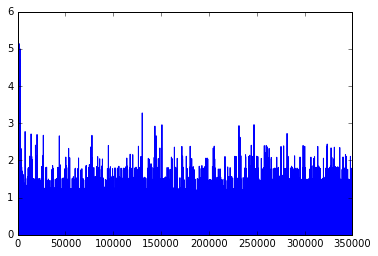

In [53]:
import matplotlib.pyplot as plt

plt.plot(value_loss_cum)
#plt.plot([1,2,3,4])
plt.show()

In [12]:
print_pi_table()

 state (0)  A[0]:(7.11019567876e-13) A[1]:(1.0) A[2]:(2.80345261472e-18) A[3]:(6.42097865763e-13)
 state (1)  A[0]:(7.02210696275e-13) A[1]:(1.0) A[2]:(2.77235620716e-18) A[3]:(6.33949381705e-13)
 state (2)  A[0]:(4.84666126677e-13) A[1]:(1.0) A[2]:(1.87235268143e-18) A[3]:(4.35673361537e-13)
 state (3)  A[0]:(1.45018240851e-14) A[1]:(1.0) A[2]:(5.01193224478e-20) A[3]:(1.3062182324e-14)
 state (4)  A[0]:(6.27346812927e-17) A[1]:(1.0) A[2]:(2.76044670303e-22) A[3]:(6.42145603481e-17)
 state (5)  A[0]:(4.24651153669e-16) A[1]:(1.0) A[2]:(6.56580306159e-21) A[3]:(4.37863676506e-16)
 state (6)  A[0]:(1.1792987209e-07) A[1]:(0.997145831585) A[2]:(0.00285392673686) A[3]:(1.12159206367e-07)
 state (7)  A[0]:(6.88912468738e-13) A[1]:(3.1177907478e-12) A[2]:(1.0) A[3]:(6.67472370777e-13)
 state (8)  A[0]:(9.80245138532e-12) A[1]:(5.16503853576e-11) A[2]:(1.0) A[3]:(9.88536422858e-12)
 state (9)  A[0]:(4.75406302866e-12) A[1]:(1.0) A[2]:(4.81434510313e-11) A[3]:(4.73379451957e-12)
 state (10)  